In [2]:
# import necessary modules
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import os
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
# Memory management
import gc 

In [24]:
# listing files
files = os.listdir("C:/Users/manas/Desktop/Springboard/Capstone ideas/Home credit default risk/Data")
print(files)
# training data
path = 'C:/Users/manas/Desktop/Springboard/Capstone ideas/Home credit default risk/Data/'
train = pd.read_csv(path + files[1])
print('training dataset shape:', train.shape)
# test data
test = pd.read_csv(path + files[0])
print('test dataset shape:', test.shape)

['application_test.csv', 'application_train.csv', 'bureau.csv', 'bureau_balance.csv', 'credit_card_balance.csv', 'HomeCredit_columns_description.csv', 'installments_payments.csv', 'POS_CASH_balance.csv', 'previous_application.csv', 'sample_submission.csv']
training dataset shape: (307511, 122)
test dataset shape: (48744, 121)


There are 8 data files + 1 description file (HomeCredit_columns_description.csv) and 1 submission file (sample_submission.csv). Training dataset (application_train) has 122 variables including the target ofcourse.

## Missing values in the given datasets

In [6]:
## Missing values in appication_train
print('Total number of variables:', train.shape[1])
miss_val = train.isnull().sum() # number of missing value in each col
miss_val = miss_val.sort_values(ascending=False) # sorting from max to min
miss_list = list(miss_val)
ind = miss_list.index(0)
miss_var = miss_val[0:ind] # only variables with missing values
print('Out of', train.shape[1], ', number of variables with missing values:', ind)

percent_miss = miss_var/len(train) * 100 # percent missing value for each variable
percents =[10 , 30, 50]
for percent in percents:
    for i in range(len(percent_miss)):
        if percent_miss.sort_values()[i] > percent:
            print('Out of', ind, ', there are', ind-i, 'variables with more than', percent, '% missing values')
            break

Total number of variables: 122
Out of 122 , number of variables with missing values: 67
Out of 67 , there are 57 variables with more than 10 % missing values
Out of 67 , there are 50 variables with more than 30 % missing values
Out of 67 , there are 41 variables with more than 50 % missing values


In [173]:
# save to csv (miss_val_train.csv): variables with missing values in app_train
percent_miss = percent_miss.sort_values(ascending=False)
miss_var_sort = percent_miss.index
# C:\Users\manas\Desktop\Springboard\Capstone ideas\Home credit default risk
filepath = "C:/Users/manas/Desktop/Springboard/Capstone ideas/Home credit default risk/miss_val_train.csv"
df = pd.DataFrame(percent_miss)
df.to_csv(filepath, header='missing', index=True, index_label='variable')

Discussion
Among 122 variables 67 variables have missing values. 57 variables have more than 10% value missing, 50 variables have more than 30% values missing, and 41 variables have more than 50% values missing. So, a large number of variables missing values. How can we deal with those missing values??

In [483]:
## Missing values in other datasets
var_names = [test, bureau, bureau_bal, credit_bal, inst_pay, cash_bal, prev_app]
names = ['test', 'bureau', 'bureau_bal', 'credit_bal', 'inst_pay', 'cash_bal', 'prev_app']
## Missing values in bureau
for i in range(len(var_names)):
    print('Name of the variable is:', names[i])
    print('Total number of features:', var_names[i].shape[1])
    miss_val = var_names[i].isnull().sum() # number of missing value in each col
    miss_val = miss_val.sort_values(ascending=False) # sorting from max to min
    miss_list = list(miss_val)
    ind = miss_list.index(0)
    miss_var = miss_val[0:ind] # only variables with missing values
    print('Out of', var_names[i].shape[1], ', number of variables with missing values:', ind)

    percent_miss = miss_var/len(var_names[i]) * 100 # percent missing value for each variable
    percents =[10 , 30, 50]
    for percent in percents:
        for i in range(len(percent_miss)):
            if percent_miss.sort_values()[i] > percent:
                print('Out of', ind, ', there are', ind-i, 'variables with more than', percent, '% missing values')
                break
    print(percent_miss.head())
    print('----------------------------------------------------------------------------------------')

Name of the variable is: app_test
Total number of features: 121
Out of 121 , number of variables with missing values: 64
Out of 64 , there are 57 variables with more than 10 % missing values
Out of 64 , there are 50 variables with more than 30 % missing values
Out of 64 , there are 29 variables with more than 50 % missing values
COMMONAREA_MEDI             68.716150
COMMONAREA_AVG              68.716150
COMMONAREA_MODE             68.716150
NONLIVINGAPARTMENTS_MODE    68.412523
NONLIVINGAPARTMENTS_MEDI    68.412523
dtype: float64
----------------------------------------------------------------------------------------
Name of the variable is: bureau
Total number of features: 17
Out of 17 , number of variables with missing values: 7
Out of 7 , there are 5 variables with more than 10 % missing values
Out of 7 , there are 4 variables with more than 30 % missing values
Out of 7 , there are 2 variables with more than 50 % missing values
AMT_ANNUITY               71.473490
AMT_CREDIT_MAX_OVER

Many variables have missing data and in significnat amount. How to deal with them depends on the variable type and its significance.

## Table: application_train 
### Variable type

In [7]:
# train variable type, object type are categorical variables
print('Variable types are:\n', train.dtypes.value_counts()) # variable type: integer, float, categorical
obj = train.select_dtypes('object') # selcting only categorical variable
obj_uni = obj.apply(pd.Series.nunique, axis=0) # unique values in category
print('\nUnique values in categorical variables are:\n', obj_uni.sort_values())
var_float = train.select_dtypes('float64')
print('\nVariables with float outcome:\n', var_float.columns)
var_int = train.select_dtypes('int64')
print('\nVariables with integer outcome:\n', var_int.columns)
var_int_uni = var_int.apply(pd.Series.nunique, axis=0)
print('\nUnique values in integer variables:', var_int_uni.sort_values())

Variable types are:
 float64    65
int64      41
object     16
dtype: int64

Unique values in categorical variables are:
 NAME_CONTRACT_TYPE             2
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
EMERGENCYSTATE_MODE            2
CODE_GENDER                    3
HOUSETYPE_MODE                 3
FONDKAPREMONT_MODE             4
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
NAME_TYPE_SUITE                7
WEEKDAY_APPR_PROCESS_START     7
WALLSMATERIAL_MODE             7
NAME_INCOME_TYPE               8
OCCUPATION_TYPE               18
ORGANIZATION_TYPE             58
dtype: int64

Variables with float outcome:
 Index(['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'OWN_CAR_AGE',
       'CNT_FAM_MEMBERS', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG',
       

There are 3 variable types in application train: 65 float, 41 integer, and 16 object (categorical). Among the categorical variables 15 variables have less than 7 unique values. Categorical variables can be presented using bar plots. Among 41 integer variables 35 have less than or equal to 3 unique values. So it would be best to present them with bar plots. The float type variables and integer type with higher number of unique values can be presented using distribution.

### Check for each variable in application train
1. variable type: float/integer/categorical
2. % missing data
3. Any anomaly?
4. If integer/categorical unique value types
5. distribution/percentage 
6. standard deviation for numerical value/ gini impurities for categorical values

First we will look into the target data, whether a applicant has repaid a loan (marked as '0') or not (as '1'). All other variables would be grouped seperately based on this variable.

In [8]:
target_val = train['TARGET'].value_counts()
print(target_val)
print('% repaid loan: {:05.2f}'.format(target_val[0]/(target_val[0] + target_val[1])*100)) 
print('% difficulty in loan repayment: {:04.2f}'.format(target_val[1]/(target_val[0] + target_val[1])*100))


0    282686
1     24825
Name: TARGET, dtype: int64
% repaid loan: 91.93
% difficulty in loan repayment: 8.07


Discussion: Among 307511 applicants, 282686 (92%) repaid the loan on time. 24825 (8%) had difficulties in repaying. 

In [25]:
import sys
def return_size(df):
    """Return size of dataframe in gigabytes"""
    return round(sys.getsizeof(df) / 1e9, 2)

def convert_types(df, print_info = False):
    
    original_memory = df.memory_usage().sum()
    
    # Iterate through each column
    for c in df:
        
        # Convert ids and booleans to integers
        if ('SK_ID' in c):
            df[c] = df[c].fillna(0).astype(np.int32)
            
        # Convert objects to category
        elif (df[c].dtype == 'object') and (df[c].nunique() < df.shape[0]):
            df[c] = df[c].astype('category')
        
        # Booleans mapped to integers
        elif list(df[c].unique()) == [1, 0]:
            df[c] = df[c].astype(bool)
        
        # Float64 to float32
        elif df[c].dtype == float:
            df[c] = df[c].astype(np.float32)
            
        # Int64 to int32
        elif df[c].dtype == int:
            df[c] = df[c].astype(np.int32)
        
    new_memory = df.memory_usage().sum()
    
    if print_info:
        print(f'Original Memory Usage: {round(original_memory / 1e9, 2)} gb.')
        print(f'New Memory Usage: {round(new_memory / 1e9, 2)} gb.')
        
    return df


In [26]:
train = convert_types(train, print_info=True)

Original Memory Usage: 0.3 gb.
New Memory Usage: 0.17 gb.


This is a great way to reduce the memory used. we have converted object to category, float 64 to float32 and integer 64 to integer32 in train dataset thus reducing the used space from 0.3 gb to 0.17 gb.

## Variable type: float

Float variable name: AMT_INCOME_TOTAL
% missing value 0.0


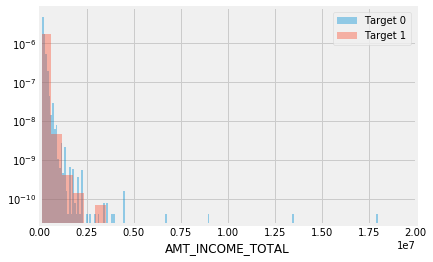

           TARGET_0      TARGET_1
count  2.826860e+05  2.482500e+04
mean   1.690496e+05  1.656020e+05
std    1.104409e+05  7.466609e+05
min    2.565000e+04  2.565000e+04
25%    1.125000e+05  1.125000e+05
50%    1.485000e+05  1.350000e+05
75%    2.025000e+05  2.025000e+05
max    1.800009e+07  1.170000e+08


In [27]:
# AMT_INCOME_TOTAL: income of the client
var_names = var_float.columns
var_n = var_names[0]
print('Float variable name:', var_n)
# % missing value
print('% missing value', train[var_n].isnull().sum()/len(train[var_n]) * 100)

# distribution of variable:
A = train.loc[train['TARGET'] == 0, var_n]
B = train.loc[train['TARGET'] == 1, var_n]
var = (var_float.groupby([train['TARGET']])[var_n].value_counts(normalize=True)
       .rename('percentage').mul(100).reset_index().sort_values(var_n))
plt.rcParams['figure.figsize'] = 6,4
sns.distplot(A, bins=200, hist=True, kde=False, norm_hist=True, label='Target 0')
sns.distplot(B, bins=200, hist=True, kde=False, norm_hist=True, label='Target 1')
#plt.xscale('log')
plt.yscale('log')
plt.xlim(0, 20000000)
plt.legend(loc='upper right')
plt.show()
# Statistical summary
# with target '0'
target_0_des = train.loc[train['TARGET'] == 0, var_n].describe().rename('TARGET_0')
# with target '1'
target_1_des = train.loc[train['TARGET'] == 1, var_n].describe().rename('TARGET_1')
print(pd.concat([target_0_des, target_1_des], axis=1))


When seen on log scale we can see the difference in values for Target 0 and 1. kde plot is not used here as the values were much discrete. The kde plot was not realistic. While this seems to be the most important parameter in repaying loan, it does not reflect so. 

Float variable name: AMT_CREDIT
% missing value 0.0


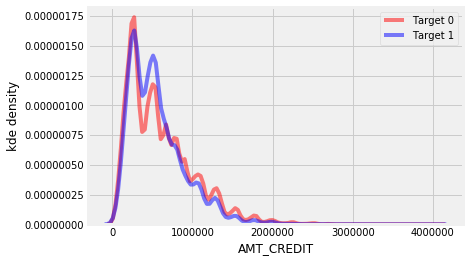

,TARGET_0,TARGET_1
count,282686.000,2.482500e+04
mean,602477.375,5.577772e+05
std,406810.000,3.464308e+05
min,45000.000,4.500000e+04
25%,270000.000,2.844000e+05
50%,517788.000,4.975200e+05
75%,810000.000,7.333155e+05
max,4050000.000,4.027680e+06


In [28]:
# AMT_CREDIT: Credit amount of the loan
var_names = var_float.columns
var = var_names[1]
print('Float variable name:', var)
# % missing value
print('% missing value', train[var].isnull().sum()/len(train[var]))
# distribution of variable:
sns.kdeplot(train.loc[train['TARGET'] == 0, var], label = 'Target 0', color='red', alpha=0.5)
sns.kdeplot(train.loc[train['TARGET'] == 1, var], label = 'Target 1', color='blue', alpha=0.5)
plt.xlabel(var)
plt.ylabel('kde density')
#plt.yscale('log')
plt.grid(True)
plt.rcParams['figure.figsize'] = 4,4
plt.show()

# Statistical summary
# with target '0'
target_0_des = train.loc[train['TARGET'] == 0, var].describe().rename('TARGET_0')
#print('Target 0:', target_0_des)
# with target '1'
target_1_des = train.loc[train['TARGET'] == 1, var].describe().rename('TARGET_1')
#print('Target 1:', target_1_des)
pd.concat([target_0_des, target_1_des], axis=1)

Float variable name: AMT_ANNUITY
% missing value 0.003902299429939092


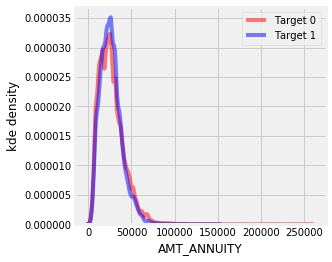

,AMT_ANNUITY_TARGET_0,AMT_ANNUITY_TARGET_1
count,282674.000000,24825.000000
mean,27165.896484,26481.687500
std,14657.540039,12450.640625
min,1615.500000,2722.500000
25%,16456.500000,17361.000000
50%,24876.000000,25263.000000
75%,34749.000000,32976.000000
max,258025.500000,149211.000000


In [29]:
# AMT_ANNUITY: Loan annuity
var_names = var_float.columns
var = var_names[2]
print('Float variable name:', var)
# % missing value
print('% missing value', train[var].isnull().sum()/len(train[var])* 100)
# distribution of variable:
sns.kdeplot(train.loc[train['TARGET'] == 0, var], label = 'Target 0', color='red', alpha=0.5)
sns.kdeplot(train.loc[train['TARGET'] == 1, var], label = 'Target 1', color='blue', alpha=0.5)
plt.xlabel(var)
plt.ylabel('kde density')
#plt.yscale('log')
plt.grid(True)
plt.rcParams['figure.figsize'] = 4,4
plt.show()

# Statistical summary
# with target '0'
target_0_des = train.loc[train['TARGET'] == 0, var].describe().rename('AMT_ANNUITY_TARGET_0')
#print('Target 0:', target_0_des)
# with target '1'
target_1_des = train.loc[train['TARGET'] == 1, var].describe().rename('AMT_ANNUITY_TARGET_1')
#print('Target 1:', target_1_des)
pd.concat([target_0_des, target_1_des], axis=1)

AMT_ANNUITY represents amount of payments made at equal intervals. We will replace the missing values with median of the dataset.

In [30]:
# missing values replace
train[var] = train[var].fillna(train[var].median())
print('% missing value', train[var].isnull().sum()/len(train[var])* 100)
# Statistical summary
# with target '0'
target_0_des = train.loc[train['TARGET'] == 0, var].describe().rename('AMT_ANNUITY_TARGET_0')
#print('Target 0:', target_0_des)
# with target '1'
target_1_des = train.loc[train['TARGET'] == 1, var].describe().rename('AMT_ANNUITY_TARGET_1')
#print('Target 1:', target_1_des)
pd.concat([target_0_des, target_1_des], axis=1)

% missing value 0.0


,AMT_ANNUITY_TARGET_0,AMT_ANNUITY_TARGET_1
count,282686.000000,24825.000000
mean,27165.800781,26481.687500
std,14657.223633,12450.640625
min,1615.500000,2722.500000
25%,16456.500000,17361.000000
50%,24876.000000,25263.000000
75%,34749.000000,32976.000000
max,258025.500000,149211.000000


Float variable name: AMT_GOODS_PRICE
% missing value 0.09040327012692229


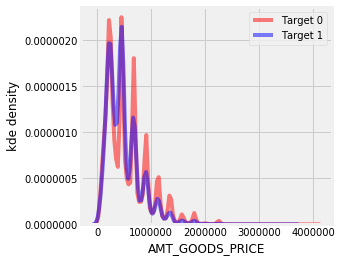

,AMT_GOODS_PRICE_TARGET_0,AMT_GOODS_PRICE_TARGET_1
count,2.824290e+05,2.480400e+04
mean,5.423577e+05,4.889709e+05
std,3.738228e+05,3.116344e+05
min,4.050000e+04,4.500000e+04
25%,2.385000e+05,2.385000e+05
50%,4.500000e+05,4.500000e+05
75%,6.885000e+05,6.750000e+05
max,4.050000e+06,3.600000e+06


In [31]:
# AMT_GOODS_PRICE: For consumer loans it is the price of the goods for which the loan is given
var_names = var_float.columns
var = var_names[3]
print('Float variable name:', var)
# % missing value
print('% missing value', train[var].isnull().sum()/len(train[var])* 100)
# distribution of variable:
sns.kdeplot(train.loc[train['TARGET'] == 0, var], label = 'Target 0', color='red', alpha=0.5)
sns.kdeplot(train.loc[train['TARGET'] == 1, var], label = 'Target 1', color='blue', alpha=0.5)
plt.xlabel(var)
plt.ylabel('kde density')
#plt.yscale('log')
plt.grid(True)
plt.rcParams['figure.figsize'] = 4,4
plt.show()

# Statistical summary
# with target '0'
target_0_des = train.loc[train['TARGET'] == 0, var].describe().rename('AMT_GOODS_PRICE_TARGET_0')
#print('Target 0:', target_0_des)
# with target '1'
target_1_des = train.loc[train['TARGET'] == 1, var].describe().rename('AMT_GOODS_PRICE_TARGET_1')
#print('Target 1:', target_1_des)
pd.concat([target_0_des, target_1_des], axis=1)

For consumer loans it is the price of the goods for which the loan is given. The missing values would be replaced with median.


In [34]:
# replacing missing values 
train[var] = train[var].fillna(train[var].median())
print('% missing value', train[var].isnull().sum()/len(train[var])* 100)

% missing value 0.0


Float variable name: REGION_POPULATION_RELATIVE
% missing value 0.0


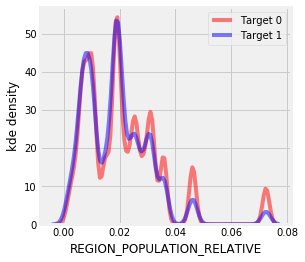

,REGION_POPULATION_RELATIVE_TARGET_0,REGION_POPULATION_RELATIVE_TARGET_1
count,282686.000000,24825.000000
mean,0.021019,0.019132
std,0.013977,0.011904
min,0.000290,0.000533
25%,0.010006,0.009630
50%,0.018850,0.018634
75%,0.028663,0.025164
max,0.072508,0.072508


In [36]:
# REGION_POPULATION_RELATIVE: 
var_names = var_float.columns
var = var_names[4]
print('Float variable name:', var)
# % missing value
print('% missing value', train[var].isnull().sum()/len(train[var])* 100)
# distribution of variable:
sns.kdeplot(train.loc[train['TARGET'] == 0, var], label = 'Target 0', color='red', alpha=0.5)
sns.kdeplot(train.loc[train['TARGET'] == 1, var], label = 'Target 1', color='blue', alpha=0.5)
plt.xlabel(var)
plt.ylabel('kde density')
#plt.yscale('log')
plt.grid(True)
plt.rcParams['figure.figsize'] = 4,4
plt.show()

# Statistical summary
# with target '0'
target_0_des = train.loc[train['TARGET'] == 0, var].describe().rename('REGION_POPULATION_RELATIVE_TARGET_0')
#print('Target 0:', target_0_des)
# with target '1'
target_1_des = train.loc[train['TARGET'] == 1, var].describe().rename('REGION_POPULATION_RELATIVE_TARGET_1')
#print('Target 1:', target_1_des)
pd.concat([target_0_des, target_1_des], axis=1)

Float variable name: DAYS_REGISTRATION
% missing value 0.0


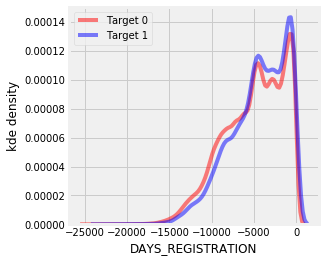

,DAYS_REGISTRATION_TARGET_0,DAYS_REGISTRATION_TARGET_1
count,282686.000000,24825.000000
mean,-5029.880371,-4487.119141
std,3538.336426,3299.649902
min,-24672.000000,-22928.000000
25%,-7550.000000,-6646.000000
50%,-4544.000000,-4056.000000
75%,-2045.000000,-1671.000000
max,0.000000,0.000000


In [43]:
#DAYS_REGISTRATION: 
var_names = var_float.columns
var = var_names[5]
print('Float variable name:', var)
# % missing value
print('% missing value', train[var].isnull().sum()/len(train[var])* 100)
# distribution of variable:
sns.kdeplot(train.loc[train['TARGET'] == 0, var], label = 'Target 0', color='red', alpha=0.5)
sns.kdeplot(train.loc[train['TARGET'] == 1, var], label = 'Target 1', color='blue', alpha=0.5)
plt.xlabel(var)
plt.ylabel('kde density')
#plt.yscale('log')
plt.grid(True)
plt.rcParams['figure.figsize'] = 4,4
plt.show()

# Statistical summary
# with target '0'
target_0_des = train.loc[train['TARGET'] == 0, var].describe().rename('DAYS_REGISTRATION_TARGET_0')
#print('Target 0:', target_0_des)
# with target '1'
target_1_des = train.loc[train['TARGET'] == 1, var].describe().rename('DAYS_REGISTRATION_TARGET_1')
#print('Target 1:', target_1_des)
pd.concat([target_0_des, target_1_des], axis=1)

Float variable name: OWN_CAR_AGE
% missing value 65.9908100848425


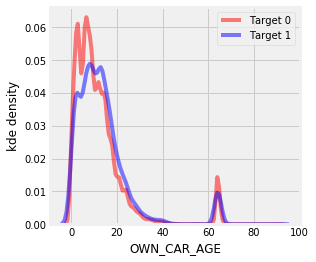

,OWN_CAR_AGE_TARGET_0,OWN_CAR_AGE_TARGET_1
count,97006.000000,7576.000000
mean,11.935540,13.668691
std,11.891275,12.499125
min,0.000000,0.000000
25%,5.000000,6.000000
50%,9.000000,11.000000
75%,15.000000,17.000000
max,91.000000,91.000000


In [44]:
# OWN_CAR_AGE: Age of client's car
var_names = var_float.columns
var = var_names[6]
print('Float variable name:', var)
# % missing value
print('% missing value', train[var].isnull().sum()/len(train[var])* 100)
# distribution of variable:
sns.kdeplot(train.loc[train['TARGET'] == 0, var], label = 'Target 0', color='red', alpha=0.5)
sns.kdeplot(train.loc[train['TARGET'] == 1, var], label = 'Target 1', color='blue', alpha=0.5)
plt.xlabel(var)
plt.ylabel('kde density')
#plt.yscale('log')
plt.grid(True)
plt.rcParams['figure.figsize'] = 4,4
plt.show()

# Statistical summary
# with target '0'
target_0_des = train.loc[train['TARGET'] == 0, var].describe().rename('OWN_CAR_AGE_TARGET_0')
#print('Target 0:', target_0_des)
# with target '1'
target_1_des = train.loc[train['TARGET'] == 1, var].describe().rename('OWN_CAR_AGE_TARGET_1')
#print('Target 1:', target_1_des)
pd.concat([target_0_des, target_1_des], axis=1)

This variable has 66% missing data. However the distribution looks similar for target 1 and 0. It probably does not affect the outcome but we will keep it. I won't make assumption about the car's age, as the nan values probably means that the applicant doesn't have a car. So I will replace the nan value with 0.

In [45]:
train[var] = train[var].fillna(0)
print('% missing value', train[var].isnull().sum()/len(train[var])* 100)

% missing value 0.0


Float variable name: CNT_FAM_MEMBERS
% missing value 0.0006503832383231819


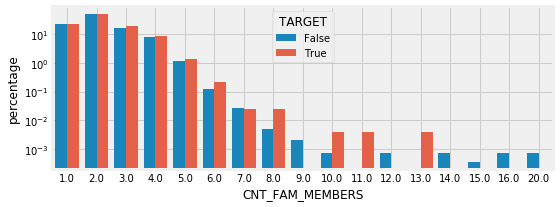


Group summary
     TARGET  CNT_FAM_MEMBERS  percentage
1    False              1.0   21.993463
16    True              1.0   22.860020
0    False              2.0   51.770882
15    True              2.0   48.374622
2    False              3.0   16.977615
17    True              3.0   18.561934
3    False              4.0    7.980996
18    True              4.0    8.604230
4    False              5.0    1.114672
19    True              5.0    1.317221
20    True              6.0    0.221551
5    False              6.0    0.124874
21    True              7.0    0.024169
6    False              7.0    0.026531
22    True              8.0    0.024169
7    False              8.0    0.004953
8    False              9.0    0.002123
23    True             10.0    0.004028
9    False             10.0    0.000708
24    True             11.0    0.004028
10   False             12.0    0.000708
25    True             13.0    0.004028
11   False             14.0    0.000708
14   False             1

In [46]:
# count of family members
var_names = var_float.columns
var = var_names[7]
print('Float variable name:', var)
# % missing value
print('% missing value', train[var].isnull().sum()/len(train[var])* 100)
# distribution of variable:
var_n = (var_float.groupby([train['TARGET']])[var_names[7]].value_counts(normalize=True).rename('percentage').mul(100).reset_index().sort_values(var_names[7]))
plt.rcParams['figure.figsize'] = 8,3
sns.barplot(x='CNT_FAM_MEMBERS', y='percentage', hue='TARGET', data=var_n)
plt.grid(True)
plt.yscale('log')
plt.show()

# Statistical summary
# with target '0'
target_0_des = train.loc[train['TARGET'] == 0, var].describe().rename('CNT_FAM_MEMBERS_TARGET_0')
#print('Target 0:', target_0_des)
# with target '1'
target_1_des = train.loc[train['TARGET'] == 1, var].describe().rename('CNT_FAM_MEMBERS_TARGET_1')
#print('Target 1:', target_1_des)
pd.concat([target_0_des, target_1_des], axis=1)
print('\nGroup summary\n', var_n)

In [47]:
# missing values
train[var] = train[var].fillna(train[var].median())
print('% missing value', train[var].isnull().sum()/len(train[var])* 100)

% missing value 0.0


Float variable name: EXT_SOURCE_1
% missing value 56.381072546998325


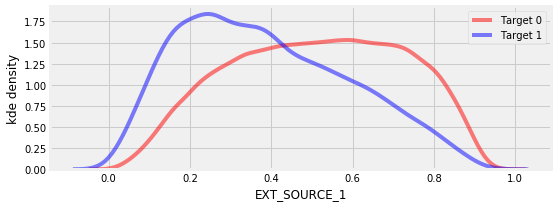

,EXT_SOURCE_1_TARGET_0,EXT_SOURCE_1_TARGET_1
count,124079.000000,10054.000000
mean,0.511467,0.386968
std,0.208804,0.204728
min,0.014568,0.014691
25%,0.345430,0.221847
50%,0.517452,0.361675
75%,0.682839,0.537508
max,0.962693,0.929394


In [48]:
# EXT_SOURCE_1% Normalized score from external data source
var_names = var_float.columns
var = var_names[8]
print('Float variable name:', var)
# % missing value
print('% missing value', train[var].isnull().sum()/len(train[var])* 100)
# distribution of variable:
sns.kdeplot(train.loc[train['TARGET'] == 0, var], label = 'Target 0', color='red', alpha=0.5)
sns.kdeplot(train.loc[train['TARGET'] == 1, var], label = 'Target 1', color='blue', alpha=0.5)
plt.xlabel(var)
plt.ylabel('kde density')
#plt.yscale('log')
plt.grid(True)
plt.rcParams['figure.figsize'] = 4,4
plt.show()

# Statistical summary
# with target '0'
target_0_des = train.loc[train['TARGET'] == 0, var].describe().rename('EXT_SOURCE_1_TARGET_0')
#print('Target 0:', target_0_des)
# with target '1'
target_1_des = train.loc[train['TARGET'] == 1, var].describe().rename('EXT_SOURCE_1_TARGET_1')
#print('Target 1:', target_1_des)
pd.concat([target_0_des, target_1_des], axis=1)

This variable has 56% missing value and as can be seen is important to differentiate between Target 1 and target 0. May be data with nan are simply having no exetrnal source data. So we replace them with 0.

In [49]:
# missing values
train[var] = train[var].fillna(0)
print('% missing value', train[var].isnull().sum()/len(train[var])* 100)

% missing value 0.0


Float variable name: EXT_SOURCE_2
% missing value 0.21462646864665005


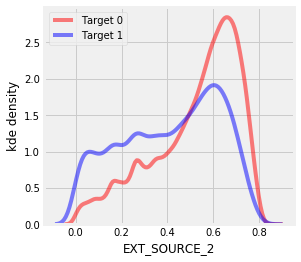

,EXT_SOURCE_2_TARGET_0,EXT_SOURCE_2_TARGET_1
count,2.820780e+05,24773.000000
mean,5.234863e-01,0.410934
std,1.862722e-01,0.213108
min,8.173617e-08,0.000005
25%,4.097866e-01,0.238568
50%,5.739047e-01,0.440381
75%,6.677051e-01,0.594190
max,8.549997e-01,0.811870


In [50]:
var_names = var_float.columns
var = var_names[9]
print('Float variable name:', var)
# % missing value
print('% missing value', train[var].isnull().sum()/len(train[var])* 100)
# distribution of variable:
sns.kdeplot(train.loc[train['TARGET'] == 0, var], label = 'Target 0', color='red', alpha=0.5)
sns.kdeplot(train.loc[train['TARGET'] == 1, var], label = 'Target 1', color='blue', alpha=0.5)
plt.xlabel(var)
plt.ylabel('kde density')
#plt.yscale('log')
plt.grid(True)
plt.rcParams['figure.figsize'] = 4,4
plt.show()

# Statistical summary
# with target '0'
target_0_des = train.loc[train['TARGET'] == 0, var].describe().rename('EXT_SOURCE_2_TARGET_0')
#print('Target 0:', target_0_des)
# with target '1'
target_1_des = train.loc[train['TARGET'] == 1, var].describe().rename('EXT_SOURCE_2_TARGET_1')
#print('Target 1:', target_1_des)
pd.concat([target_0_des, target_1_des], axis=1)

Similar to previous one we will replace nan with 0.

In [51]:
train[var] = train[var].fillna(0)
print('% missing value', train[var].isnull().sum()/len(train[var])* 100)

% missing value 0.0


Float variable name: EXT_SOURCE_3
% missing value 19.825307062186393


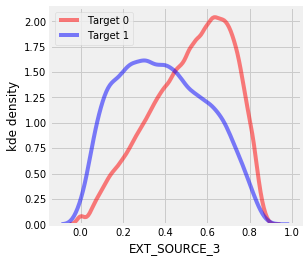

,EXT_SOURCE_3_TARGET_0,EXT_SOURCE_3_TARGET_1
count,227398.000000,19148.000000
mean,0.520971,0.390715
std,0.190456,0.205810
min,0.000527,0.000527
25%,0.385915,0.223831
50%,0.546023,0.379100
75%,0.673830,0.553165
max,0.893976,0.896010


In [52]:
# EXT_SOURCE_3
var_names = var_float.columns
var = var_names[10]
print('Float variable name:', var)
# % missing value
print('% missing value', train[var].isnull().sum()/len(train[var])* 100)
# distribution of variable:
sns.kdeplot(train.loc[train['TARGET'] == 0, var], label = 'Target 0', color='red', alpha=0.5)
sns.kdeplot(train.loc[train['TARGET'] == 1, var], label = 'Target 1', color='blue', alpha=0.5)
plt.xlabel(var)
plt.ylabel('kde density')
#plt.yscale('log')
plt.grid(True)
plt.rcParams['figure.figsize'] = 4,4
plt.show()

# Statistical summary
# with target '0'
target_0_des = train.loc[train['TARGET'] == 0, var].describe().rename('EXT_SOURCE_3_TARGET_0')
#print('Target 0:', target_0_des)
# with target '1'
target_1_des = train.loc[train['TARGET'] == 1, var].describe().rename('EXT_SOURCE_3_TARGET_1')
#print('Target 1:', target_1_des)
pd.concat([target_0_des, target_1_des], axis=1)

This important variable has 20% missing values. Similar to other external source we will replace nan with 0

In [53]:
# missing values
train[var] = train[var].fillna(0)
print('% missing value', train[var].isnull().sum()/len(train[var])* 100)

% missing value 0.0


Float variable name: APARTMENTS_AVG
% missing value 50.74972927797705


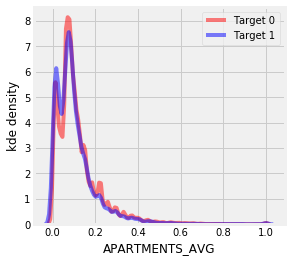

,APARTMENTS_AVG_TARGET_0,APARTMENTS_AVG_TARGET_1
count,140910.000000,10540.000000
mean,0.118303,0.105766
std,0.108715,0.100959
min,0.000000,0.000000
25%,0.058800,0.041200
50%,0.088700,0.082500
75%,0.148500,0.133000
max,1.000000,1.000000


In [54]:
# APARTMENTS_AVG: Normalized information about building where the client lives
var_names = var_float.columns
var = var_names[11]
print('Float variable name:', var)
# % missing value
print('% missing value', train[var].isnull().sum()/len(train[var])* 100)
# distribution of variable:
sns.kdeplot(train.loc[train['TARGET'] == 0, var], label = 'Target 0', color='red', alpha=0.5)
sns.kdeplot(train.loc[train['TARGET'] == 1, var], label = 'Target 1', color='blue', alpha=0.5)
plt.xlabel(var)
plt.ylabel('kde density')
#plt.yscale('log')
plt.grid(True)
plt.rcParams['figure.figsize'] = 4,4
plt.show()

# Statistical summary
# with target '0'
target_0_des = train.loc[train['TARGET'] == 0, var].describe().rename('APARTMENTS_AVG_TARGET_0')
#print('Target 0:', target_0_des)
# with target '1'
target_1_des = train.loc[train['TARGET'] == 1, var].describe().rename('APARTMENTS_AVG_TARGET_1')
#print('Target 1:', target_1_des)
pd.concat([target_0_des, target_1_des], axis=1)

This variable has more than 50% values missing. The distribution looks similar for both targets. The missing values in this will be replaced 0 as nan may imply that the applicant did not have an apartment

In [55]:
# missing values
train[var] = train[var].fillna(0)
print('% missing value', train[var].isnull().sum()/len(train[var])* 100)

% missing value 0.0


Float variable name: BASEMENTAREA_AVG
% missing value 58.51595552679416


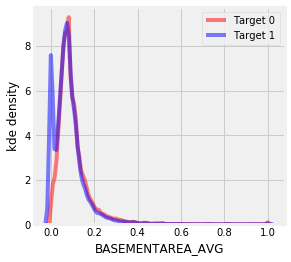

,BASEMENTAREA_AVG_TARGET_0,BASEMENTAREA_AVG_TARGET_1
count,118781.000000,8787.000000
mean,0.088953,0.081548
std,0.082990,0.074288
min,0.000000,0.000000
25%,0.044500,0.039900
50%,0.076500,0.072300
75%,0.112500,0.106100
max,1.000000,1.000000


In [56]:
# BASEMENTAREA_AVG: normalized information
var_names = var_float.columns
var = var_names[12]
print('Float variable name:', var)
# % missing value
print('% missing value', train[var].isnull().sum()/len(train[var])* 100)
# distribution of variable:
sns.kdeplot(train.loc[train['TARGET'] == 0, var], label = 'Target 0', color='red', alpha=0.5)
sns.kdeplot(train.loc[train['TARGET'] == 1, var], label = 'Target 1', color='blue', alpha=0.5)
plt.xlabel(var)
plt.ylabel('kde density')
#plt.yscale('log')
plt.grid(True)
plt.rcParams['figure.figsize'] = 4,4
plt.show()

# Statistical summary
# with target '0'
target_0_des = train.loc[train['TARGET'] == 0, var].describe().rename('BASEMENTAREA_AVG_TARGET_0')
#print('Target 0:', target_0_des)
# with target '1'
target_1_des = train.loc[train['TARGET'] == 1, var].describe().rename('BASEMENTAREA_AVG_TARGET_1')
#print('Target 1:', target_1_des)
pd.concat([target_0_des, target_1_des], axis=1)

More than 58% data are missing which would be replaced by 0 as before. For all building related information we will do the same.

In [57]:
# missing values
train[var] = train[var].fillna(0)
print('% missing value', train[var].isnull().sum()/len(train[var])* 100)

% missing value 0.0


Float variable name: YEARS_BEGINEXPLUATATION_AVG
% missing value 48.781019215572776


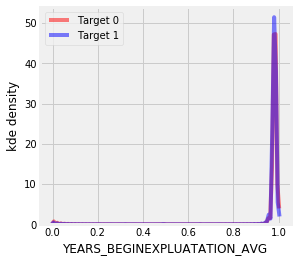

,YEARS_BEGINEXPLUATATION_AVG_TARGET_0,YEARS_BEGINEXPLUATATION_AVG_TARGET_1
count,146487.000000,11017.000000
mean,0.977943,0.975632
std,0.058396,0.069148
min,0.000000,0.000000
25%,0.976700,0.976200
50%,0.982100,0.981100
75%,0.986600,0.986100
max,1.000000,1.000000


In [58]:
# YEARS_BEGINEXPLUATATION_AVG: Normalized information about building where the client lives
var_names = var_float.columns
var = var_names[13]
print('Float variable name:', var)
# % missing value
print('% missing value', train[var].isnull().sum()/len(train[var])* 100)
# distribution of variable:
sns.kdeplot(train.loc[train['TARGET'] == 0, var], label = 'Target 0', color='red', alpha=0.5)
sns.kdeplot(train.loc[train['TARGET'] == 1, var], label = 'Target 1', color='blue', alpha=0.5)
plt.xlabel(var)
plt.ylabel('kde density')
#plt.yscale('log')
plt.grid(True)
plt.rcParams['figure.figsize'] = 4,4
plt.show()

# Statistical summary
# with target '0'
target_0_des = train.loc[train['TARGET'] == 0, var].describe().rename('YEARS_BEGINEXPLUATATION_AVG_TARGET_0')
#print('Target 0:', target_0_des)
# with target '1'
target_1_des = train.loc[train['TARGET'] == 1, var].describe().rename('YEARS_BEGINEXPLUATATION_AVG_TARGET_1')
#print('Target 1:', target_1_des)
pd.concat([target_0_des, target_1_des], axis=1)

In [59]:
# missing values
train[var] = train[var].fillna(0)
print('% missing value', train[var].isnull().sum()/len(train[var])* 100)

% missing value 0.0


Float variable name: YEARS_BUILD_AVG
% missing value 66.49778381911543


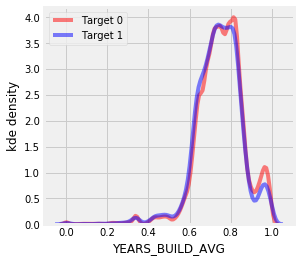

,YEARS_BUILD_AVG_TARGET_0,YEARS_BUILD_AVG_TARGET_1
count,95949.000000,7074.000000
mean,0.753151,0.743231
std,0.113308,0.112389
min,0.000000,0.000000
25%,0.687200,0.680400
50%,0.755200,0.748400
75%,0.823200,0.816400
max,1.000000,1.000000


In [60]:
#YEARS_BUILD_AVG
var_names = var_float.columns
var = var_names[14]
print('Float variable name:', var)
# % missing value
print('% missing value', train[var].isnull().sum()/len(train[var])* 100)
# distribution of variable:
sns.kdeplot(train.loc[train['TARGET'] == 0, var], label = 'Target 0', color='red', alpha=0.5)
sns.kdeplot(train.loc[train['TARGET'] == 1, var], label = 'Target 1', color='blue', alpha=0.5)
plt.xlabel(var)
plt.ylabel('kde density')
#plt.yscale('log')
plt.grid(True)
plt.rcParams['figure.figsize'] = 4,4
plt.show()

# Statistical summary
# with target '0'
target_0_des = train.loc[train['TARGET'] == 0, var].describe().rename('YEARS_BUILD_AVG_TARGET_0')
#print('Target 0:', target_0_des)
# with target '1'
target_1_des = train.loc[train['TARGET'] == 1, var].describe().rename('YEARS_BUILD_AVG_TARGET_1')
#print('Target 1:', target_1_des)
pd.concat([target_0_des, target_1_des], axis=1)

In [61]:
# missing values
train[var] = train[var].fillna(0)
print('% missing value', train[var].isnull().sum()/len(train[var])* 100)

% missing value 0.0


Float variable name: COMMONAREA_AVG
% missing value 69.87229725115525


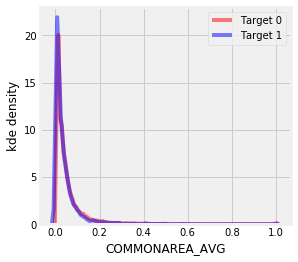

,COMMONAREA_AVG_TARGET_0,COMMONAREA_AVG_TARGET_1
count,86244.000000,6402.000000
mean,0.045005,0.039444
std,0.076665,0.066716
min,0.000000,0.000000
25%,0.007900,0.007300
50%,0.021300,0.018600
75%,0.051800,0.046700
max,1.000000,1.000000


In [62]:
# COMMONAREA_AVG
var_names = var_float.columns
var = var_names[15]
print('Float variable name:', var)
# % missing value
print('% missing value', train[var].isnull().sum()/len(train[var])* 100)
# distribution of variable:
sns.kdeplot(train.loc[train['TARGET'] == 0, var], label = 'Target 0', color='red', alpha=0.5)
sns.kdeplot(train.loc[train['TARGET'] == 1, var], label = 'Target 1', color='blue', alpha=0.5)
plt.xlabel(var)
plt.ylabel('kde density')
#plt.yscale('log')
plt.grid(True)
plt.rcParams['figure.figsize'] = 4,4
plt.show()

# Statistical summary
# with target '0'
target_0_des = train.loc[train['TARGET'] == 0, var].describe().rename('COMMONAREA_AVG_TARGET_0')
#print('Target 0:', target_0_des)
# with target '1'
target_1_des = train.loc[train['TARGET'] == 1, var].describe().rename('COMMONAREA_AVG_TARGET_1')
#print('Target 1:', target_1_des)
pd.concat([target_0_des, target_1_des], axis=1)

In [63]:
# missing values
train[var] = train[var].fillna(0)
print('% missing value', train[var].isnull().sum()/len(train[var])* 100)

% missing value 0.0


Float variable name: ELEVATORS_AVG
% missing value 53.29597965601231


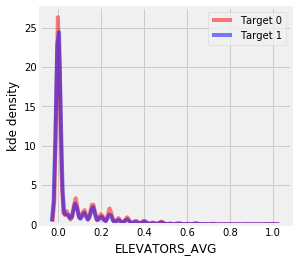

,ELEVATORS_AVG_TARGET_0,ELEVATORS_AVG_TARGET_1
count,133710.000000,9910.000000
mean,0.080218,0.062036
std,0.135558,0.119127
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.120000,0.080000
max,1.000000,1.000000


In [64]:
# ELEVATORS_AVG
var_names = var_float.columns
var = var_names[16]
print('Float variable name:', var)
# % missing value
print('% missing value', train[var].isnull().sum()/len(train[var])* 100)
# distribution of variable:
sns.kdeplot(train.loc[train['TARGET'] == 0, var], label = 'Target 0', color='red', alpha=0.5)
sns.kdeplot(train.loc[train['TARGET'] == 1, var], label = 'Target 1', color='blue', alpha=0.5)
plt.xlabel(var)
plt.ylabel('kde density')
#plt.yscale('log')
plt.grid(True)
plt.rcParams['figure.figsize'] = 4,4
plt.show()

# Statistical summary
# with target '0'
target_0_des = train.loc[train['TARGET'] == 0, var].describe().rename('ELEVATORS_AVG_TARGET_0')
#print('Target 0:', target_0_des)
# with target '1'
target_1_des = train.loc[train['TARGET'] == 1, var].describe().rename('ELEVATORS_AVG_TARGET_1')
#print('Target 1:', target_1_des)
pd.concat([target_0_des, target_1_des], axis=1)

In [65]:
# missing values
#train[var] = train[var].fillna(train[var].median())
train[var] = train[var].fillna(0)
print('% missing value', train[var].isnull().sum()/len(train[var])* 100)

% missing value 0.0


Float variable name: ENTRANCES_AVG
% missing value 50.3487680115508


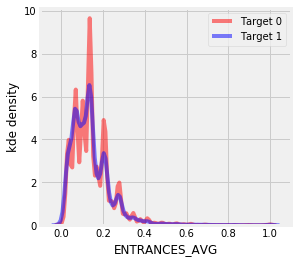

,ENTRANCES_AVG_TARGET_0,ENTRANCES_AVG_TARGET_1
count,142069.000000,10614.000000
mean,0.150300,0.142705
std,0.100154,0.098133
min,0.000000,0.000000
25%,0.069000,0.069000
50%,0.137900,0.137900
75%,0.206900,0.189700
max,1.000000,1.000000


In [66]:
# ENTRANCES_AVG
var_names = var_float.columns
var = var_names[17]
print('Float variable name:', var)
# % missing value
print('% missing value', train[var].isnull().sum()/len(train[var])* 100)
# distribution of variable:
sns.kdeplot(train.loc[train['TARGET'] == 0, var], label = 'Target 0', color='red', alpha=0.5)
sns.kdeplot(train.loc[train['TARGET'] == 1, var], label = 'Target 1', color='blue', alpha=0.5)
plt.xlabel(var)
plt.ylabel('kde density')
#plt.yscale('log')
plt.grid(True)
plt.rcParams['figure.figsize'] = 4,4
plt.show()

# Statistical summary
# with target '0'
target_0_des = train.loc[train['TARGET'] == 0, var].describe().rename('ENTRANCES_AVG_TARGET_0')
#print('Target 0:', target_0_des)
# with target '1'
target_1_des = train.loc[train['TARGET'] == 1, var].describe().rename('ENTRANCES_AVG_TARGET_1')
#print('Target 1:', target_1_des)
pd.concat([target_0_des, target_1_des], axis=1)

In [67]:
# missing values
train[var] = train[var].fillna(0)
print('% missing value', train[var].isnull().sum()/len(train[var])* 100)

% missing value 0.0


Float variable name: FLOORSMAX_AVG
% missing value 49.76082156410665


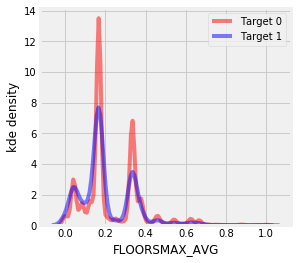

,FLOORSMAX_AVG_TARGET_0,FLOORSMAX_AVG_TARGET_1
count,143730.000000,10761.000000
mean,0.227956,0.203027
std,0.145172,0.134409
min,0.000000,0.000000
25%,0.166700,0.125000
50%,0.166700,0.166700
75%,0.333300,0.333300
max,1.000000,1.000000


In [68]:
# FLOORSMAX_AVG
var_names = var_float.columns
var = var_names[18]
print('Float variable name:', var)
# % missing value
print('% missing value', train[var].isnull().sum()/len(train[var])* 100)
# distribution of variable:
sns.kdeplot(train.loc[train['TARGET'] == 0, var], label = 'Target 0', color='red', alpha=0.5)
sns.kdeplot(train.loc[train['TARGET'] == 1, var], label = 'Target 1', color='blue', alpha=0.5)
plt.xlabel(var)
plt.ylabel('kde density')
#plt.yscale('log')
plt.grid(True)
plt.rcParams['figure.figsize'] = 4,4
plt.show()

# Statistical summary
# with target '0'
target_0_des = train.loc[train['TARGET'] == 0, var].describe().rename('FLOORSMAX_AVG_TARGET_0')
#print('Target 0:', target_0_des)
# with target '1'
target_1_des = train.loc[train['TARGET'] == 1, var].describe().rename('FLOORSMAX_AVG_TARGET_1')
#print('Target 1:', target_1_des)
pd.concat([target_0_des, target_1_des], axis=1)

In [69]:
# missing values
train[var] = train[var].fillna(0)
print('% missing value', train[var].isnull().sum()/len(train[var])* 100)

% missing value 0.0


Float variable name: FLOORSMIN_AVG
% missing value 67.84862980511267


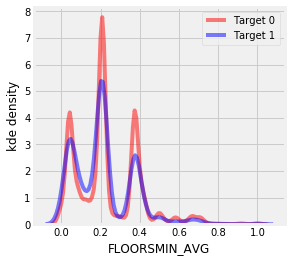

,FLOORSMIN_AVG_TARGET_0,FLOORSMIN_AVG_TARGET_1
count,92052.000000,6817.000000
mean,0.233379,0.211959
std,0.162162,0.148732
min,0.000000,0.000000
25%,0.083300,0.083300
50%,0.208300,0.208300
75%,0.375000,0.319200
max,1.000000,1.000000


In [70]:
# FLOORSMIN_AVG
var_names = var_float.columns
var = var_names[19]
print('Float variable name:', var)
# % missing value
print('% missing value', train[var].isnull().sum()/len(train[var])* 100)
# distribution of variable:
sns.kdeplot(train.loc[train['TARGET'] == 0, var], label = 'Target 0', color='red', alpha=0.5)
sns.kdeplot(train.loc[train['TARGET'] == 1, var], label = 'Target 1', color='blue', alpha=0.5)
plt.xlabel(var)
plt.ylabel('kde density')
#plt.yscale('log')
plt.grid(True)
plt.rcParams['figure.figsize'] = 4,4
plt.show()

# Statistical summary
# with target '0'
target_0_des = train.loc[train['TARGET'] == 0, var].describe().rename('FLOORSMIN_AVG_TARGET_0')
#print('Target 0:', target_0_des)
# with target '1'
target_1_des = train.loc[train['TARGET'] == 1, var].describe().rename('FLOORSMIN_AVG_TARGET_1')
#print('Target 1:', target_1_des)
pd.concat([target_0_des, target_1_des], axis=1)

In [71]:
# missing values
train[var] = train[var].fillna(0)
print('% missing value', train[var].isnull().sum()/len(train[var])* 100)

% missing value 0.0


Float variable name: LANDAREA_AVG
% missing value 59.376737742714894


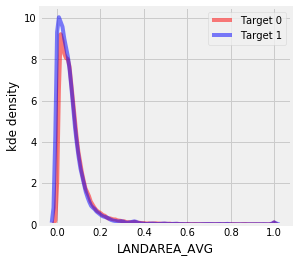

,LANDAREA_AVG_TARGET_0,LANDAREA_AVG_TARGET_1
count,116200.000000,8721.000000
mean,0.066576,0.063108
std,0.081202,0.080904
min,0.000000,0.000000
25%,0.018800,0.017800
50%,0.048400,0.044900
75%,0.085900,0.080800
max,1.000000,1.000000


In [73]:
#LANDAREA_AVG
var_names = var_float.columns
var = var_names[20]
print('Float variable name:', var)
# % missing value
print('% missing value', train[var].isnull().sum()/len(train[var])* 100)
# distribution of variable:
sns.kdeplot(train.loc[train['TARGET'] == 0, var], label = 'Target 0', color='red', alpha=0.5)
sns.kdeplot(train.loc[train['TARGET'] == 1, var], label = 'Target 1', color='blue', alpha=0.5)
plt.xlabel(var)
plt.ylabel('kde density')
#plt.yscale('log')
plt.grid(True)
plt.rcParams['figure.figsize'] = 4,4
plt.show()

# Statistical summary
# with target '0'
target_0_des = train.loc[train['TARGET'] == 0, var].describe().rename('LANDAREA_AVG_TARGET_0')
#print('Target 0:', target_0_des)
# with target '1'
target_1_des = train.loc[train['TARGET'] == 1, var].describe().rename('LANDAREA_AVG_TARGET_1')
#print('Target 1:', target_1_des)
pd.concat([target_0_des, target_1_des], axis=1)

In [74]:
# missing values
train[var] = train[var].fillna(0)
print('% missing value', train[var].isnull().sum()/len(train[var])* 100)

% missing value 0.0


Float variable name: LIVINGAPARTMENTS_AVG
% missing value 68.35495315614726


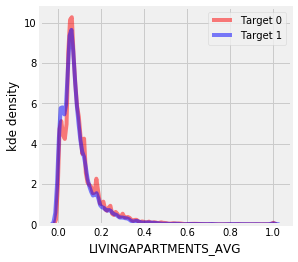

,LIVINGAPARTMENTS_AVG_TARGET_0,LIVINGAPARTMENTS_AVG_TARGET_1
count,90609.000000,6703.000000
mean,0.101405,0.092256
std,0.092908,0.087500
min,0.000000,0.000000
25%,0.050400,0.045400
50%,0.075600,0.067200
75%,0.121000,0.116800
max,1.000000,1.000000


In [75]:
# LIVINGAPARTMENTS_AVG
var_names = var_float.columns
var = var_names[21]
print('Float variable name:', var)
# % missing value
print('% missing value', train[var].isnull().sum()/len(train[var])* 100)
# distribution of variable:
sns.kdeplot(train.loc[train['TARGET'] == 0, var], label = 'Target 0', color='red', alpha=0.5)
sns.kdeplot(train.loc[train['TARGET'] == 1, var], label = 'Target 1', color='blue', alpha=0.5)
plt.xlabel(var)
plt.ylabel('kde density')
#plt.yscale('log')
plt.grid(True)
plt.rcParams['figure.figsize'] = 4,4
plt.show()

# Statistical summary
# with target '0'
target_0_des = train.loc[train['TARGET'] == 0, var].describe().rename('LIVINGAPARTMENTS_AVG_TARGET_0')
#print('Target 0:', target_0_des)
# with target '1'
target_1_des = train.loc[train['TARGET'] == 1, var].describe().rename('LIVINGAPARTMENTS_AVG_TARGET_1')
#print('Target 1:', target_1_des)
pd.concat([target_0_des, target_1_des], axis=1)

In [76]:
# missing values
train[var] = train[var].fillna(0)
print('% missing value', train[var].isnull().sum()/len(train[var])* 100)

% missing value 0.0


Float variable name: LIVINGAREA_AVG
% missing value 50.193326417591564


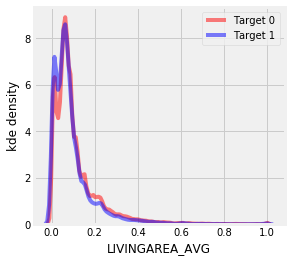

,LIVINGAREA_AVG_TARGET_0,LIVINGAREA_AVG_TARGET_1
count,142447.000000,10714.000000
mean,0.108400,0.094096
std,0.111213,0.100576
min,0.000000,0.000000
25%,0.046100,0.035525
50%,0.075200,0.066700
75%,0.131800,0.113800
max,1.000000,1.000000


In [77]:
# LIVINGAREA_AVG
var_names = var_float.columns
var = var_names[22]
print('Float variable name:', var)
# % missing value
print('% missing value', train[var].isnull().sum()/len(train[var])* 100)
# distribution of variable:
sns.kdeplot(train.loc[train['TARGET'] == 0, var], label = 'Target 0', color='red', alpha=0.5)
sns.kdeplot(train.loc[train['TARGET'] == 1, var], label = 'Target 1', color='blue', alpha=0.5)
plt.xlabel(var)
plt.ylabel('kde density')
#plt.yscale('log')
plt.grid(True)
plt.rcParams['figure.figsize'] = 4,4
plt.show()

# Statistical summary
# with target '0'
target_0_des = train.loc[train['TARGET'] == 0, var].describe().rename('LIVINGAREA_AVG_TARGET_0')
#print('Target 0:', target_0_des)
# with target '1'
target_1_des = train.loc[train['TARGET'] == 1, var].describe().rename('LIVINGAREA_AVG_TARGET_1')
#print('Target 1:', target_1_des)
pd.concat([target_0_des, target_1_des], axis=1)

In [78]:
# missing values
train[var] = train[var].fillna(0)
print('% missing value', train[var].isnull().sum()/len(train[var])* 100)

% missing value 0.0


Float variable name: NONLIVINGAPARTMENTS_AVG
% missing value 69.43296337366793


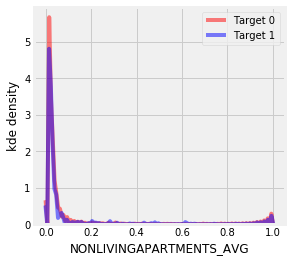

,NONLIVINGAPARTMENTS_AVG_TARGET_0,NONLIVINGAPARTMENTS_AVG_TARGET_1
count,87499.000000,6498.000000
mean,0.008850,0.008252
std,0.047807,0.046620
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.003900,0.003900
max,1.000000,1.000000


In [79]:
# NONLIVINGAPARTMENTS_AVG
var_names = var_float.columns
var = var_names[23]
print('Float variable name:', var)
# % missing value
print('% missing value', train[var].isnull().sum()/len(train[var])* 100)
# distribution of variable:
sns.kdeplot(train.loc[train['TARGET'] == 0, var], label = 'Target 0', color='red', alpha=0.5)
sns.kdeplot(train.loc[train['TARGET'] == 1, var], label = 'Target 1', color='blue', alpha=0.5)
plt.xlabel(var)
plt.ylabel('kde density')
#plt.xscale('log')
plt.grid(True)
plt.rcParams['figure.figsize'] = 4,4
plt.show()

# Statistical summary
# with target '0'
target_0_des = train.loc[train['TARGET'] == 0, var].describe().rename('NONLIVINGAPARTMENTS_AVG_TARGET_0')
#print('Target 0:', target_0_des)
# with target '1'
target_1_des = train.loc[train['TARGET'] == 1, var].describe().rename('NONLIVINGAPARTMENTS_AVG_TARGET_1')
#print('Target 1:', target_1_des)
pd.concat([target_0_des, target_1_des], axis=1)

In [80]:
# missing values
train[var] = train[var].fillna(0)
print('% missing value', train[var].isnull().sum()/len(train[var])* 100)

% missing value 0.0


Float variable name: NONLIVINGAREA_AVG
% missing value 55.17916432257708


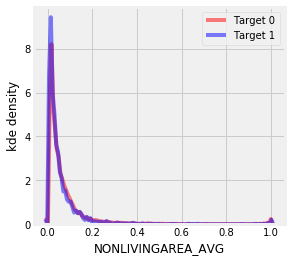

,NONLIVINGAREA_AVG_TARGET_0,NONLIVINGAREA_AVG_TARGET_1
count,128334.000000,9495.000000
mean,0.028615,0.024887
std,0.070011,0.062371
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.003600,0.002800
75%,0.027900,0.024500
max,1.000000,1.000000


In [82]:
# NONLIVINGAREA_AVG
var_names = var_float.columns
var = var_names[24]
print('Float variable name:', var)
# % missing value
print('% missing value', train[var].isnull().sum()/len(train[var])* 100)
# distribution of variable:
sns.kdeplot(train.loc[train['TARGET'] == 0, var], label = 'Target 0', color='red', alpha=0.5)
sns.kdeplot(train.loc[train['TARGET'] == 1, var], label = 'Target 1', color='blue', alpha=0.5)
plt.xlabel(var)
plt.ylabel('kde density')
#plt.yscale('log')
plt.grid(True)
plt.rcParams['figure.figsize'] = 4,4
plt.show()

# Statistical summary
# with target '0'
target_0_des = train.loc[train['TARGET'] == 0, var].describe().rename('NONLIVINGAREA_AVG_TARGET_0')
#print('Target 0:', target_0_des)
# with target '1'
target_1_des = train.loc[train['TARGET'] == 1, var].describe().rename('NONLIVINGAREA_AVG_TARGET_1')
#print('Target 1:', target_1_des)
pd.concat([target_0_des, target_1_des], axis=1)

In [83]:
# missing values
train[var] = train[var].fillna(0)
print('% missing value', train[var].isnull().sum()/len(train[var])* 100)

% missing value 0.0


Float variable name: APARTMENTS_MODE
% missing value 50.74972927797705


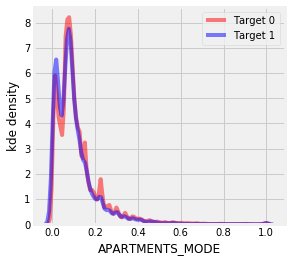

,APARTMENTS_MODE_TARGET_0,APARTMENTS_MODE_TARGET_1
count,140910.000000,10540.000000
mean,0.115050,0.103463
std,0.108371,0.101271
min,0.000000,0.000000
25%,0.053600,0.037800
50%,0.084000,0.080900
75%,0.146000,0.126100
max,1.000000,1.000000


In [84]:
# APARTMENTS_MODE
var_names = var_float.columns
var = var_names[25]
print('Float variable name:', var)
# % missing value
print('% missing value', train[var].isnull().sum()/len(train[var])* 100)
# distribution of variable:
sns.kdeplot(train.loc[train['TARGET'] == 0, var], label = 'Target 0', color='red', alpha=0.5)
sns.kdeplot(train.loc[train['TARGET'] == 1, var], label = 'Target 1', color='blue', alpha=0.5)
plt.xlabel(var)
plt.ylabel('kde density')
#plt.yscale('log')
plt.grid(True)
plt.rcParams['figure.figsize'] = 4,4
plt.show()

# Statistical summary
# with target '0'
target_0_des = train.loc[train['TARGET'] == 0, var].describe().rename('APARTMENTS_MODE_TARGET_0')
#print('Target 0:', target_0_des)
# with target '1'
target_1_des = train.loc[train['TARGET'] == 1, var].describe().rename('APARTMENTS_MODE_TARGET_1')
#print('Target 1:', target_1_des)
pd.concat([target_0_des, target_1_des], axis=1)

In [85]:
# missing values
train[var] = train[var].fillna(0)
print('% missing value', train[var].isnull().sum()/len(train[var])* 100)

% missing value 0.0


Float variable name: BASEMENTAREA_MODE
% missing value 58.51595552679416


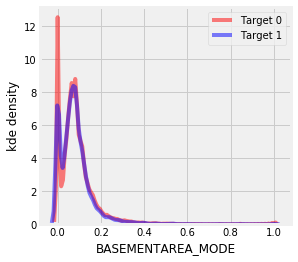

,BASEMENTAREA_MODE_TARGET_0,BASEMENTAREA_MODE_TARGET_1
count,118781.000000,8787.000000
mean,0.088002,0.081359
std,0.084860,0.076210
min,0.000000,0.000000
25%,0.041000,0.036300
50%,0.074800,0.071600
75%,0.112900,0.106800
max,1.000000,1.000000


In [86]:
# BASEMENTAREA_MODE
var_names = var_float.columns
var = var_names[26]
print('Float variable name:', var)
# % missing value
print('% missing value', train[var].isnull().sum()/len(train[var])* 100)
# distribution of variable:
sns.kdeplot(train.loc[train['TARGET'] == 0, var], label = 'Target 0', color='red', alpha=0.5)
sns.kdeplot(train.loc[train['TARGET'] == 1, var], label = 'Target 1', color='blue', alpha=0.5)
plt.xlabel(var)
plt.ylabel('kde density')
#plt.yscale('log')
plt.grid(True)
plt.rcParams['figure.figsize'] = 4,4
plt.show()

# Statistical summary
# with target '0'
target_0_des = train.loc[train['TARGET'] == 0, var].describe().rename('BASEMENTAREA_MODE_TARGET_0')
#print('Target 0:', target_0_des)
# with target '1'
target_1_des = train.loc[train['TARGET'] == 1, var].describe().rename('BASEMENTAREA_MODE_TARGET_1')
#print('Target 1:', target_1_des)
pd.concat([target_0_des, target_1_des], axis=1)

In [87]:
# missing values
train[var] = train[var].fillna(0)
print('% missing value', train[var].isnull().sum()/len(train[var])* 100)

% missing value 0.0


Float variable name: YEARS_BEGINEXPLUATATION_MODE
% missing value 48.781019215572776


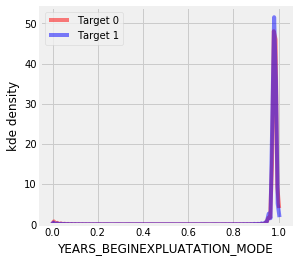

,YEARS_BEGINEXPLUATATION_MODE_TARGET_0,YEARS_BEGINEXPLUATATION_MODE_TARGET_1
count,146487.000000,11017.000000
mean,0.977266,0.974933
std,0.063814,0.073849
min,0.000000,0.000000
25%,0.976700,0.975700
50%,0.981600,0.980600
75%,0.986600,0.986100
max,1.000000,1.000000


In [88]:
# YEARS_BEGINEXPLUATATION_MODE
var_names = var_float.columns
var = var_names[27]
print('Float variable name:', var)
# % missing value
print('% missing value', train[var].isnull().sum()/len(train[var])* 100)
# distribution of variable:
sns.kdeplot(train.loc[train['TARGET'] == 0, var], label = 'Target 0', color='red', alpha=0.5)
sns.kdeplot(train.loc[train['TARGET'] == 1, var], label = 'Target 1', color='blue', alpha=0.5)
plt.xlabel(var)
plt.ylabel('kde density')
#plt.yscale('log')
plt.grid(True)
plt.rcParams['figure.figsize'] = 4,4
plt.show()

# Statistical summary
# with target '0'
target_0_des = train.loc[train['TARGET'] == 0, var].describe().rename('YEARS_BEGINEXPLUATATION_MODE_TARGET_0')
#print('Target 0:', target_0_des)
# with target '1'
target_1_des = train.loc[train['TARGET'] == 1, var].describe().rename('YEARS_BEGINEXPLUATATION_MODE_TARGET_1')
#print('Target 1:', target_1_des)
pd.concat([target_0_des, target_1_des], axis=1)

In [89]:
# missing values
train[var] = train[var].fillna(0)
print('% missing value', train[var].isnull().sum()/len(train[var])* 100)

% missing value 0.0


Float variable name: YEARS_BUILD_MODE
% missing value 66.49778381911543


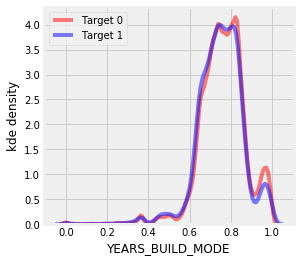

,YEARS_BUILD_MODE_TARGET_0,YEARS_BUILD_MODE_TARGET_1
count,95949.000000,7074.000000
mean,0.760262,0.750686
std,0.110146,0.109280
min,0.000000,0.000000
25%,0.699400,0.686400
50%,0.764800,0.755000
75%,0.830100,0.817100
max,1.000000,1.000000


In [90]:
# YEARS_BUILD_MODE
var_names = var_float.columns
var = var_names[28]
print('Float variable name:', var)
# % missing value
print('% missing value', train[var].isnull().sum()/len(train[var])* 100)
# distribution of variable:
sns.kdeplot(train.loc[train['TARGET'] == 0, var], label = 'Target 0', color='red', alpha=0.5)
sns.kdeplot(train.loc[train['TARGET'] == 1, var], label = 'Target 1', color='blue', alpha=0.5)
plt.xlabel(var)
plt.ylabel('kde density')
#plt.yscale('log')
plt.grid(True)
plt.rcParams['figure.figsize'] = 4,4
plt.show()

# Statistical summary
# with target '0'
target_0_des = train.loc[train['TARGET'] == 0, var].describe().rename('YEARS_BUILD_MODE_TARGET_0')
#print('Target 0:', target_0_des)
# with target '1'
target_1_des = train.loc[train['TARGET'] == 1, var].describe().rename('YEARS_BUILD_MODE_TARGET_1')
#print('Target 1:', target_1_des)
pd.concat([target_0_des, target_1_des], axis=1)

In [91]:
# missing values
train[var] = train[var].fillna(0)
print('% missing value', train[var].isnull().sum()/len(train[var])* 100)

% missing value 0.0


Float variable name: COMMONAREA_MODE
% missing value 69.87229725115525


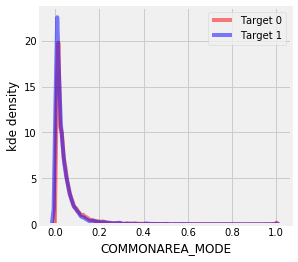

,COMMONAREA_MODE_TARGET_0,COMMONAREA_MODE_TARGET_1
count,86244.000000,6402.000000
mean,0.042885,0.038088
std,0.075004,0.066271
min,0.000000,0.000000
25%,0.007300,0.006700
50%,0.019200,0.017100
75%,0.049300,0.044975
max,1.000000,1.000000


In [92]:
# COMMONAREA_MODE
var_names = var_float.columns
var = var_names[29]
print('Float variable name:', var)
# % missing value
print('% missing value', train[var].isnull().sum()/len(train[var])* 100)
# distribution of variable:
sns.kdeplot(train.loc[train['TARGET'] == 0, var], label = 'Target 0', color='red', alpha=0.5)
sns.kdeplot(train.loc[train['TARGET'] == 1, var], label = 'Target 1', color='blue', alpha=0.5)
plt.xlabel(var)
plt.ylabel('kde density')
#plt.yscale('log')
plt.grid(True)
plt.rcParams['figure.figsize'] = 4,4
plt.show()

# Statistical summary
# with target '0'
target_0_des = train.loc[train['TARGET'] == 0, var].describe().rename('COMMONAREA_MODE_TARGET_0')
#print('Target 0:', target_0_des)
# with target '1'
target_1_des = train.loc[train['TARGET'] == 1, var].describe().rename('COMMONAREA_MODE_TARGET_1')
#print('Target 1:', target_1_des)
pd.concat([target_0_des, target_1_des], axis=1)

In [93]:
# missing values
train[var] = train[var].fillna(0)
print('% missing value', train[var].isnull().sum()/len(train[var])* 100)

% missing value 0.0


Float variable name: ELEVATORS_MODE
% missing value 53.29597965601231


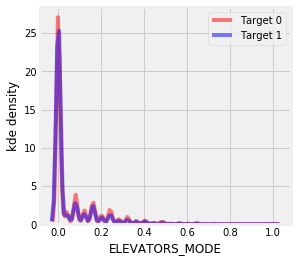

,COMMONAREA_MODE_TARGET_0,COMMONAREA_MODE_TARGET_1
count,133710.000000,9910.000000
mean,0.075656,0.058880
std,0.133194,0.117659
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.120800,0.080600
max,1.000000,1.000000


In [94]:
var_names = var_float.columns
var = var_names[30]
print('Float variable name:', var)
# % missing value
print('% missing value', train[var].isnull().sum()/len(train[var])* 100)
# distribution of variable:
sns.kdeplot(train.loc[train['TARGET'] == 0, var], label = 'Target 0', color='red', alpha=0.5)
sns.kdeplot(train.loc[train['TARGET'] == 1, var], label = 'Target 1', color='blue', alpha=0.5)
plt.xlabel(var)
plt.ylabel('kde density')
#plt.yscale('log')
plt.grid(True)
plt.rcParams['figure.figsize'] = 4,4
plt.show()

# Statistical summary
# with target '0'
target_0_des = train.loc[train['TARGET'] == 0, var].describe().rename('COMMONAREA_MODE_TARGET_0')
#print('Target 0:', target_0_des)
# with target '1'
target_1_des = train.loc[train['TARGET'] == 1, var].describe().rename('COMMONAREA_MODE_TARGET_1')
#print('Target 1:', target_1_des)
pd.concat([target_0_des, target_1_des], axis=1)

In [95]:
# missing values
train[var] = train[var].fillna(0)
print('% missing value', train[var].isnull().sum()/len(train[var])* 100)

% missing value 0.0


Float variable name: ENTRANCES_MODE
% missing value 50.3487680115508


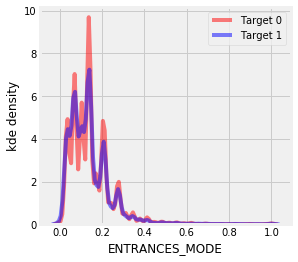

,ENTRANCES_MODE_TARGET_0,ENTRANCES_MODE_TARGET_1
count,142069.000000,10614.000000
mean,0.145724,0.138767
std,0.101125,0.099008
min,0.000000,0.000000
25%,0.069000,0.069000
50%,0.137900,0.137900
75%,0.206900,0.172400
max,1.000000,1.000000


In [96]:
var_names = var_float.columns
var = var_names[31]
print('Float variable name:', var)
# % missing value
print('% missing value', train[var].isnull().sum()/len(train[var])* 100)
# distribution of variable:
sns.kdeplot(train.loc[train['TARGET'] == 0, var], label = 'Target 0', color='red', alpha=0.5)
sns.kdeplot(train.loc[train['TARGET'] == 1, var], label = 'Target 1', color='blue', alpha=0.5)
plt.xlabel(var)
plt.ylabel('kde density')
#plt.yscale('log')
plt.grid(True)
plt.rcParams['figure.figsize'] = 4,4
plt.show()

# Statistical summary
# with target '0'
target_0_des = train.loc[train['TARGET'] == 0, var].describe().rename('ENTRANCES_MODE_TARGET_0')
#print('Target 0:', target_0_des)
# with target '1'
target_1_des = train.loc[train['TARGET'] == 1, var].describe().rename('ENTRANCES_MODE_TARGET_1')
#print('Target 1:', target_1_des)
pd.concat([target_0_des, target_1_des], axis=1)

In [97]:
# missing values
train[var] = train[var].fillna(0)
print('% missing value', train[var].isnull().sum()/len(train[var])* 100)

% missing value 0.0


Float variable name: FLOORSMAX_MODE
% missing value 49.76082156410665


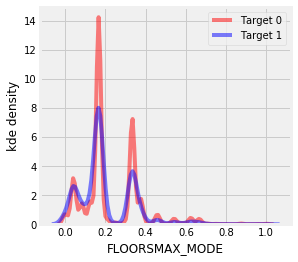

,FLOORSMAX_MODE_TARGET_0,FLOORSMAX_MODE_TARGET_1
count,143730.000000,10761.000000
mean,0.223946,0.199618
std,0.144256,0.133546
min,0.000000,0.000000
25%,0.166700,0.125000
50%,0.166700,0.166700
75%,0.333300,0.333300
max,1.000000,1.000000


In [98]:
var_names = var_float.columns
var = var_names[32]
print('Float variable name:', var)
# % missing value
print('% missing value', train[var].isnull().sum()/len(train[var])* 100)
# distribution of variable:
sns.kdeplot(train.loc[train['TARGET'] == 0, var], label = 'Target 0', color='red', alpha=0.5)
sns.kdeplot(train.loc[train['TARGET'] == 1, var], label = 'Target 1', color='blue', alpha=0.5)
plt.xlabel(var)
plt.ylabel('kde density')
#plt.yscale('log')
plt.grid(True)
plt.rcParams['figure.figsize'] = 4,4
plt.show()

# Statistical summary
# with target '0'
target_0_des = train.loc[train['TARGET'] == 0, var].describe().rename('FLOORSMAX_MODE_TARGET_0')
#print('Target 0:', target_0_des)
# with target '1'
target_1_des = train.loc[train['TARGET'] == 1, var].describe().rename('FLOORSMAX_MODE_TARGET_1')
#print('Target 1:', target_1_des)
pd.concat([target_0_des, target_1_des], axis=1)

In [99]:
# missing values
train[var] = train[var].fillna(0)
print('% missing value', train[var].isnull().sum()/len(train[var])* 100)

% missing value 0.0


Float variable name: FLOORSMIN_MODE
% missing value 67.84862980511267


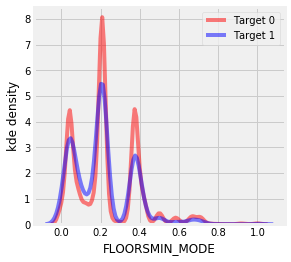

,FLOORSMIN_MODE_TARGET_0,FLOORSMIN_MODE_TARGET_1
count,92052.000000,6817.000000
mean,0.229502,0.208694
std,0.161974,0.148480
min,0.000000,0.000000
25%,0.083300,0.083300
50%,0.208300,0.208300
75%,0.375000,0.291700
max,1.000000,1.000000


In [100]:
var_names = var_float.columns
var = var_names[33]
print('Float variable name:', var)
# % missing value
print('% missing value', train[var].isnull().sum()/len(train[var])* 100)
# distribution of variable:
sns.kdeplot(train.loc[train['TARGET'] == 0, var], label = 'Target 0', color='red', alpha=0.5)
sns.kdeplot(train.loc[train['TARGET'] == 1, var], label = 'Target 1', color='blue', alpha=0.5)
plt.xlabel(var)
plt.ylabel('kde density')
#plt.yscale('log')
plt.grid(True)
plt.rcParams['figure.figsize'] = 4,4
plt.show()

# Statistical summary
# with target '0'
target_0_des = train.loc[train['TARGET'] == 0, var].describe().rename('FLOORSMIN_MODE_TARGET_0')
#print('Target 0:', target_0_des)
# with target '1'
target_1_des = train.loc[train['TARGET'] == 1, var].describe().rename('FLOORSMIN_MODE_TARGET_1')
#print('Target 1:', target_1_des)
pd.concat([target_0_des, target_1_des], axis=1)

In [101]:
# missing values
train[var] = train[var].fillna(0)
print('% missing value', train[var].isnull().sum()/len(train[var])* 100)

% missing value 0.0


Float variable name: LANDAREA_MODE
% missing value 59.376737742714894


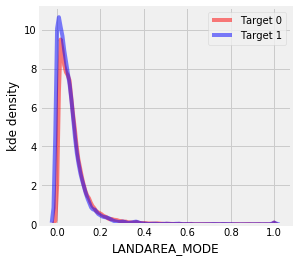

,LANDAREA_MODE_TARGET_0,LANDAREA_MODE_TARGET_1
count,116200.000000,8721.000000
mean,0.065186,0.061922
std,0.081803,0.081022
min,0.000000,0.000000
25%,0.016600,0.016000
50%,0.046100,0.042800
75%,0.084400,0.079300
max,1.000000,1.000000


In [102]:
var_names = var_float.columns
var = var_names[34]
print('Float variable name:', var)
# % missing value
print('% missing value', train[var].isnull().sum()/len(train[var])* 100)
# distribution of variable:
sns.kdeplot(train.loc[train['TARGET'] == 0, var], label = 'Target 0', color='red', alpha=0.5)
sns.kdeplot(train.loc[train['TARGET'] == 1, var], label = 'Target 1', color='blue', alpha=0.5)
plt.xlabel(var)
plt.ylabel('kde density')
#plt.yscale('log')
plt.grid(True)
plt.rcParams['figure.figsize'] = 4,4
plt.show()

# Statistical summary
# with target '0'
target_0_des = train.loc[train['TARGET'] == 0, var].describe().rename('LANDAREA_MODE_TARGET_0')
#print('Target 0:', target_0_des)
# with target '1'
target_1_des = train.loc[train['TARGET'] == 1, var].describe().rename('LANDAREA_MODE_TARGET_1')
#print('Target 1:', target_1_des)
pd.concat([target_0_des, target_1_des], axis=1)

In [103]:
# missing values
train[var] = train[var].fillna(0)
print('% missing value', train[var].isnull().sum()/len(train[var])* 100)

% missing value 0.0


Float variable name: LIVINGAPARTMENTS_MODE
% missing value 68.35495315614726


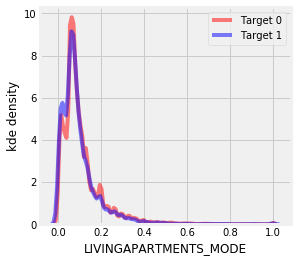

,LIVINGAPARTMENTS_MODE_TARGET_0,LIVINGAPARTMENTS_MODE_TARGET_1
count,90609.000000,6703.000000
mean,0.106272,0.097226
std,0.098183,0.093276
min,0.000000,0.000000
25%,0.054200,0.044100
50%,0.077100,0.073500
75%,0.131300,0.118500
max,1.000000,1.000000


In [104]:
var_names = var_float.columns
var = var_names[35]
print('Float variable name:', var)
# % missing value
print('% missing value', train[var].isnull().sum()/len(train[var])* 100)
# distribution of variable:
sns.kdeplot(train.loc[train['TARGET'] == 0, var], label = 'Target 0', color='red', alpha=0.5)
sns.kdeplot(train.loc[train['TARGET'] == 1, var], label = 'Target 1', color='blue', alpha=0.5)
plt.xlabel(var)
plt.ylabel('kde density')
#plt.yscale('log')
plt.grid(True)
plt.rcParams['figure.figsize'] = 4,4
plt.show()

# Statistical summary
# with target '0'
target_0_des = train.loc[train['TARGET'] == 0, var].describe().rename('LIVINGAPARTMENTS_MODE_TARGET_0')
#print('Target 0:', target_0_des)
# with target '1'
target_1_des = train.loc[train['TARGET'] == 1, var].describe().rename('LIVINGAPARTMENTS_MODE_TARGET_1')
#print('Target 1:', target_1_des)
pd.concat([target_0_des, target_1_des], axis=1)

In [105]:
# missing values
train[var] = train[var].fillna(0)
print('% missing value', train[var].isnull().sum()/len(train[var])* 100)

% missing value 0.0


Float variable name: LIVINGAREA_MODE
% missing value 50.193326417591564


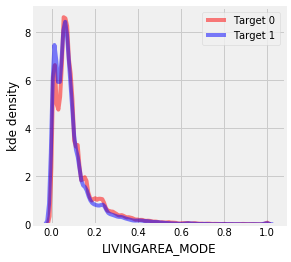

,LIVINGAREA_MODE_TARGET_0,LIVINGAREA_MODE_TARGET_1
count,142447.000000,10714.000000
mean,0.106916,0.093461
std,0.112474,0.102287
min,0.000000,0.000000
25%,0.043400,0.032900
50%,0.073400,0.066750
75%,0.126100,0.112200
max,1.000000,1.000000


In [106]:
var_names = var_float.columns
var = var_names[36]
print('Float variable name:', var)
# % missing value
print('% missing value', train[var].isnull().sum()/len(train[var])* 100)
# distribution of variable:
sns.kdeplot(train.loc[train['TARGET'] == 0, var], label = 'Target 0', color='red', alpha=0.5)
sns.kdeplot(train.loc[train['TARGET'] == 1, var], label = 'Target 1', color='blue', alpha=0.5)
plt.xlabel(var)
plt.ylabel('kde density')
#plt.yscale('log')
plt.grid(True)
plt.rcParams['figure.figsize'] = 4,4
plt.show()

# Statistical summary
# with target '0'
target_0_des = train.loc[train['TARGET'] == 0, var].describe().rename('LIVINGAREA_MODE_TARGET_0')
#print('Target 0:', target_0_des)
# with target '1'
target_1_des = train.loc[train['TARGET'] == 1, var].describe().rename('LIVINGAREA_MODE_TARGET_1')
#print('Target 1:', target_1_des)
pd.concat([target_0_des, target_1_des], axis=1)

In [107]:
# missing values
train[var] = train[var].fillna(0)
print('% missing value', train[var].isnull().sum()/len(train[var])* 100)

% missing value 0.0


Float variable name: NONLIVINGAPARTMENTS_MODE
% missing value 69.43296337366793


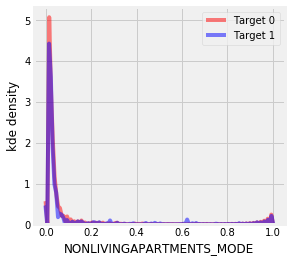

,NONLIVINGAPARTMENTS_MODE_TARGET_0,NONLIVINGAPARTMENTS_MODE_TARGET_1
count,87499.000000,6498.000000
mean,0.008097,0.007812
std,0.046244,0.046628
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.003900,0.003900
max,1.000000,1.000000


In [108]:
var_names = var_float.columns
var = var_names[37]
print('Float variable name:', var)
# % missing value
print('% missing value', train[var].isnull().sum()/len(train[var])* 100)
# distribution of variable:
sns.kdeplot(train.loc[train['TARGET'] == 0, var], label = 'Target 0', color='red', alpha=0.5)
sns.kdeplot(train.loc[train['TARGET'] == 1, var], label = 'Target 1', color='blue', alpha=0.5)
plt.xlabel(var)
plt.ylabel('kde density')
#plt.yscale('log')
plt.grid(True)
plt.rcParams['figure.figsize'] = 4,4
plt.show()

# Statistical summary
# with target '0'
target_0_des = train.loc[train['TARGET'] == 0, var].describe().rename('NONLIVINGAPARTMENTS_MODE_TARGET_0')
#print('Target 0:', target_0_des)
# with target '1'
target_1_des = train.loc[train['TARGET'] == 1, var].describe().rename('NONLIVINGAPARTMENTS_MODE_TARGET_1')
#print('Target 1:', target_1_des)
pd.concat([target_0_des, target_1_des], axis=1)


In [109]:
# missing values #train[var] = train[var].fillna(train[var].median())
train[var] = train[var].fillna(0)
print('% missing value', train[var].isnull().sum()/len(train[var])* 100)

% missing value 0.0


Float variable name: NONLIVINGAREA_MODE
% missing value 55.17916432257708


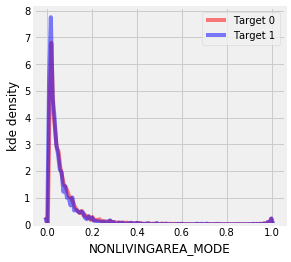

,NONLIVINGAREA_MODE_TARGET_0,NONLIVINGAREA_MODE_TARGET_1
count,128334.000000,9495.000000
mean,0.027265,0.023739
std,0.070719,0.063228
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.001100,0.000000
75%,0.023300,0.020200
max,1.000000,1.000000


In [110]:
var_names = var_float.columns
var = var_names[38]
print('Float variable name:', var)
# % missing value
print('% missing value', train[var].isnull().sum()/len(train[var])* 100)
# distribution of variable:
sns.kdeplot(train.loc[train['TARGET'] == 0, var], label = 'Target 0', color='red', alpha=0.5)
sns.kdeplot(train.loc[train['TARGET'] == 1, var], label = 'Target 1', color='blue', alpha=0.5)
plt.xlabel(var)
plt.ylabel('kde density')
#plt.yscale('log')
plt.grid(True)
plt.rcParams['figure.figsize'] = 4,4
plt.show()

# Statistical summary
# with target '0'
target_0_des = train.loc[train['TARGET'] == 0, var].describe().rename('NONLIVINGAREA_MODE_TARGET_0')
#print('Target 0:', target_0_des)
# with target '1'
target_1_des = train.loc[train['TARGET'] == 1, var].describe().rename('NONLIVINGAREA_MODE_TARGET_1')
#print('Target 1:', target_1_des)
pd.concat([target_0_des, target_1_des], axis=1)

In [111]:
# missing values #train[var] = train[var].fillna(train[var].median())
train[var] = train[var].fillna(0)
print('% missing value', train[var].isnull().sum()/len(train[var])* 100)

% missing value 0.0


Float variable name: APARTMENTS_MEDI
% missing value 50.74972927797705


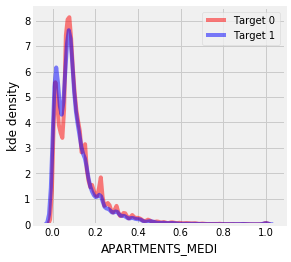

,TARGET_0,TARGET_1
count,140910.000000,10540.000000
mean,0.118709,0.106212
std,0.109567,0.101504
min,0.000000,0.000000
25%,0.058300,0.041600
50%,0.087400,0.083300
75%,0.149900,0.133200
max,1.000000,1.000000


In [112]:
var_names = var_float.columns
var = var_names[39]
print('Float variable name:', var)
# % missing value
print('% missing value', train[var].isnull().sum()/len(train[var])* 100)
# distribution of variable:
sns.kdeplot(train.loc[train['TARGET'] == 0, var], label = 'Target 0', color='red', alpha=0.5)
sns.kdeplot(train.loc[train['TARGET'] == 1, var], label = 'Target 1', color='blue', alpha=0.5)
plt.xlabel(var)
plt.ylabel('kde density')
#plt.yscale('log')
plt.grid(True)
plt.rcParams['figure.figsize'] = 4,4
plt.show()

# Statistical summary
# with target '0'
target_0_des = train.loc[train['TARGET'] == 0, var].describe().rename('TARGET_0')
#print('Target 0:', target_0_des)
# with target '1'
target_1_des = train.loc[train['TARGET'] == 1, var].describe().rename('TARGET_1')
#print('Target 1:', target_1_des)
pd.concat([target_0_des, target_1_des], axis=1)

In [113]:
# missing values #train[var] = train[var].fillna(train[var].median())
train[var] = train[var].fillna(0)
print('% missing value', train[var].isnull().sum()/len(train[var])* 100)

% missing value 0.0


Float variable name: BASEMENTAREA_MEDI
% missing value 58.51595552679416


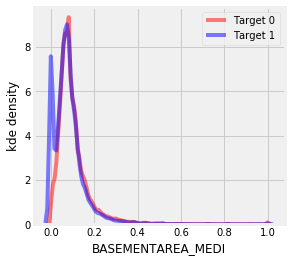

,BASEMENTAREA_MEDI_TARGET_0,BASEMENTAREA_MEDI_TARGET_1
count,118781.000000,8787.000000
mean,0.088449,0.081283
std,0.082699,0.074385
min,0.000000,0.000000
25%,0.044100,0.039300
50%,0.076100,0.071800
75%,0.112100,0.105900
max,1.000000,1.000000


In [114]:
var_names = var_float.columns
var = var_names[40]
print('Float variable name:', var)
# % missing value
print('% missing value', train[var].isnull().sum()/len(train[var])* 100)
# distribution of variable:
sns.kdeplot(train.loc[train['TARGET'] == 0, var], label = 'Target 0', color='red', alpha=0.5)
sns.kdeplot(train.loc[train['TARGET'] == 1, var], label = 'Target 1', color='blue', alpha=0.5)
plt.xlabel(var)
plt.ylabel('kde density')
#plt.yscale('log')
plt.grid(True)
plt.rcParams['figure.figsize'] = 4,4
plt.show()

# Statistical summary
# with target '0'
target_0_des = train.loc[train['TARGET'] == 0, var].describe().rename('BASEMENTAREA_MEDI_TARGET_0')
#print('Target 0:', target_0_des)
# with target '1'
target_1_des = train.loc[train['TARGET'] == 1, var].describe().rename('BASEMENTAREA_MEDI_TARGET_1')
#print('Target 1:', target_1_des)
pd.concat([target_0_des, target_1_des], axis=1)

In [115]:
# missing values #train[var] = train[var].fillna(train[var].median())
train[var] = train[var].fillna(0)
print('% missing value', train[var].isnull().sum()/len(train[var])* 100)

% missing value 0.0


Float train name: YEARS_BEGINEXPLUATATION_MEDI
% missing value 48.781019215572776


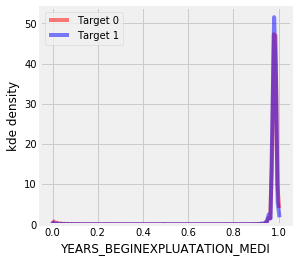

,YEARS_BEGINEXPLUATATION_MEDI_TARGET_0,YEARS_BEGINEXPLUATATION_MEDI_TARGET_1
count,146487.000000,11017.000000
mean,0.977965,0.975568
std,0.059046,0.070113
min,0.000000,0.000000
25%,0.976700,0.975700
50%,0.982100,0.981100
75%,0.986600,0.986100
max,1.000000,1.000000


In [117]:
var_names = var_float.columns
var = var_names[41]
print('Float train name:', var)
# % missing value
print('% missing value', train[var].isnull().sum()/len(train[var])* 100)
# distribution of train:
sns.kdeplot(train.loc[train['TARGET'] == 0, var], label = 'Target 0', color='red', alpha=0.5)
sns.kdeplot(train.loc[train['TARGET'] == 1, var], label = 'Target 1', color='blue', alpha=0.5)
plt.xlabel(var)
plt.ylabel('kde density')
#plt.xscale('log')
plt.grid(True)
plt.rcParams['figure.figsize'] = 4,4
plt.show()

# Statistical summary
# with target '0'
target_0_des = train.loc[train['TARGET'] == 0, var].describe().rename('YEARS_BEGINEXPLUATATION_MEDI_TARGET_0')
#print('Target 0:', target_0_des)
# with target '1'
target_1_des = train.loc[train['TARGET'] == 1, var].describe().rename('YEARS_BEGINEXPLUATATION_MEDI_TARGET_1')
#print('Target 1:', target_1_des)
pd.concat([target_0_des, target_1_des], axis=1)

In [118]:
# missing values #train[var] = train[var].fillna(train[var].median())
train[var] = train[var].fillna(0)
print('% missing value', train[var].isnull().sum()/len(train[var])* 100)


% missing value 0.0


Float variable name: YEARS_BUILD_MEDI
% missing value 66.49778381911543


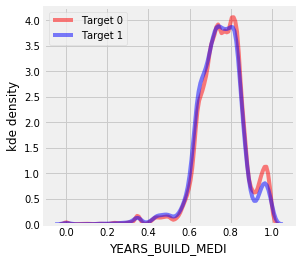

,YEARS_BUILD_MEDI_TARGET_0,YEARS_BUILD_MEDI_TARGET_1
count,95949.000000,7074.000000
mean,0.756422,0.746529
std,0.112100,0.111189
min,0.000000,0.000000
25%,0.691400,0.684700
50%,0.758500,0.751800
75%,0.825600,0.818900
max,1.000000,1.000000


In [119]:
var_names = var_float.columns
var = var_names[42]
print('Float variable name:', var)
# % missing value
print('% missing value', train[var].isnull().sum()/len(train[var])* 100)
# distribution of variable:
sns.kdeplot(train.loc[train['TARGET'] == 0, var], label = 'Target 0', color='red', alpha=0.5)
sns.kdeplot(train.loc[train['TARGET'] == 1, var], label = 'Target 1', color='blue', alpha=0.5)
plt.xlabel(var)
plt.ylabel('kde density')
#plt.yscale('log')
plt.grid(True)
plt.rcParams['figure.figsize'] = 4,4
plt.show()

# Statistical summary
# with target '0'
target_0_des = train.loc[train['TARGET'] == 0, var].describe().rename('YEARS_BUILD_MEDI_TARGET_0')
#print('Target 0:', target_0_des)
# with target '1'
target_1_des = train.loc[train['TARGET'] == 1, var].describe().rename('YEARS_BUILD_MEDI_TARGET_1')
#print('Target 1:', target_1_des)
pd.concat([target_0_des, target_1_des], axis=1)

In [120]:
# missing values #train[var] = train[var].fillna(train[var].median())
train[var] = train[var].fillna(0)
print('% missing value', train[var].isnull().sum()/len(train[var])* 100)


% missing value 0.0


Float variable name: COMMONAREA_MEDI
% missing value 69.87229725115525


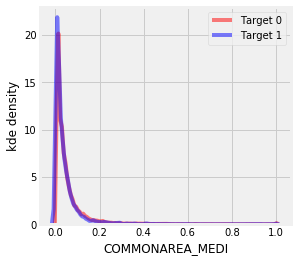

,COMMONAREA_MEDI_TARGET_0,COMMONAREA_MEDI_TARGET_1
count,86244.000000,6402.000000
mean,0.044980,0.039405
std,0.076776,0.066815
min,0.000000,0.000000
25%,0.007900,0.007200
50%,0.021000,0.018300
75%,0.051700,0.046700
max,1.000000,1.000000


In [121]:
var_names = var_float.columns
var = var_names[43]
print('Float variable name:', var)
# % missing value
print('% missing value', train[var].isnull().sum()/len(train[var])* 100)
# distribution of variable:
sns.kdeplot(train.loc[train['TARGET'] == 0, var], label = 'Target 0', color='red', alpha=0.5)
sns.kdeplot(train.loc[train['TARGET'] == 1, var], label = 'Target 1', color='blue', alpha=0.5)
plt.xlabel(var)
plt.ylabel('kde density')
#plt.yscale('log')
plt.grid(True)
plt.rcParams['figure.figsize'] = 4,4
plt.show()

# Statistical summary
# with target '0'
target_0_des = train.loc[train['TARGET'] == 0, var].describe().rename('COMMONAREA_MEDI_TARGET_0')
#print('Target 0:', target_0_des)
# with target '1'
target_1_des = train.loc[train['TARGET'] == 1, var].describe().rename('COMMONAREA_MEDI_TARGET_1')
#print('Target 1:', target_1_des)
pd.concat([target_0_des, target_1_des], axis=1)

In [122]:
# missing values #train[var] = train[var].fillna(train[var].median())
train[var] = train[var].fillna(0)
print('% missing value', train[var].isnull().sum()/len(train[var])* 100)


% missing value 0.0


Float variable name: ELEVATORS_MEDI
% missing value 53.29597965601231


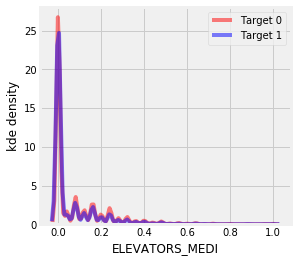

,TARGET_0,TARGET_1
count,133710.000000,9910.000000
mean,0.079342,0.061352
std,0.135528,0.118983
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.120000,0.080000
max,1.000000,1.000000


In [123]:
var_names = var_float.columns
var = var_names[44]
print('Float variable name:', var)
# % missing value
print('% missing value', train[var].isnull().sum()/len(train[var])* 100)
# distribution of variable:
sns.kdeplot(train.loc[train['TARGET'] == 0, var], label = 'Target 0', color='red', alpha=0.5)
sns.kdeplot(train.loc[train['TARGET'] == 1, var], label = 'Target 1', color='blue', alpha=0.5)
plt.xlabel(var)
plt.ylabel('kde density')
#plt.yscale('log')
plt.grid(True)
plt.rcParams['figure.figsize'] = 4,4
plt.show()

# Statistical summary
# with target '0'
target_0_des = train.loc[train['TARGET'] == 0, var].describe().rename('TARGET_0')
#print('Target 0:', target_0_des)
# with target '1'
target_1_des = train.loc[train['TARGET'] == 1, var].describe().rename('TARGET_1')
#print('Target 1:', target_1_des)
pd.concat([target_0_des, target_1_des], axis=1)

In [124]:
# missing values #train[var] = train[var].fillna(train[var].median())
train[var] = train[var].fillna(0)
print('% missing value', train[var].isnull().sum()/len(train[var])* 100)

% missing value 0.0


Float variable name: ENTRANCES_MEDI
% missing value 50.3487680115508


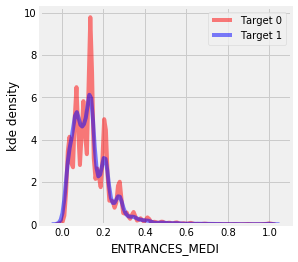

,TARGET_0,TARGET_1
count,142069.000000,10614.000000
mean,0.149787,0.142225
std,0.100481,0.098443
min,0.000000,0.000000
25%,0.069000,0.069000
50%,0.137900,0.137900
75%,0.206900,0.206900
max,1.000000,1.000000


In [125]:
var_names = var_float.columns
var = var_names[45]
print('Float variable name:', var)
# % missing value
print('% missing value', train[var].isnull().sum()/len(train[var])* 100)
# distribution of variable:
sns.kdeplot(train.loc[train['TARGET'] == 0, var], label = 'Target 0', color='red', alpha=0.5)
sns.kdeplot(train.loc[train['TARGET'] == 1, var], label = 'Target 1', color='blue', alpha=0.5)
plt.xlabel(var)
plt.ylabel('kde density')
#plt.yscale('log')
plt.grid(True)
plt.rcParams['figure.figsize'] = 4,4
plt.show()

# Statistical summary
# with target '0'
target_0_des = train.loc[train['TARGET'] == 0, var].describe().rename('TARGET_0')
#print('Target 0:', target_0_des)
# with target '1'
target_1_des = train.loc[train['TARGET'] == 1, var].describe().rename('TARGET_1')
#print('Target 1:', target_1_des)
pd.concat([target_0_des, target_1_des], axis=1)

In [126]:
# missing values #train[var] = train[var].fillna(train[var].median())
train[var] = train[var].fillna(0)
print('% missing value', train[var].isnull().sum()/len(train[var])* 100)

% missing value 0.0


Float variable name: FLOORSMAX_MEDI
% missing value 49.76082156410665


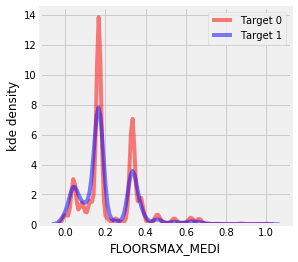

,TARGET_0,TARGET_1
count,143730.000000,10761.000000
mean,0.227566,0.202698
std,0.145653,0.134708
min,0.000000,0.000000
25%,0.166700,0.125000
50%,0.166700,0.166700
75%,0.333300,0.333300
max,1.000000,1.000000


In [127]:
var_names = var_float.columns
var = var_names[46]
print('Float variable name:', var)
# % missing value
print('% missing value', train[var].isnull().sum()/len(train[var])* 100)
# distribution of variable:
sns.kdeplot(train.loc[train['TARGET'] == 0, var], label = 'Target 0', color='red', alpha=0.5)
sns.kdeplot(train.loc[train['TARGET'] == 1, var], label = 'Target 1', color='blue', alpha=0.5)
plt.xlabel(var)
plt.ylabel('kde density')
#plt.yscale('log')
plt.grid(True)
plt.rcParams['figure.figsize'] = 4,4
plt.show()

# Statistical summary
# with target '0'
target_0_des = train.loc[train['TARGET'] == 0, var].describe().rename('TARGET_0')
#print('Target 0:', target_0_des)
# with target '1'
target_1_des = train.loc[train['TARGET'] == 1, var].describe().rename('TARGET_1')
#print('Target 1:', target_1_des)
pd.concat([target_0_des, target_1_des], axis=1)

In [128]:
# missing values #train[var] = train[var].fillna(train[var].median())
train[var] = train[var].fillna(0)
print('% missing value', train[var].isnull().sum()/len(train[var])* 100)


% missing value 0.0


Float variable name: FLOORSMIN_MEDI
% missing value 67.84862980511267


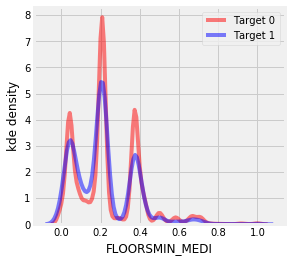

,TARGET_0,TARGET_1
count,92052.000000,6817.000000
mean,0.233107,0.211752
std,0.162762,0.148933
min,0.000000,0.000000
25%,0.083300,0.083300
50%,0.208300,0.208300
75%,0.375000,0.333300
max,1.000000,1.000000


In [129]:
var_names = var_float.columns
var = var_names[47]
print('Float variable name:', var)
# % missing value
print('% missing value', train[var].isnull().sum()/len(train[var])* 100)
# distribution of variable:
sns.kdeplot(train.loc[train['TARGET'] == 0, var], label = 'Target 0', color='red', alpha=0.5)
sns.kdeplot(train.loc[train['TARGET'] == 1, var], label = 'Target 1', color='blue', alpha=0.5)
plt.xlabel(var)
plt.ylabel('kde density')
#plt.yscale('log')
plt.grid(True)
plt.rcParams['figure.figsize'] = 4,4
plt.show()

# Statistical summary
# with target '0'
target_0_des = train.loc[train['TARGET'] == 0, var].describe().rename('TARGET_0')
#print('Target 0:', target_0_des)
# with target '1'
target_1_des = train.loc[train['TARGET'] == 1, var].describe().rename('TARGET_1')
#print('Target 1:', target_1_des)
pd.concat([target_0_des, target_1_des], axis=1)

In [130]:
# missing values #train[var] = train[var].fillna(train[var].median())
train[var] = train[var].fillna(0)
print('% missing value', train[var].isnull().sum()/len(train[var])* 100)


% missing value 0.0


Float variable name: LANDAREA_MEDI
% missing value 59.376737742714894


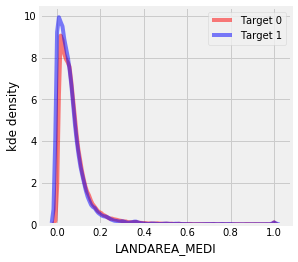

,TARGET_0,TARGET_1
count,116200.000000,8721.000000
mean,0.067421,0.063793
std,0.082233,0.081093
min,0.000000,0.000000
25%,0.018800,0.017900
50%,0.048900,0.045400
75%,0.087100,0.081800
max,1.000000,1.000000


In [131]:
var_names = var_float.columns
var = var_names[48]
print('Float variable name:', var)
# % missing value
print('% missing value', train[var].isnull().sum()/len(train[var])* 100)
# distribution of variable:
sns.kdeplot(train.loc[train['TARGET'] == 0, var], label = 'Target 0', color='red', alpha=0.5)
sns.kdeplot(train.loc[train['TARGET'] == 1, var], label = 'Target 1', color='blue', alpha=0.5)
plt.xlabel(var)
plt.ylabel('kde density')
#plt.yscale('log')
plt.grid(True)
plt.rcParams['figure.figsize'] = 4,4
plt.show()

# Statistical summary
# with target '0'
target_0_des = train.loc[train['TARGET'] == 0, var].describe().rename('TARGET_0')
#print('Target 0:', target_0_des)
# with target '1'
target_1_des = train.loc[train['TARGET'] == 1, var].describe().rename('TARGET_1')
#print('Target 1:', target_1_des)
pd.concat([target_0_des, target_1_des], axis=1)

In [132]:
# missing values #train[var] = train[var].fillna(train[var].median())
train[var] = train[var].fillna(0)
print('% missing value', train[var].isnull().sum()/len(train[var])* 100)


% missing value 0.0


Float variable name: LIVINGAPARTMENTS_MEDI
% missing value 68.35495315614726


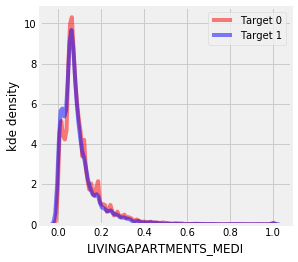

,TARGET_0,TARGET_1
count,90609.000000,6703.000000
mean,0.102580,0.093478
std,0.093955,0.088873
min,0.000000,0.000000
25%,0.051300,0.045700
50%,0.077000,0.068400
75%,0.123100,0.118000
max,1.000000,1.000000


In [133]:
var_names = var_float.columns
var = var_names[49]
print('Float variable name:', var)
# % missing value
print('% missing value', train[var].isnull().sum()/len(train[var])* 100)
# distribution of variable:
sns.kdeplot(train.loc[train['TARGET'] == 0, var], label = 'Target 0', color='red', alpha=0.5)
sns.kdeplot(train.loc[train['TARGET'] == 1, var], label = 'Target 1', color='blue', alpha=0.5)
plt.xlabel(var)
plt.ylabel('kde density')
#plt.yscale('log')
plt.grid(True)
plt.rcParams['figure.figsize'] = 4,4
plt.show()

# Statistical summary
# with target '0'
target_0_des = train.loc[train['TARGET'] == 0, var].describe().rename('TARGET_0')
#print('Target 0:', target_0_des)
# with target '1'
target_1_des = train.loc[train['TARGET'] == 1, var].describe().rename('TARGET_1')
#print('Target 1:', target_1_des)
pd.concat([target_0_des, target_1_des], axis=1)

In [134]:
# missing values #train[var] = train[var].fillna(train[var].median())
train[var] = train[var].fillna(0)
print('% missing value', train[var].isnull().sum()/len(train[var])* 100)

% missing value 0.0


Float variable name: LIVINGAREA_MEDI
% missing value 50.193326417591564


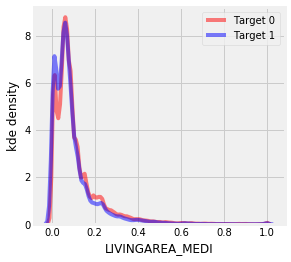

,TARGET_0,TARGET_1
count,142447.000000,10714.000000
mean,0.109615,0.095205
std,0.112931,0.101968
min,0.000000,0.000000
25%,0.046500,0.035700
50%,0.075800,0.067700
75%,0.131900,0.115200
max,1.000000,1.000000


In [135]:
var_names = var_float.columns
var = var_names[50]
print('Float variable name:', var)
# % missing value
print('% missing value', train[var].isnull().sum()/len(train[var])* 100)
# distribution of variable:
sns.kdeplot(train.loc[train['TARGET'] == 0, var], label = 'Target 0', color='red', alpha=0.5)
sns.kdeplot(train.loc[train['TARGET'] == 1, var], label = 'Target 1', color='blue', alpha=0.5)
plt.xlabel(var)
plt.ylabel('kde density')
#plt.yscale('log')
plt.grid(True)
plt.rcParams['figure.figsize'] = 4,4
plt.show()

# Statistical summary
# with target '0'
target_0_des = train.loc[train['TARGET'] == 0, var].describe().rename('TARGET_0')
#print('Target 0:', target_0_des)
# with target '1'
target_1_des = train.loc[train['TARGET'] == 1, var].describe().rename('TARGET_1')
#print('Target 1:', target_1_des)
pd.concat([target_0_des, target_1_des], axis=1)

In [136]:
# missing values #train[var] = train[var].fillna(train[var].median())
train[var] = train[var].fillna(0)
print('% missing value', train[var].isnull().sum()/len(train[var])* 100)

% missing value 0.0


Float variable name: NONLIVINGAPARTMENTS_MEDI
% missing value 69.43296337366793


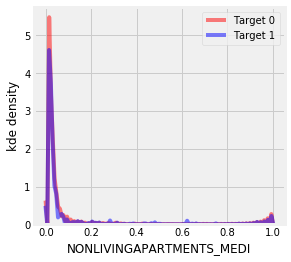

,TARGET_0,TARGET_1
count,87499.000000,6498.000000
mean,0.008688,0.008171
std,0.047478,0.046690
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.003900,0.003900
max,1.000000,1.000000


In [137]:
var_names = var_float.columns
var = var_names[51]
print('Float variable name:', var)
# % missing value
print('% missing value', train[var].isnull().sum()/len(train[var])* 100)
# distribution of variable:
sns.kdeplot(train.loc[train['TARGET'] == 0, var], label = 'Target 0', color='red', alpha=0.5)
sns.kdeplot(train.loc[train['TARGET'] == 1, var], label = 'Target 1', color='blue', alpha=0.5)
plt.xlabel(var)
plt.ylabel('kde density')
#plt.yscale('log')
plt.grid(True)
plt.rcParams['figure.figsize'] = 4,4
plt.show()

# Statistical summary
# with target '0'
target_0_des = train.loc[train['TARGET'] == 0, var].describe().rename('TARGET_0')
#print('Target 0:', target_0_des)
# with target '1'
target_1_des = train.loc[train['TARGET'] == 1, var].describe().rename('TARGET_1')
#print('Target 1:', target_1_des)
pd.concat([target_0_des, target_1_des], axis=1)

In [138]:
# missing values #train[var] = train[var].fillna(train[var].median())
train[var] = train[var].fillna(0)
print('% missing value', train[var].isnull().sum()/len(train[var])* 100)

% missing value 0.0


Float variable name: NONLIVINGAREA_MEDI
% missing value 55.17916432257708


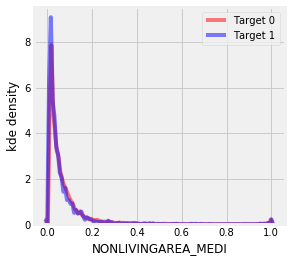

,TARGET_0,TARGET_1
count,128334.000000,9495.000000
mean,0.028491,0.024796
std,0.070652,0.063136
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.003100,0.002300
75%,0.026800,0.023000
max,1.000000,1.000000


In [139]:
var_names = var_float.columns
var = var_names[52]
print('Float variable name:', var)
# % missing value
print('% missing value', train[var].isnull().sum()/len(train[var])* 100)
# distribution of variable:
sns.kdeplot(train.loc[train['TARGET'] == 0, var], label = 'Target 0', color='red', alpha=0.5)
sns.kdeplot(train.loc[train['TARGET'] == 1, var], label = 'Target 1', color='blue', alpha=0.5)
plt.xlabel(var)
plt.ylabel('kde density')
#plt.yscale('log')
plt.grid(True)
plt.rcParams['figure.figsize'] = 4,4
plt.show()

# Statistical summary
# with target '0'
target_0_des = train.loc[train['TARGET'] == 0, var].describe().rename('TARGET_0')
#print('Target 0:', target_0_des)
# with target '1'
target_1_des = train.loc[train['TARGET'] == 1, var].describe().rename('TARGET_1')
#print('Target 1:', target_1_des)
pd.concat([target_0_des, target_1_des], axis=1)

In [140]:
# missing values #train[var] = train[var].fillna(train[var].median())
train[var] = train[var].fillna(0)
print('% missing value', train[var].isnull().sum()/len(train[var])* 100)


% missing value 0.0


Float variable name: TOTALAREA_MODE
% missing value 48.26851722377411


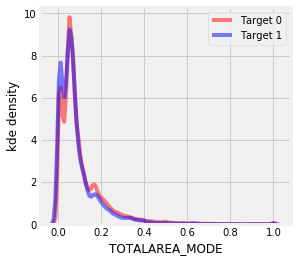

,TARGET_0,TARGET_1
count,147961.000000,11119.000000
mean,0.103506,0.089769
std,0.108041,0.098530
min,0.000000,0.000000
25%,0.041700,0.031600
50%,0.069100,0.061700
75%,0.129500,0.108400
max,1.000000,1.000000


In [141]:
var_names = var_float.columns
var = var_names[53]
print('Float variable name:', var)
# % missing value
print('% missing value', train[var].isnull().sum()/len(train[var])* 100)
# distribution of variable:
sns.kdeplot(train.loc[train['TARGET'] == 0, var], label = 'Target 0', color='red', alpha=0.5)
sns.kdeplot(train.loc[train['TARGET'] == 1, var], label = 'Target 1', color='blue', alpha=0.5)
plt.xlabel(var)
plt.ylabel('kde density')
#plt.yscale('log')
plt.grid(True)
plt.rcParams['figure.figsize'] = 4,4
plt.show()

# Statistical summary
# with target '0'
target_0_des = train.loc[train['TARGET'] == 0, var].describe().rename('TARGET_0')
#print('Target 0:', target_0_des)
# with target '1'
target_1_des = train.loc[train['TARGET'] == 1, var].describe().rename('TARGET_1')
#print('Target 1:', target_1_des)
pd.concat([target_0_des, target_1_des], axis=1)

In [142]:
# missing values #train[var] = train[var].fillna(train[var].median())
train[var] = train[var].fillna(0)
print('% missing value', train[var].isnull().sum()/len(train[var])* 100)


% missing value 0.0


We see that house/lving description had maximum % of missing values

Float variable name: OBS_30_CNT_SOCIAL_CIRCLE
% missing value 0.3320206431639844


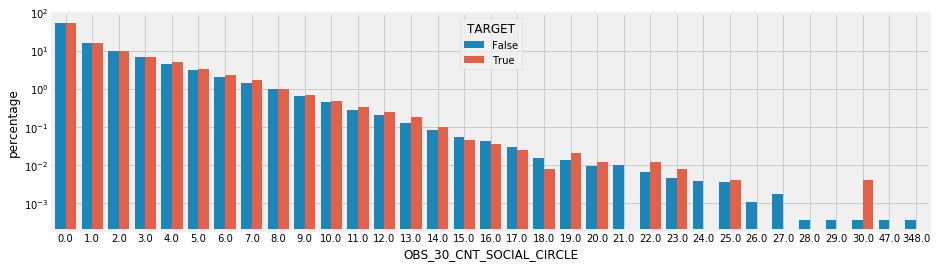

,OBS_30_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE
count,281701.000000,24789.000000
mean,1.415742,1.496148
std,2.401909,2.378552
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,2.000000,2.000000
max,348.000000,30.000000


In [143]:
var_names = var_float.columns
var = var_names[54]
print('Float variable name:', var)
# % missing value
print('% missing value', train[var].isnull().sum()/len(train[var])* 100)
# distribution of variable:
A = train.loc[train['TARGET'] == 0, var]
B = train.loc[train['TARGET'] == 1, var]
var_n = (var_float.groupby([train['TARGET']])[var].value_counts(normalize=True)
         .rename('percentage').mul(100).reset_index().sort_values(var))
plt.rcParams['figure.figsize'] = 14,4
sns.barplot(x=var, y='percentage', hue='TARGET', data=var_n)
plt.grid(True)
plt.yscale('log')
plt.show()
# Statistical summary
# with target '0'
target_0_des = train.loc[train['TARGET'] == 0, var].describe().rename(var)
#print('Target 0:', target_0_des)
# with target '1'
target_1_des = train.loc[train['TARGET'] == 1, var].describe().rename(var)
#print('Target 1:', target_1_des)
pd.concat([target_0_des, target_1_des], axis=1)

This variable describes 'how many observation of client's social surroundings with observable 30 DPD (days past due) default'. We will replace nan with 0.


In [144]:
# missing values #train[var] = train[var].fillna(train[var].median())
train[var] = train[var].fillna(0)
print('% missing value', train[var].isnull().sum()/len(train[var])* 100)

% missing value 0.0


Float variable name: DEF_30_CNT_SOCIAL_CIRCLE
% missing value 0.3320206431639844


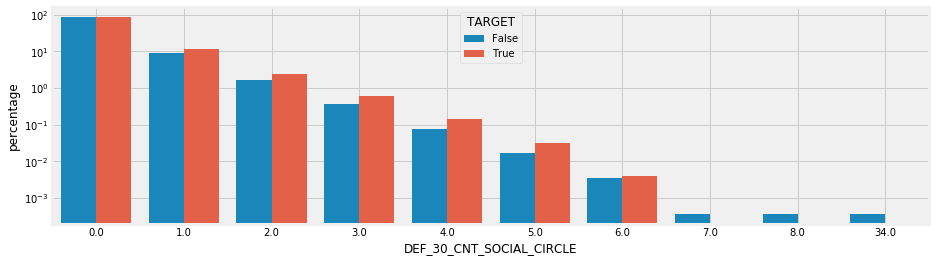

,DEF_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE
count,281701.000000,24789.000000
mean,0.139148,0.191980
std,0.439933,0.516449
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,34.000000,6.000000


In [145]:
var_names = var_float.columns
var = var_names[55]
print('Float variable name:', var)
# % missing value
print('% missing value', train[var].isnull().sum()/len(train[var])* 100)
# distribution of variable:
A = train.loc[train['TARGET'] == 0, var]
B = train.loc[train['TARGET'] == 1, var]
var_n = (var_float.groupby([train['TARGET']])[var].value_counts(normalize=True)
         .rename('percentage').mul(100).reset_index().sort_values(var))
plt.rcParams['figure.figsize'] = 14,4
sns.barplot(x=var, y='percentage', hue='TARGET', data=var_n)
plt.grid(True)
plt.yscale('log')
plt.show()
# Statistical summary
# with target '0'
target_0_des = train.loc[train['TARGET'] == 0, var].describe().rename(var)
#print('Target 0:', target_0_des)
# with target '1'
target_1_des = train.loc[train['TARGET'] == 1, var].describe().rename(var)
#print('Target 1:', target_1_des)
pd.concat([target_0_des, target_1_des], axis=1)

In [146]:
# missing values #train[var] = train[var].fillna(train[var].median())
train[var] = train[var].fillna(0)
print('% missing value', train[var].isnull().sum()/len(train[var])* 100)


% missing value 0.0


Float variable name: OBS_60_CNT_SOCIAL_CIRCLE
% missing value 0.3320206431639844


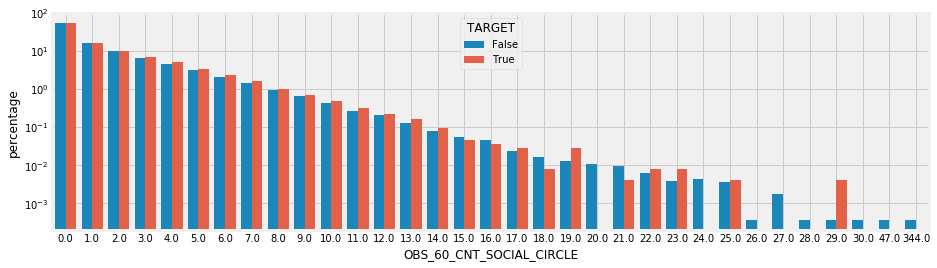

,OBS_60_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE
count,281701.000000,24789.000000
mean,1.398923,1.477672
std,2.383353,2.355712
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,2.000000,2.000000
max,344.000000,29.000000


In [147]:
var_names = var_float.columns
var = var_names[56]
print('Float variable name:', var)
# % missing value
print('% missing value', train[var].isnull().sum()/len(train[var])* 100)
# distribution of variable:
A = train.loc[train['TARGET'] == 0, var]
B = train.loc[train['TARGET'] == 1, var]
var_n = (var_float.groupby([train['TARGET']])[var].value_counts(normalize=True)
         .rename('percentage').mul(100).reset_index().sort_values(var))
plt.rcParams['figure.figsize'] = 14,4
sns.barplot(x=var, y='percentage', hue='TARGET', data=var_n)
plt.grid(True)
plt.yscale('log')
plt.show()
# Statistical summary
# with target '0'
target_0_des = train.loc[train['TARGET'] == 0, var].describe().rename(var)
#print('Target 0:', target_0_des)
# with target '1'
target_1_des = train.loc[train['TARGET'] == 1, var].describe().rename(var)
#print('Target 1:', target_1_des)
pd.concat([target_0_des, target_1_des], axis=1)

In [148]:
# missing values #train[var] = train[var].fillna(train[var].median())
train[var] = train[var].fillna(0)
print('% missing value', train[var].isnull().sum()/len(train[var])* 100)


% missing value 0.0


Float variable name: DEF_60_CNT_SOCIAL_CIRCLE
% missing value 0.3320206431639844


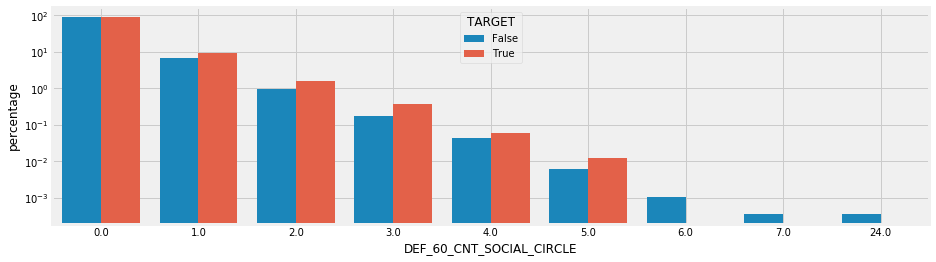

,DEF_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE
count,281701.000000,24789.000000
mean,0.096688,0.138247
std,0.355986,0.427622
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,24.000000,5.000000


In [149]:
var_names = var_float.columns
var = var_names[57]
print('Float variable name:', var)
# % missing value
print('% missing value', train[var].isnull().sum()/len(train[var])* 100)
# distribution of variable:
A = train.loc[train['TARGET'] == 0, var]
B = train.loc[train['TARGET'] == 1, var]
var_n = (var_float.groupby([train['TARGET']])[var].value_counts(normalize=True)
         .rename('percentage').mul(100).reset_index().sort_values(var))
plt.rcParams['figure.figsize'] = 14,4
sns.barplot(x=var, y='percentage', hue='TARGET', data=var_n)
plt.grid(True)
plt.yscale('log')
plt.show()
# Statistical summary
# with target '0'
target_0_des = train.loc[train['TARGET'] == 0, var].describe().rename(var)
#print('Target 0:', target_0_des)
# with target '1'
target_1_des = train.loc[train['TARGET'] == 1, var].describe().rename(var)
#print('Target 1:', target_1_des)
pd.concat([target_0_des, target_1_des], axis=1)

In [150]:
# missing values #train[var] = train[var].fillna(train[var].median())
train[var] = train[var].fillna(0)
print('% missing value', train[var].isnull().sum()/len(train[var])* 100)

% missing value 0.0


Float variable name: DAYS_LAST_PHONE_CHANGE
% missing value 0.00032519161916159093


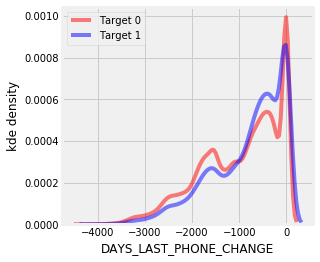

,DAYS_LAST_PHONE_CHANGE_TARGET_0,DAYS_LAST_PHONE_CHANGE_TARGET_1
count,282685.000000,24825.000000
mean,-976.333191,-808.799927
std,831.070007,758.102539
min,-4292.000000,-4070.000000
25%,-1586.000000,-1301.000000
50%,-776.000000,-594.000000
75%,-281.000000,-194.000000
max,0.000000,0.000000


In [152]:
var_names = var_float.columns
var = var_names[58]
print('Float variable name:', var)
# % missing value
print('% missing value', train[var].isnull().sum()/len(train[var])* 100)
# distribution of variable:
sns.kdeplot(train.loc[train['TARGET'] == 0, var], label = 'Target 0', color='red', alpha=0.5)
sns.kdeplot(train.loc[train['TARGET'] == 1, var], label = 'Target 1', color='blue', alpha=0.5)
plt.xlabel(var)
plt.ylabel('kde density')
#plt.yscale('log')
plt.grid(True)
plt.rcParams['figure.figsize'] = 4,4
plt.show()

# Statistical summary
# with target '0'
target_0_des = train.loc[train['TARGET'] == 0, var].describe().rename('DAYS_LAST_PHONE_CHANGE_TARGET_0')
#print('Target 0:', target_0_des)
# with target '1'
target_1_des = train.loc[train['TARGET'] == 1, var].describe().rename('DAYS_LAST_PHONE_CHANGE_TARGET_1')
#print('Target 1:', target_1_des)
pd.concat([target_0_des, target_1_des], axis=1)

This variable describes 'How many days before application did client change phone'. We will replace the missing values with median

In [153]:
# missing values #
train[var] = train[var].fillna(train[var].median())
print('% missing value', train[var].isnull().sum()/len(train[var])* 100)


% missing value 0.0


Float variable name: AMT_REQ_CREDIT_BUREAU_HOUR
% missing value 13.501630835970097


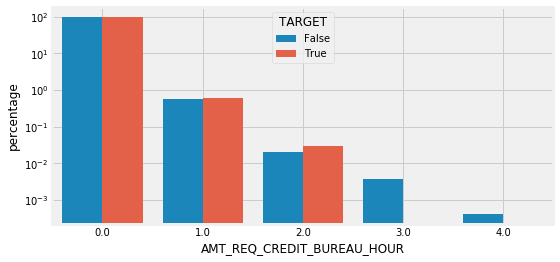

,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_HOUR
count,245459.000000,20533.000000
mean,0.006380,0.006672
std,0.083678,0.084932
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,4.000000,2.000000


In [154]:
var_names = var_float.columns
var = var_names[59]
print('Float variable name:', var)
# % missing value
print('% missing value', train[var].isnull().sum()/len(train[var])* 100)
# distribution of variable:
A = train.loc[train['TARGET'] == 0, var]
B = train.loc[train['TARGET'] == 1, var]
var_n = (var_float.groupby([train['TARGET']])[var].value_counts(normalize=True)
         .rename('percentage').mul(100).reset_index().sort_values(var))
plt.rcParams['figure.figsize'] = 8,4
sns.barplot(x=var, y='percentage', hue='TARGET', data=var_n)
plt.grid(True)
plt.yscale('log')
plt.show()
# Statistical summary
# with target '0'
target_0_des = train.loc[train['TARGET'] == 0, var].describe().rename(var)
#print('Target 0:', target_0_des)
# with target '1'
target_1_des = train.loc[train['TARGET'] == 1, var].describe().rename(var)
#print('Target 1:', target_1_des)
pd.concat([target_0_des, target_1_des], axis=1)

In [155]:
# missing values #train[var] = train[var].fillna(train[var].median())
train[var] = train[var].fillna(0)
print('% missing value', train[var].isnull().sum()/len(train[var])* 100)

% missing value 0.0


Variable describes 'Number of enquiries to Credit Bureau about the client one hour before application'. We will replace the missing values with 0.

Float variable name: AMT_REQ_CREDIT_BUREAU_DAY
% missing value 13.501630835970097


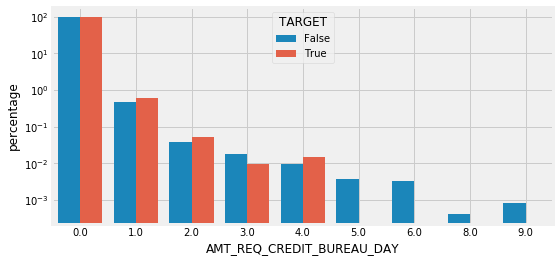

,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_DAY
count,245459.000000,20533.000000
mean,0.006914,0.008036
std,0.110970,0.106669
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,9.000000,4.000000


In [156]:
var_names = var_float.columns
var = var_names[60]
print('Float variable name:', var)
# % missing value
print('% missing value', train[var].isnull().sum()/len(train[var])* 100)
# distribution of variable:
A = train.loc[train['TARGET'] == 0, var]
B = train.loc[train['TARGET'] == 1, var]
var_n = (var_float.groupby([train['TARGET']])[var].value_counts(normalize=True)
         .rename('percentage').mul(100).reset_index().sort_values(var))
plt.rcParams['figure.figsize'] = 8,4
sns.barplot(x=var, y='percentage', hue='TARGET', data=var_n)
plt.grid(True)
plt.yscale('log')
plt.show()
# Statistical summary
# with target '0'
target_0_des = train.loc[train['TARGET'] == 0, var].describe().rename(var)
#print('Target 0:', target_0_des)
# with target '1'
target_1_des = train.loc[train['TARGET'] == 1, var].describe().rename(var)
#print('Target 1:', target_1_des)
pd.concat([target_0_des, target_1_des], axis=1)

In [157]:
# missing values #train[var] = train[var].fillna(train[var].median())
train[var] = train[var].fillna(0)
print('% missing value', train[var].isnull().sum()/len(train[var])* 100)

% missing value 0.0


Float variable name: AMT_REQ_CREDIT_BUREAU_WEEK
% missing value 13.501630835970097


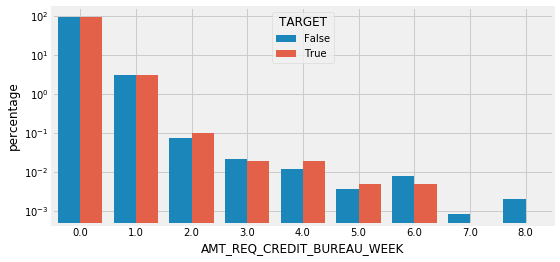

,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_WEEK
count,245459.000000,20533.000000
mean,0.034315,0.034919
std,0.204499,0.203944
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,8.000000,6.000000


In [158]:
var_names = var_float.columns
var = var_names[61]
print('Float variable name:', var)
# % missing value
print('% missing value', train[var].isnull().sum()/len(train[var])* 100)
# distribution of variable:
A = train.loc[train['TARGET'] == 0, var]
B = train.loc[train['TARGET'] == 1, var]
var_n = (var_float.groupby([train['TARGET']])[var].value_counts(normalize=True)
         .rename('percentage').mul(100).reset_index().sort_values(var))
plt.rcParams['figure.figsize'] = 8,4
sns.barplot(x=var, y='percentage', hue='TARGET', data=var_n)
plt.grid(True)
plt.yscale('log')
plt.show()
# Statistical summary
# with target '0'
target_0_des = train.loc[train['TARGET'] == 0, var].describe().rename(var)
#print('Target 0:', target_0_des)
# with target '1'
target_1_des = train.loc[train['TARGET'] == 1, var].describe().rename(var)
#print('Target 1:', target_1_des)
pd.concat([target_0_des, target_1_des], axis=1)

In [159]:
# missing values #train[var] = train[var].fillna(train[var].median())
train[var] = train[var].fillna(0)
print('% missing value', train[var].isnull().sum()/len(train[var])* 100)

% missing value 0.0


Float variable name: AMT_REQ_CREDIT_BUREAU_MON
% missing value 13.501630835970097


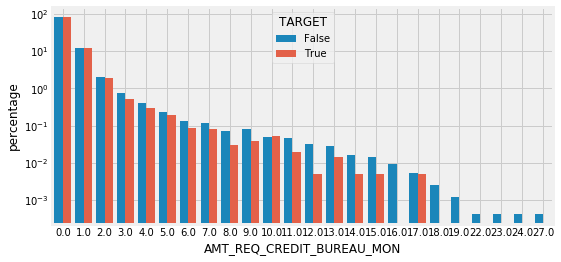

,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_MON
count,245459.000000,20533.000000
mean,0.270697,0.227926
std,0.929234,0.745052
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,27.000000,17.000000


In [160]:
var_names = var_float.columns
var = var_names[62]
print('Float variable name:', var)
# % missing value
print('% missing value', train[var].isnull().sum()/len(train[var])* 100)
# distribution of variable:
A = train.loc[train['TARGET'] == 0, var]
B = train.loc[train['TARGET'] == 1, var]
var_n = (var_float.groupby([train['TARGET']])[var].value_counts(normalize=True)
         .rename('percentage').mul(100).reset_index().sort_values(var))
plt.rcParams['figure.figsize'] = 8,4
sns.barplot(x=var, y='percentage', hue='TARGET', data=var_n)
plt.grid(True)
plt.yscale('log')
plt.show()
# Statistical summary
# with target '0'
target_0_des = train.loc[train['TARGET'] == 0, var].describe().rename(var)
#print('Target 0:', target_0_des)
# with target '1'
target_1_des = train.loc[train['TARGET'] == 1, var].describe().rename(var)
#print('Target 1:', target_1_des)
pd.concat([target_0_des, target_1_des], axis=1)

In [161]:
# missing values #train[var] = train[var].fillna(train[var].median())
train[var] = train[var].fillna(0)
print('% missing value', train[var].isnull().sum()/len(train[var])* 100)

% missing value 0.0


Float variable name: AMT_REQ_CREDIT_BUREAU_QRT
% missing value 13.501630835970097


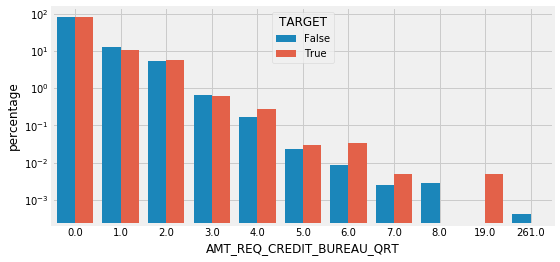

,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_QRT
count,245459.000000,20533.000000
mean,0.265939,0.259923
std,0.805879,0.643742
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,261.000000,19.000000


In [162]:
var_names = var_float.columns
var = var_names[63]
print('Float variable name:', var)
# % missing value
print('% missing value', train[var].isnull().sum()/len(train[var])* 100)
# distribution of variable:
A = train.loc[train['TARGET'] == 0, var]
B = train.loc[train['TARGET'] == 1, var]
var_n = (var_float.groupby([train['TARGET']])[var].value_counts(normalize=True)
         .rename('percentage').mul(100).reset_index().sort_values(var))
plt.rcParams['figure.figsize'] = 8,4
sns.barplot(x=var, y='percentage', hue='TARGET', data=var_n)
plt.grid(True)
plt.yscale('log')
plt.show()
# Statistical summary
# with target '0'
target_0_des = train.loc[train['TARGET'] == 0, var].describe().rename(var)
#print('Target 0:', target_0_des)
# with target '1'
target_1_des = train.loc[train['TARGET'] == 1, var].describe().rename(var)
#print('Target 1:', target_1_des)
pd.concat([target_0_des, target_1_des], axis=1)

In [163]:
# missing values #train[var] = train[var].fillna(train[var].median())
train[var] = train[var].fillna(0)
print('% missing value', train[var].isnull().sum()/len(train[var])* 100)

% missing value 0.0


Float variable name: AMT_REQ_CREDIT_BUREAU_YEAR
% missing value 13.501630835970097


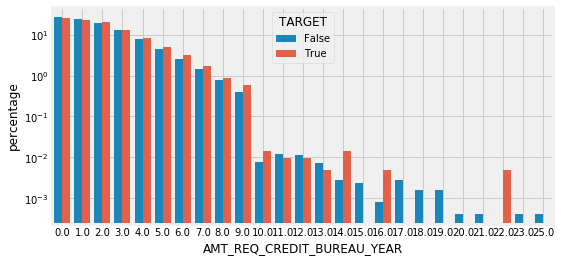

,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_REQ_CREDIT_BUREAU_YEAR
count,245459.000000,20533.000000
mean,1.889199,2.028783
std,1.862996,1.934030
min,0.000000,0.000000
25%,0.000000,1.000000
50%,1.000000,2.000000
75%,3.000000,3.000000
max,25.000000,22.000000


In [164]:
var_names = var_float.columns
var = var_names[64]
print('Float variable name:', var)
# % missing value
print('% missing value', train[var].isnull().sum()/len(train[var])* 100)
# distribution of variable:
A = train.loc[train['TARGET'] == 0, var]
B = train.loc[train['TARGET'] == 1, var]
var_n = (var_float.groupby([train['TARGET']])[var].value_counts(normalize=True)
         .rename('percentage').mul(100).reset_index().sort_values(var))
plt.rcParams['figure.figsize'] = 8,4
sns.barplot(x=var, y='percentage', hue='TARGET', data=var_n)
plt.grid(True)
plt.yscale('log')
plt.show()
# Statistical summary
# with target '0'
target_0_des = train.loc[train['TARGET'] == 0, var].describe().rename(var)
#print('Target 0:', target_0_des)
# with target '1'
target_1_des = train.loc[train['TARGET'] == 1, var].describe().rename(var)
#print('Target 1:', target_1_des)
pd.concat([target_0_des, target_1_des], axis=1)

In [165]:
# missing values #train[var] = train[var].fillna(train[var].median())
train[var] = train[var].fillna(0)
print('% missing value', train[var].isnull().sum()/len(train[var])* 100)


% missing value 0.0


## Variable type: Integer

In [166]:
var_int_cnt = var_int.drop(columns = ['CNT_CHILDREN', 'HOUR_APPR_PROCESS_START', 'DAYS_EMPLOYED', 'DAYS_BIRTH', 'SK_ID_CURR', 'DAYS_ID_PUBLISH'])
var_names = var_int_cnt.columns
var_names[0]

'TARGET'

Integer variable name: FLAG_MOBIL
% missing value 0.0


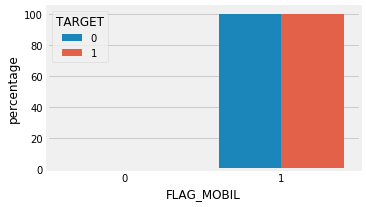

Group summary
    TARGET  FLAG_MOBIL  percentage
1       0           0    0.000354
0       0           1   99.999646
2       1           1  100.000000

Statistical summary:
        FLAG_MOBIL_TARGET_0 FLAG_MOBIL_TARGET_1
count               282686               24825
unique                   2                   1
top                   True                True
freq                282685               24825


In [167]:
var_int_cnt = var_int.drop(columns = ['CNT_CHILDREN', 'HOUR_APPR_PROCESS_START', 'DAYS_EMPLOYED', 'DAYS_BIRTH', 'SK_ID_CURR', 'DAYS_ID_PUBLISH'])
var_names = var_int_cnt.columns
var_n = var_names[1]
print('Integer variable name:', var_n)
# % missing value
print('% missing value', train[var_n].isnull().sum()/len(train[var_n])* 100)
# distribution of variable:
var = (var_int_cnt.groupby([var_names[0]])[var_names[1]].value_counts(normalize=True).rename('percentage').mul(100).reset_index().sort_values(var_names[1]))
plt.rcParams['figure.figsize'] = 5,3
sns.barplot(x="FLAG_MOBIL", y='percentage', hue='TARGET', data=var)
plt.show()
# Statistical summary
target_0_des = train.loc[train['TARGET'] == 0, var_n].describe().rename('FLAG_MOBIL_TARGET_0')
target_1_des = train.loc[train['TARGET'] == 1, var_n].describe().rename('FLAG_MOBIL_TARGET_1')
#print('Target 1:', target_1_des)
print('Group summary\n', var)
print('\nStatistical summary:\n', pd.concat([target_0_des, target_1_des], axis=1))

This variable describes if 'client provide mobile phone (1=YES, 0=NO)'.All data are flagged as 1. So we can get rid of this variable.

In [ ]:
#dropping the column
train = train.drop(columns=['FLAG_MOBIL'])

Integer variable name: FLAG_EMP_PHONE
% missing value 0.0


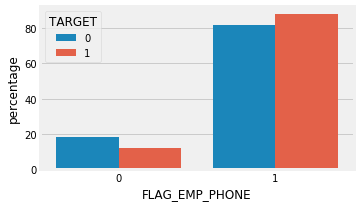

Group summary
    TARGET  FLAG_EMP_PHONE  percentage
1       0               0   18.534699
3       1               0   12.048338
0       0               1   81.465301
2       1               1   87.951662

Statistical summary:
        FLAG_EMP_PHONE_TARGET_0 FLAG_EMP_PHONE_TARGET_1
count                   282686                   24825
unique                       2                       2
top                       True                    True
freq                    230291                   21834


In [173]:
var_n = var_names[2]
print('Integer variable name:', var_n)
# % missing value
print('% missing value', train[var_n].isnull().sum()/len(train[var_n])* 100)
# distribution of variable:
# This is how we have to present the bar plot: using the percentage, not count
var = (var_int_cnt.groupby([var_names[0]])[var_names[2]].value_counts(normalize=True).rename('percentage').mul(100).reset_index().sort_values(var_names[2]))
sns.barplot(x="FLAG_EMP_PHONE", y='percentage', hue='TARGET', data=var)
plt.show()
# Statistical summary
target_0_des = train.loc[train['TARGET'] == 0, var_n].describe().rename('FLAG_EMP_PHONE_TARGET_0')
target_1_des = train.loc[train['TARGET'] == 1, var_n].describe().rename('FLAG_EMP_PHONE_TARGET_1')
#print('Target 1:', target_1_des)
print('Group summary\n', var)
print('\nStatistical summary:\n', pd.concat([target_0_des, target_1_des], axis=1))

Did client provide work phone (1=YES, 0=NO): we would replace nan with 0.

Integer variable name: FLAG_WORK_PHONE
% missing value 0.0


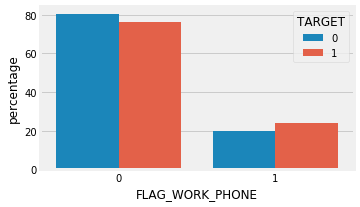

Group summary
    TARGET  FLAG_WORK_PHONE  percentage
0       0                0   80.400869
2       1                0   76.217523
1       0                1   19.599131
3       1                1   23.782477

Statistical summary:
        FLAG_WORK_PHONE_TARGET_0  FLAG_WORK_PHONE_TARGET_1
count             282686.000000              24825.000000
mean                   0.195991                  0.237825
std                    0.396963                  0.425760
min                    0.000000                  0.000000
25%                    0.000000                  0.000000
50%                    0.000000                  0.000000
75%                    0.000000                  0.000000
max                    1.000000                  1.000000


In [177]:
var_int_cnt = var_int.drop(columns = ['CNT_CHILDREN', 'HOUR_APPR_PROCESS_START', 'DAYS_EMPLOYED', 'DAYS_BIRTH', 'SK_ID_CURR', 'DAYS_ID_PUBLISH'])
var_names = var_int_cnt.columns
var_n = var_names[3]
print('Integer variable name:', var_n)
# % missing value
print('% missing value', train[var_n].isnull().sum()/len(train[var_n])* 100)
# distribution of variable:
# This is how we have to present the bar plot: using the percentage, not count
var = (var_int_cnt.groupby([var_names[0]])[var_names[3]].value_counts(normalize=True).rename('percentage').mul(100).reset_index().sort_values(var_names[3]))
sns.barplot(x="FLAG_WORK_PHONE", y='percentage', hue='TARGET', data=var)
plt.show()
# Statistical summary
target_0_des = train.loc[train['TARGET'] == 0, var_n].describe().rename('FLAG_WORK_PHONE_TARGET_0')
target_1_des = train.loc[train['TARGET'] == 1, var_n].describe().rename('FLAG_WORK_PHONE_TARGET_1')
#print('Target 1:', target_1_des)
print('Group summary\n', var)
print('\nStatistical summary:\n', pd.concat([target_0_des, target_1_des], axis=1))

Integer variable name: FLAG_CONT_MOBILE
% missing value 0.0


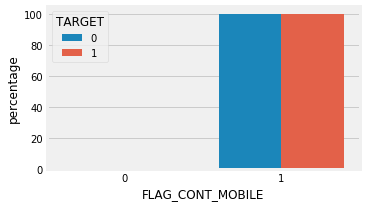

Group summary
    TARGET  FLAG_CONT_MOBILE  percentage
1       0                 0    0.187133
3       1                 0    0.181269
0       0                 1   99.812867
2       1                 1   99.818731

Statistical summary:
        FLAG_CONT_MOBILE_TARGET_0 FLAG_CONT_MOBILE_TARGET_1
count                     282686                     24825
unique                         2                         2
top                         True                      True
freq                      282157                     24780


In [178]:
var_int_cnt = var_int.drop(columns = ['CNT_CHILDREN', 'HOUR_APPR_PROCESS_START', 'DAYS_EMPLOYED', 'DAYS_BIRTH', 'SK_ID_CURR', 'DAYS_ID_PUBLISH'])
var_names = var_int_cnt.columns
var_n = var_names[4]
print('Integer variable name:', var_n)
# % missing value
print('% missing value', train[var_n].isnull().sum()/len(train[var_n])* 100)
# distribution of variable:
# This is how we have to present the bar plot: using the percentage, not count
var = (var_int_cnt.groupby([var_names[0]])[var_names[4]].value_counts(normalize=True).rename('percentage').mul(100).reset_index().sort_values(var_names[4]))
sns.barplot(x="FLAG_CONT_MOBILE", y='percentage', hue='TARGET', data=var)
plt.show()
# Statistical summary
target_0_des = train.loc[train['TARGET'] == 0, var_n].describe().rename('FLAG_CONT_MOBILE_TARGET_0')
target_1_des = train.loc[train['TARGET'] == 1, var_n].describe().rename('FLAG_CONT_MOBILE_TARGET_1')
#print('Target 1:', target_1_des)
print('Group summary\n', var)
print('\nStatistical summary:\n', pd.concat([target_0_des, target_1_des], axis=1))

This variable also does not make any difference. We will get rid of this variable.

In [179]:
train = train.drop(columns=['FLAG_CONT_MOBILE'])

Integer variable name: FLAG_PHONE
% missing value 0.0


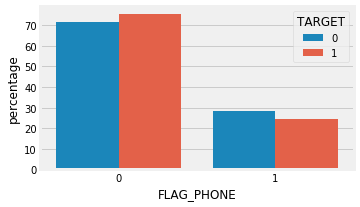

Group summary
    TARGET  FLAG_PHONE  percentage
0       0           0   71.576237
2       1           0   75.504532
1       0           1   28.423763
3       1           1   24.495468

Statistical summary:
        FLAG_PHONE_TARGET_0 FLAG_PHONE_TARGET_1
count               282686               24825
unique                   2                   2
top                  False               False
freq                202336               18744


In [180]:
var_int_cnt = var_int.drop(columns = ['CNT_CHILDREN', 'HOUR_APPR_PROCESS_START', 'DAYS_EMPLOYED', 'DAYS_BIRTH', 'SK_ID_CURR', 'DAYS_ID_PUBLISH'])
var_names = var_int_cnt.columns
var_n = var_names[5]
print('Integer variable name:', var_n)
# % missing value
print('% missing value', train[var_n].isnull().sum()/len(train[var_n])* 100)
# distribution of variable:
# This is how we have to present the bar plot: using the percentage, not count
var = (var_int_cnt.groupby([var_names[0]])[var_names[5]].value_counts(normalize=True).rename('percentage').mul(100).reset_index().sort_values(var_names[5]))
sns.barplot(x="FLAG_PHONE", y='percentage', hue='TARGET', data=var)
plt.show()
# Statistical summary
target_0_des = train.loc[train['TARGET'] == 0, var_n].describe().rename('FLAG_PHONE_TARGET_0')
target_1_des = train.loc[train['TARGET'] == 1, var_n].describe().rename('FLAG_PHONE_TARGET_1')
#print('Target 1:', target_1_des)
print('Group summary\n', var)
print('\nStatistical summary:\n', pd.concat([target_0_des, target_1_des], axis=1))

Integer variable name: FLAG_EMAIL
% missing value 0.0


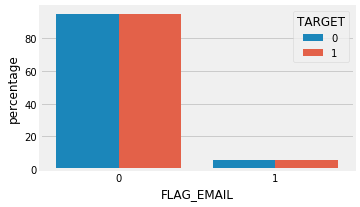

Group summary
    TARGET  FLAG_EMAIL  percentage
0       0           0   94.315955
2       1           0   94.465257
1       0           1    5.684045
3       1           1    5.534743

Statistical summary:
        FLAG_MOBIL_TARGET_0  FLAG_MOBIL_TARGET_1
count        282686.000000         24825.000000
mean              0.056840             0.055347
std               0.231538             0.228662
min               0.000000             0.000000
25%               0.000000             0.000000
50%               0.000000             0.000000
75%               0.000000             0.000000
max               1.000000             1.000000


In [181]:
var_int_cnt = var_int.drop(columns = ['CNT_CHILDREN', 'HOUR_APPR_PROCESS_START', 'DAYS_EMPLOYED', 
                                      'DAYS_BIRTH', 'SK_ID_CURR', 'DAYS_ID_PUBLISH'])
var_names = var_int_cnt.columns
var_n = var_names[6]
print('Integer variable name:', var_n)
# % missing value
print('% missing value', train[var_n].isnull().sum()/len(train[var_n])* 100)
# distribution of variable:
# This is how we have to present the bar plot: using the percentage, not count
var = (var_int_cnt.groupby([var_names[0]])[var_names[6]].value_counts(normalize=True).rename('percentage').
       mul(100).reset_index().sort_values(var_names[6]))
sns.barplot(x="FLAG_EMAIL", y='percentage', hue='TARGET', data=var)
plt.show()
# Statistical summary
target_0_des = train.loc[train['TARGET'] == 0, var_n].describe().rename('FLAG_MOBIL_TARGET_0')
target_1_des = train.loc[train['TARGET'] == 1, var_n].describe().rename('FLAG_MOBIL_TARGET_1')
#print('Target 1:', target_1_des)
print('Group summary\n', var)
print('\nStatistical summary:\n', pd.concat([target_0_des, target_1_des], axis=1))

No difference and we will get rid of it.

In [182]:
train = train.drop(columns=['FLAG_EMAIL'])

Integer variable name: REGION_RATING_CLIENT
% missing value 0.0


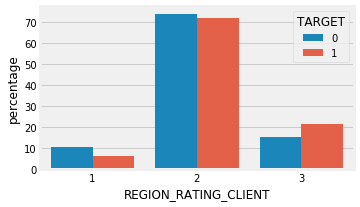

Group summary
    TARGET  REGION_RATING_CLIENT  percentage
2       0                     1   10.840650
5       1                     1    6.251762
0       0                     2   73.960861
3       1                     2   72.132931
1       0                     3   15.198489
4       1                     3   21.615307

Statistical summary:
        REGION_RATING_CLIENT_TARGET_0  REGION_RATING_CLIENT_TARGET_1
count                  282686.000000                   24825.000000
mean                        2.043578                       2.153635
std                         0.508422                       0.505052
min                         1.000000                       1.000000
25%                         2.000000                       2.000000
50%                         2.000000                       2.000000
75%                         2.000000                       2.000000
max                         3.000000                       3.000000


In [183]:
var_int_cnt = var_int.drop(columns = ['CNT_CHILDREN', 'HOUR_APPR_PROCESS_START', 'DAYS_EMPLOYED', 
                                      'DAYS_BIRTH', 'SK_ID_CURR', 'DAYS_ID_PUBLISH'])
var_names = var_int_cnt.columns
var_n = var_names[7]
print('Integer variable name:', var_n)
# % missing value
print('% missing value', train[var_n].isnull().sum()/len(train[var_n])* 100)
# distribution of variable:
# This is how we have to present the bar plot: using the percentage, not count
var = (var_int_cnt.groupby([var_names[0]])[var_names[7]].value_counts(normalize=True).rename('percentage').
       mul(100).reset_index().sort_values(var_names[7]))
sns.barplot(x="REGION_RATING_CLIENT", y='percentage', hue='TARGET', data=var)
plt.show()
# Statistical summary
target_0_des = train.loc[train['TARGET'] == 0, var_n].describe().rename('REGION_RATING_CLIENT_TARGET_0')
target_1_des = train.loc[train['TARGET'] == 1, var_n].describe().rename('REGION_RATING_CLIENT_TARGET_1')
#print('Target 1:', target_1_des)
print('Group summary\n', var)
print('\nStatistical summary:\n', pd.concat([target_0_des, target_1_des], axis=1))

Integer variable name: REGION_RATING_CLIENT_W_CITY
% missing value 0.0


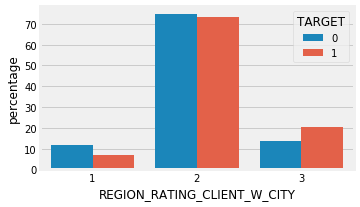

Group summary
    TARGET  REGION_RATING_CLIENT_W_CITY  percentage
2       0                            1   11.501454
5       1                            1    6.662638
0       0                            2   74.752199
3       1                            2   73.192346
1       0                            3   13.746348
4       1                            3   20.145015

Statistical summary:
        FLAG_MOBIL_TARGET_0  FLAG_MOBIL_TARGET_1
count        282686.000000         24825.000000
mean              2.022449             2.134824
std               0.501971             0.499909
min               1.000000             1.000000
25%               2.000000             2.000000
50%               2.000000             2.000000
75%               2.000000             2.000000
max               3.000000             3.000000


In [184]:
var_int_cnt = var_int.drop(columns = ['CNT_CHILDREN', 'HOUR_APPR_PROCESS_START', 'DAYS_EMPLOYED', 
                                      'DAYS_BIRTH', 'SK_ID_CURR', 'DAYS_ID_PUBLISH'])
var_names = var_int_cnt.columns
var_n = var_names[8]
print('Integer variable name:', var_n)
# % missing value
print('% missing value', train[var_n].isnull().sum()/len(train[var_n])* 100)
# distribution of variable:
# This is how we have to present the bar plot: using the percentage, not count
var = (var_int_cnt.groupby([var_names[0]])[var_names[8]].value_counts(normalize=True).rename('percentage').
       mul(100).reset_index().sort_values(var_names[8]))
sns.barplot(x="REGION_RATING_CLIENT_W_CITY", y='percentage', hue='TARGET', data=var)
plt.show()
# Statistical summary
target_0_des = train.loc[train['TARGET'] == 0, var_n].describe().rename('FLAG_MOBIL_TARGET_0')
target_1_des = train.loc[train['TARGET'] == 1, var_n].describe().rename('FLAG_MOBIL_TARGET_1')
#print('Target 1:', target_1_des)
print('Group summary\n', var)
print('\nStatistical summary:\n', pd.concat([target_0_des, target_1_des], axis=1))

Integer variable name: REG_REGION_NOT_LIVE_REGION
% missing value 0.0


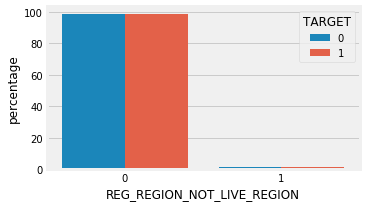

Group summary
    TARGET  REG_REGION_NOT_LIVE_REGION  percentage
0       0                           0   98.505763
2       1                           0   98.255791
1       0                           1    1.494237
3       1                           1    1.744209

Statistical summary:
        REG_REGION_NOT_LIVE_REGION_TARGET_0  \
count                        282686.000000   
mean                              0.014942   
std                               0.121323   
min                               0.000000   
25%                               0.000000   
50%                               0.000000   
75%                               0.000000   
max                               1.000000   

       REG_REGION_NOT_LIVE_REGION_TARGET_1  
count                         24825.000000  
mean                              0.017442  
std                               0.130914  
min                               0.000000  
25%                               0.000000  
50%                        

In [185]:
var_int_cnt = var_int.drop(columns = ['CNT_CHILDREN', 'HOUR_APPR_PROCESS_START', 'DAYS_EMPLOYED', 
                                      'DAYS_BIRTH', 'SK_ID_CURR', 'DAYS_ID_PUBLISH'])
var_names = var_int_cnt.columns
var_n = var_names[9]
print('Integer variable name:', var_n)
# % missing value
print('% missing value', train[var_n].isnull().sum()/len(train[var_n])* 100)
# distribution of variable:
# This is how we have to present the bar plot: using the percentage, not count
var = (var_int_cnt.groupby([var_names[0]])[var_names[9]].value_counts(normalize=True).rename('percentage').
       mul(100).reset_index().sort_values(var_names[9]))
sns.barplot(x="REG_REGION_NOT_LIVE_REGION", y='percentage', hue='TARGET', data=var)
plt.show()
# Statistical summary
target_0_des = train.loc[train['TARGET'] == 0, var_n].describe().rename('REG_REGION_NOT_LIVE_REGION_TARGET_0')
target_1_des = train.loc[train['TARGET'] == 1, var_n].describe().rename('REG_REGION_NOT_LIVE_REGION_TARGET_1')
#print('Target 1:', target_1_des)
print('Group summary\n', var)
print('\nStatistical summary:\n', pd.concat([target_0_des, target_1_des], axis=1))

Not differentiable and we will get rid of it.

In [186]:
#dropping the column
train = train.drop(columns=['REG_REGION_NOT_LIVE_REGION'])

Integer variable name: REG_REGION_NOT_WORK_REGION
% missing value 0.0


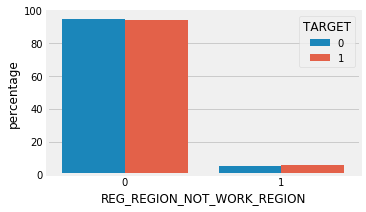

Group summary
    TARGET  REG_REGION_NOT_WORK_REGION  percentage
0       0                           0   94.968269
2       1                           0   94.408862
1       0                           1    5.031731
3       1                           1    5.591138

Statistical summary:
        REG_REGION_NOT_WORK_REGION_TARGET_0  \
count                        282686.000000   
mean                              0.050317   
std                               0.218599   
min                               0.000000   
25%                               0.000000   
50%                               0.000000   
75%                               0.000000   
max                               1.000000   

       REG_REGION_NOT_WORK_REGION_TARGET_1  
count                         24825.000000  
mean                              0.055911  
std                               0.229755  
min                               0.000000  
25%                               0.000000  
50%                        

In [187]:
var_int_cnt = var_int.drop(columns = ['CNT_CHILDREN', 'HOUR_APPR_PROCESS_START', 'DAYS_EMPLOYED', 
                                      'DAYS_BIRTH', 'SK_ID_CURR', 'DAYS_ID_PUBLISH'])
var_names = var_int_cnt.columns
var_n = var_names[10]
print('Integer variable name:', var_n)
# % missing value
print('% missing value', train[var_n].isnull().sum()/len(train[var_n])* 100)
# distribution of variable:
# This is how we have to present the bar plot: using the percentage, not count
var = (var_int_cnt.groupby([var_names[0]])[var_names[10]].value_counts(normalize=True).rename('percentage').
       mul(100).reset_index().sort_values(var_names[10]))
sns.barplot(x="REG_REGION_NOT_WORK_REGION", y='percentage', hue='TARGET', data=var)
plt.show()
# Statistical summary
target_0_des = train.loc[train['TARGET'] == 0, var_n].describe().rename('REG_REGION_NOT_WORK_REGION_TARGET_0')
target_1_des = train.loc[train['TARGET'] == 1, var_n].describe().rename('REG_REGION_NOT_WORK_REGION_TARGET_1')
#print('Target 1:', target_1_des)
print('Group summary\n', var)
print('\nStatistical summary:\n', pd.concat([target_0_des, target_1_des], axis=1))

Not important variable

In [188]:
train = train.drop(columns=['REG_REGION_NOT_WORK_REGION'])

Integer variable name: LIVE_REGION_NOT_WORK_REGION
% missing value 0.0


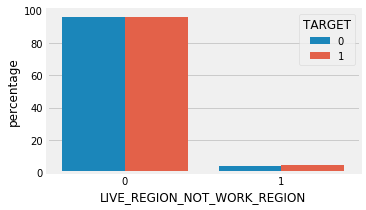

Group summary
    TARGET  LIVE_REGION_NOT_WORK_REGION  percentage
0       0                            0   95.950631
2       1                            0   95.746224
1       0                            1    4.049369
3       1                            1    4.253776

Statistical summary:
        LIVE_REGION_NOT_WORK_REGION_TARGET_0  \
count                         282686.000000   
mean                               0.040494   
std                                0.197114   
min                                0.000000   
25%                                0.000000   
50%                                0.000000   
75%                                0.000000   
max                                1.000000   

       LIVE_REGION_NOT_WORK_REGION_TARGET_1  
count                          24825.000000  
mean                               0.042538  
std                                0.201817  
min                                0.000000  
25%                                0.000000  
50%    

In [189]:
var_int_cnt = var_int.drop(columns = ['CNT_CHILDREN', 'HOUR_APPR_PROCESS_START', 'DAYS_EMPLOYED', 
                                      'DAYS_BIRTH', 'SK_ID_CURR', 'DAYS_ID_PUBLISH'])
var_names = var_int_cnt.columns
var_n = var_names[11]
print('Integer variable name:', var_n)
# % missing value
print('% missing value', train[var_n].isnull().sum()/len(train[var_n])* 100)
# distribution of variable:
# This is how we have to present the bar plot: using the percentage, not count
var = (var_int_cnt.groupby([var_names[0]])[var_names[11]].value_counts(normalize=True).rename('percentage').
       mul(100).reset_index().sort_values(var_names[11]))
sns.barplot(x="LIVE_REGION_NOT_WORK_REGION", y='percentage', hue='TARGET', data=var)
plt.show()
# Statistical summary
target_0_des = train.loc[train['TARGET'] == 0, var_n].describe().rename('LIVE_REGION_NOT_WORK_REGION_TARGET_0')
target_1_des = train.loc[train['TARGET'] == 1, var_n].describe().rename('LIVE_REGION_NOT_WORK_REGION_TARGET_1')
#print('Target 1:', target_1_des)
print('Group summary\n', var)
print('\nStatistical summary:\n', pd.concat([target_0_des, target_1_des], axis=1))

In [190]:
#dropping the column
train = train.drop(columns=['LIVE_REGION_NOT_WORK_REGION'])

Integer variable name: REG_CITY_NOT_LIVE_CITY
% missing value 0.0


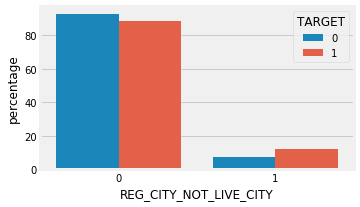

,REG_CITY_NOT_LIVE_CITY_TARGET_0,REG_CITY_NOT_LIVE_CITY_TARGET_1
count,282686.000000,24825.000000
mean,0.074641,0.118389
std,0.262812,0.323074
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.000000,1.000000


In [191]:
var_int_cnt = var_int.drop(columns = ['CNT_CHILDREN', 'HOUR_APPR_PROCESS_START', 'DAYS_EMPLOYED', 
                                      'DAYS_BIRTH', 'SK_ID_CURR', 'DAYS_ID_PUBLISH'])
var_names = var_int_cnt.columns
var_n = var_names[12]
print('Integer variable name:', var_n)
# % missing value
print('% missing value', train[var_n].isnull().sum()/len(train[var_n])* 100)
# distribution of variable:
# This is how we have to present the bar plot: using the percentage, not count
var = (var_int_cnt.groupby([var_names[0]])[var_names[12]].value_counts(normalize=True).rename('percentage').
       mul(100).reset_index().sort_values(var_names[12]))
sns.barplot(x="REG_CITY_NOT_LIVE_CITY", y='percentage', hue='TARGET', data=var)
plt.show()
# Statistical summary
target_0_des = train.loc[train['TARGET'] == 0, var_n].describe().rename('REG_CITY_NOT_LIVE_CITY_TARGET_0')
target_1_des = train.loc[train['TARGET'] == 1, var_n].describe().rename('REG_CITY_NOT_LIVE_CITY_TARGET_1')
#print('Target 1:', target_1_des)
pd.concat([target_0_des, target_1_des], axis=1)

Integer variable name: REG_CITY_NOT_WORK_CITY
% missing value 0.0


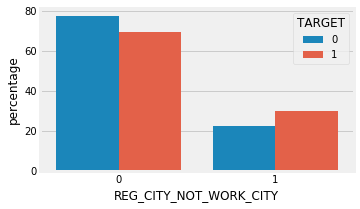

Group summary
    TARGET  REG_CITY_NOT_WORK_CITY  percentage
0       0                       0   77.591037
2       1                       0   69.707956
1       0                       1   22.408963
3       1                       1   30.292044

Statistical summary:
        REG_CITY_NOT_WORK_CITY_TARGET_0  REG_CITY_NOT_WORK_CITY_TARGET_1
count                    282686.000000                      24825.00000
mean                          0.224090                          0.30292
std                           0.416982                          0.45953
min                           0.000000                          0.00000
25%                           0.000000                          0.00000
50%                           0.000000                          0.00000
75%                           0.000000                          1.00000
max                           1.000000                          1.00000


In [192]:
var_int_cnt = var_int.drop(columns = ['CNT_CHILDREN', 'HOUR_APPR_PROCESS_START', 'DAYS_EMPLOYED', 
                                      'DAYS_BIRTH', 'SK_ID_CURR', 'DAYS_ID_PUBLISH'])
var_names = var_int_cnt.columns
var_n = var_names[13]
print('Integer variable name:', var_n)
# % missing value
print('% missing value', train[var_n].isnull().sum()/len(train[var_n])* 100)
# distribution of variable:
# This is how we have to present the bar plot: using the percentage, not count
var = (var_int_cnt.groupby([var_names[0]])[var_names[13]].value_counts(normalize=True).rename('percentage').
       mul(100).reset_index().sort_values(var_names[13]))
sns.barplot(x="REG_CITY_NOT_WORK_CITY", y='percentage', hue='TARGET', data=var)
plt.show()
# Statistical summary
target_0_des = train.loc[train['TARGET'] == 0, var_n].describe().rename('REG_CITY_NOT_WORK_CITY_TARGET_0')
target_1_des = train.loc[train['TARGET'] == 1, var_n].describe().rename('REG_CITY_NOT_WORK_CITY_TARGET_1')
#print('Target 1:', target_1_des)
print('Group summary\n', var)
print('\nStatistical summary:\n', pd.concat([target_0_des, target_1_des], axis=1))

Integer variable name: LIVE_CITY_NOT_WORK_CITY
% missing value 0.0


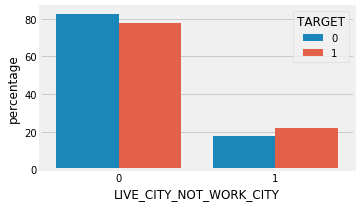

Group summary
    TARGET  LIVE_CITY_NOT_WORK_CITY  percentage
0       0                        0    82.41441
2       1                        0    77.83283
1       0                        1    17.58559
3       1                        1    22.16717

Statistical summary:
        LIVE_CITY_NOT_WORK_CITY_TARGET_0  LIVE_CITY_NOT_WORK_CITY_TARGET_1
count                     282686.000000                      24825.000000
mean                           0.175856                          0.221672
std                            0.380698                          0.415380
min                            0.000000                          0.000000
25%                            0.000000                          0.000000
50%                            0.000000                          0.000000
75%                            0.000000                          0.000000
max                            1.000000                          1.000000


In [193]:
var_int_cnt = var_int.drop(columns = ['CNT_CHILDREN', 'HOUR_APPR_PROCESS_START', 'DAYS_EMPLOYED', 
                                      'DAYS_BIRTH', 'SK_ID_CURR', 'DAYS_ID_PUBLISH'])
var_names = var_int_cnt.columns
var_n = var_names[14]
print('Integer variable name:', var_n)
# % missing value
print('% missing value', train[var_n].isnull().sum()/len(train[var_n])* 100)
# distribution of variable:
# This is how we have to present the bar plot: using the percentage, not count
var = (var_int_cnt.groupby([var_names[0]])[var_names[14]].value_counts(normalize=True).rename('percentage').
       mul(100).reset_index().sort_values(var_names[14]))
sns.barplot(x="LIVE_CITY_NOT_WORK_CITY", y='percentage', hue='TARGET', data=var)
plt.show()
# Statistical summary
target_0_des = train.loc[train['TARGET'] == 0, var_n].describe().rename('LIVE_CITY_NOT_WORK_CITY_TARGET_0')
target_1_des = train.loc[train['TARGET'] == 1, var_n].describe().rename('LIVE_CITY_NOT_WORK_CITY_TARGET_1')
#print('Target 1:', target_1_des)
print('Group summary\n', var)
print('\nStatistical summary:\n', pd.concat([target_0_des, target_1_des], axis=1))

Integer variable name: FLAG_DOCUMENT_2
% missing value 0.0


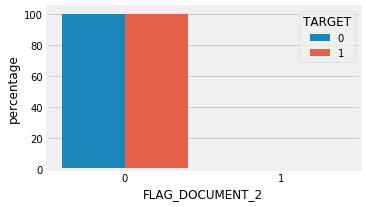

Group summary
    TARGET  FLAG_DOCUMENT_2  percentage
0       0                0   99.996816
2       1                0   99.983887
1       0                1    0.003184
3       1                1    0.016113

Statistical summary:
        FLAG_DOCUMENT_2_TARGET_0  FLAG_DOCUMENT_2_TARGET_1
count             282686.000000              24825.000000
mean                   0.000032                  0.000161
std                    0.005642                  0.012693
min                    0.000000                  0.000000
25%                    0.000000                  0.000000
50%                    0.000000                  0.000000
75%                    0.000000                  0.000000
max                    1.000000                  1.000000


In [194]:
var_int_cnt = var_int.drop(columns = ['CNT_CHILDREN', 'HOUR_APPR_PROCESS_START', 'DAYS_EMPLOYED', 
                                      'DAYS_BIRTH', 'SK_ID_CURR', 'DAYS_ID_PUBLISH'])
var_names = var_int_cnt.columns
var_n = var_names[15]
print('Integer variable name:', var_n)
# % missing value
print('% missing value', train[var_n].isnull().sum()/len(train[var_n])* 100)
# distribution of variable:
# This is how we have to present the bar plot: using the percentage, not count
var = (var_int_cnt.groupby([var_names[0]])[var_names[15]].value_counts(normalize=True).rename('percentage').
       mul(100).reset_index().sort_values(var_names[15]))
sns.barplot(x="FLAG_DOCUMENT_2", y='percentage', hue='TARGET', data=var)
plt.show()
# Statistical summary
target_0_des = train.loc[train['TARGET'] == 0, var_n].describe().rename('FLAG_DOCUMENT_2_TARGET_0')
target_1_des = train.loc[train['TARGET'] == 1, var_n].describe().rename('FLAG_DOCUMENT_2_TARGET_1')
#print('Target 1:', target_1_des)
print('Group summary\n', var)
print('\nStatistical summary:\n', pd.concat([target_0_des, target_1_des], axis=1))

All documents are flagegd as '0'. Get rid of it

In [195]:
#dropping the column
train = train.drop(columns=['FLAG_DOCUMENT_2'])

Integer variable name: FLAG_DOCUMENT_3
% missing value 0.0


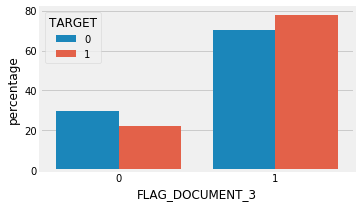

Group summary
    TARGET  FLAG_DOCUMENT_3  percentage
1       0                0   29.593966
3       1                0   22.207452
0       0                1   70.406034
2       1                1   77.792548

Statistical summary:
        FLAG_DOCUMENT_3_TARGET_0 FLAG_DOCUMENT_3_TARGET_1
count                    282686                    24825
unique                        2                        2
top                        True                     True
freq                     199028                    19312


In [196]:
var_int_cnt = var_int.drop(columns = ['CNT_CHILDREN', 'HOUR_APPR_PROCESS_START', 'DAYS_EMPLOYED', 
                                      'DAYS_BIRTH', 'SK_ID_CURR', 'DAYS_ID_PUBLISH'])
var_names = var_int_cnt.columns
var_n = var_names[16]
print('Integer variable name:', var_n)
# % missing value
print('% missing value', train[var_n].isnull().sum()/len(train[var_n])* 100)
# distribution of variable:
# This is how we have to present the bar plot: using the percentage, not count
var = (var_int_cnt.groupby([var_names[0]])[var_names[16]].value_counts(normalize=True).rename('percentage').
       mul(100).reset_index().sort_values(var_names[16]))
sns.barplot(x="FLAG_DOCUMENT_3", y='percentage', hue='TARGET', data=var)
plt.show()
# Statistical summary
target_0_des = train.loc[train['TARGET'] == 0, var_n].describe().rename('FLAG_DOCUMENT_3_TARGET_0')
target_1_des = train.loc[train['TARGET'] == 1, var_n].describe().rename('FLAG_DOCUMENT_3_TARGET_1')
#print('Target 1:', target_1_des)
print('Group summary\n', var)
print('\nStatistical summary:\n', pd.concat([target_0_des, target_1_des], axis=1))

Integer variable name: FLAG_DOCUMENT_4
% missing value 0.0


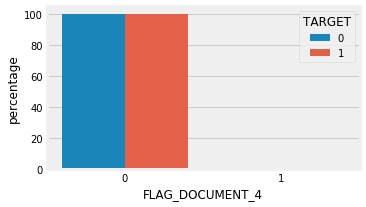

Group summary
    TARGET  FLAG_DOCUMENT_4  percentage
0       0                0   99.991156
2       1                0  100.000000
1       0                1    0.008844

Statistical summary:
        FLAG_DOCUMENT_4_TARGET_0  FLAG_DOCUMENT_4_TARGET_1
count             282686.000000                   24825.0
mean                   0.000088                       0.0
std                    0.009404                       0.0
min                    0.000000                       0.0
25%                    0.000000                       0.0
50%                    0.000000                       0.0
75%                    0.000000                       0.0
max                    1.000000                       0.0


In [197]:
var_int_cnt = var_int.drop(columns = ['CNT_CHILDREN', 'HOUR_APPR_PROCESS_START', 'DAYS_EMPLOYED', 
                                      'DAYS_BIRTH', 'SK_ID_CURR', 'DAYS_ID_PUBLISH'])
var_names = var_int_cnt.columns
var_n = var_names[17]
print('Integer variable name:', var_n)
# % missing value
print('% missing value', train[var_n].isnull().sum()/len(train[var_n])* 100)
# distribution of variable:
# This is how we have to present the bar plot: using the percentage, not count
var = (var_int_cnt.groupby([var_names[0]])[var_names[17]].value_counts(normalize=True).rename('percentage').
       mul(100).reset_index().sort_values(var_names[17]))
sns.barplot(x="FLAG_DOCUMENT_4", y='percentage', hue='TARGET', data=var)
plt.show()
# Statistical summary
target_0_des = train.loc[train['TARGET'] == 0, var_n].describe().rename('FLAG_DOCUMENT_4_TARGET_0')
target_1_des = train.loc[train['TARGET'] == 1, var_n].describe().rename('FLAG_DOCUMENT_4_TARGET_1')
#print('Target 1:', target_1_des)
print('Group summary\n', var)
print('\nStatistical summary:\n', pd.concat([target_0_des, target_1_des], axis=1))

All docs are flagged as 0, not useful variable,

In [198]:
#dropping the column
train = train.drop(columns=['FLAG_DOCUMENT_4'])

Integer variable name: FLAG_DOCUMENT_5
% missing value 0.0


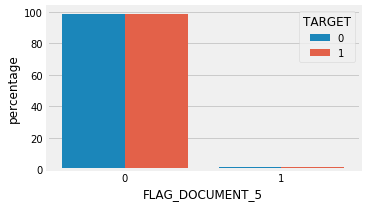

Group summary
    TARGET  FLAG_DOCUMENT_5  percentage
0       0                0   98.487368
2       1                0   98.501511
1       0                1    1.512632
3       1                1    1.498489

Statistical summary:
        FLAG_DOCUMENT_5_TARGET_0  FLAG_DOCUMENT_5_TARGET_1
count             282686.000000              24825.000000
mean                   0.015126                  0.014985
std                    0.122056                  0.121495
min                    0.000000                  0.000000
25%                    0.000000                  0.000000
50%                    0.000000                  0.000000
75%                    0.000000                  0.000000
max                    1.000000                  1.000000


In [199]:
var_int_cnt = var_int.drop(columns = ['CNT_CHILDREN', 'HOUR_APPR_PROCESS_START', 'DAYS_EMPLOYED', 
                                      'DAYS_BIRTH', 'SK_ID_CURR', 'DAYS_ID_PUBLISH'])
var_names = var_int_cnt.columns
var_n = var_names[18]
print('Integer variable name:', var_n)
# % missing value
print('% missing value', train[var_n].isnull().sum()/len(train[var_n])* 100)
# distribution of variable:
# This is how we have to present the bar plot: using the percentage, not count
var = (var_int_cnt.groupby([var_names[0]])[var_names[18]].value_counts(normalize=True).rename('percentage').
       mul(100).reset_index().sort_values(var_names[18]))
sns.barplot(x="FLAG_DOCUMENT_5", y='percentage', hue='TARGET', data=var)
plt.show()
# Statistical summary
target_0_des = train.loc[train['TARGET'] == 0, var_n].describe().rename('FLAG_DOCUMENT_5_TARGET_0')
target_1_des = train.loc[train['TARGET'] == 1, var_n].describe().rename('FLAG_DOCUMENT_5_TARGET_1')
#print('Target 1:', target_1_des)
print('Group summary\n', var)
print('\nStatistical summary:\n', pd.concat([target_0_des, target_1_des], axis=1))

In [200]:
#dropping the column
train = train.drop(columns=['FLAG_DOCUMENT_5'])


Integer variable name: FLAG_DOCUMENT_6
% missing value 0.0


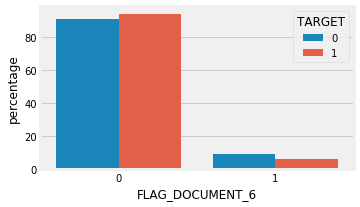

Group summary
    TARGET  FLAG_DOCUMENT_6  percentage
0       0                0   90.954274
2       1                0   93.929507
1       0                1    9.045726
3       1                1    6.070493

Statistical summary:
        FLAG_DOCUMENT_6_TARGET_0  FLAG_DOCUMENT_6_TARGET_1
count             282686.000000              24825.000000
mean                   0.090457                  0.060705
std                    0.286836                  0.238793
min                    0.000000                  0.000000
25%                    0.000000                  0.000000
50%                    0.000000                  0.000000
75%                    0.000000                  0.000000
max                    1.000000                  1.000000


In [201]:
var_int_cnt = var_int.drop(columns = ['CNT_CHILDREN', 'HOUR_APPR_PROCESS_START', 'DAYS_EMPLOYED', 
                                      'DAYS_BIRTH', 'SK_ID_CURR', 'DAYS_ID_PUBLISH'])
var_names = var_int_cnt.columns
var_n = var_names[19]
print('Integer variable name:', var_n)
# % missing value
print('% missing value', train[var_n].isnull().sum()/len(train[var_n])* 100)
# distribution of variable:
# This is how we have to present the bar plot: using the percentage, not count
var = (var_int_cnt.groupby([var_names[0]])[var_names[19]].value_counts(normalize=True).rename('percentage').
       mul(100).reset_index().sort_values(var_names[19]))
sns.barplot(x="FLAG_DOCUMENT_6", y='percentage', hue='TARGET', data=var)
plt.show()
# Statistical summary
target_0_des = train.loc[train['TARGET'] == 0, var_n].describe().rename('FLAG_DOCUMENT_6_TARGET_0')
target_1_des = train.loc[train['TARGET'] == 1, var_n].describe().rename('FLAG_DOCUMENT_6_TARGET_1')
#print('Target 1:', target_1_des)
print('Group summary\n', var)
print('\nStatistical summary:\n', pd.concat([target_0_des, target_1_des], axis=1))

Integer variable name: FLAG_DOCUMENT_7
% missing value 0.0


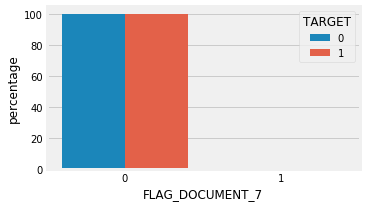

Group summary
    TARGET  FLAG_DOCUMENT_7  percentage
0       0                0   99.980190
2       1                0   99.987915
1       0                1    0.019810
3       1                1    0.012085

Statistical summary:
        FLAG_DOCUMENT_7_TARGET_0  FLAG_DOCUMENT_7_TARGET_1
count             282686.000000              24825.000000
mean                   0.000198                  0.000121
std                    0.014073                  0.010993
min                    0.000000                  0.000000
25%                    0.000000                  0.000000
50%                    0.000000                  0.000000
75%                    0.000000                  0.000000
max                    1.000000                  1.000000


In [202]:
var_int_cnt = var_int.drop(columns = ['CNT_CHILDREN', 'HOUR_APPR_PROCESS_START', 'DAYS_EMPLOYED', 
                                      'DAYS_BIRTH', 'SK_ID_CURR', 'DAYS_ID_PUBLISH'])
var_names = var_int_cnt.columns
var_n = var_names[20]
print('Integer variable name:', var_n)
# % missing value
print('% missing value', train[var_n].isnull().sum()/len(train[var_n])* 100)
# distribution of variable:
# This is how we have to present the bar plot: using the percentage, not count
var = (var_int_cnt.groupby([var_names[0]])[var_names[20]].value_counts(normalize=True).rename('percentage').
       mul(100).reset_index().sort_values(var_names[20]))
sns.barplot(x="FLAG_DOCUMENT_7", y='percentage', hue='TARGET', data=var)
plt.show()
# Statistical summary
target_0_des = train.loc[train['TARGET'] == 0, var_n].describe().rename('FLAG_DOCUMENT_7_TARGET_0')
target_1_des = train.loc[train['TARGET'] == 1, var_n].describe().rename('FLAG_DOCUMENT_7_TARGET_1')
#print('Target 1:', target_1_des)
print('Group summary\n', var)
print('\nStatistical summary:\n', pd.concat([target_0_des, target_1_des], axis=1))

In [203]:
#dropping the column
train = train.drop(columns=['FLAG_DOCUMENT_7'])

Integer variable name: FLAG_DOCUMENT_8
% missing value 0.0


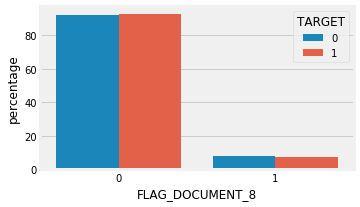

Group summary
    TARGET  FLAG_DOCUMENT_8  percentage
0       0                0   91.797259
2       1                0   92.604230
1       0                1    8.202741
3       1                1    7.395770

Statistical summary:
        FLAG_DOCUMENT_8_TARGET_0  FLAG_DOCUMENT_8_TARGET_1
count             282686.000000              24825.000000
mean                   0.082027                  0.073958
std                    0.274407                  0.261707
min                    0.000000                  0.000000
25%                    0.000000                  0.000000
50%                    0.000000                  0.000000
75%                    0.000000                  0.000000
max                    1.000000                  1.000000


In [204]:
var_int_cnt = var_int.drop(columns = ['CNT_CHILDREN', 'HOUR_APPR_PROCESS_START', 'DAYS_EMPLOYED', 
                                      'DAYS_BIRTH', 'SK_ID_CURR', 'DAYS_ID_PUBLISH'])
var_names = var_int_cnt.columns
var_n = var_names[21]
print('Integer variable name:', var_n)
# % missing value
print('% missing value', train[var_n].isnull().sum()/len(train[var_n])* 100)
# distribution of variable:
# This is how we have to present the bar plot: using the percentage, not count
var = (var_int_cnt.groupby([var_names[0]])[var_names[21]].value_counts(normalize=True).rename('percentage').
       mul(100).reset_index().sort_values(var_names[21]))
sns.barplot(x="FLAG_DOCUMENT_8", y='percentage', hue='TARGET', data=var)
plt.show()
# Statistical summary
target_0_des = train.loc[train['TARGET'] == 0, var_n].describe().rename('FLAG_DOCUMENT_8_TARGET_0')
target_1_des = train.loc[train['TARGET'] == 1, var_n].describe().rename('FLAG_DOCUMENT_8_TARGET_1')
#print('Target 1:', target_1_des)
print('Group summary\n', var)
print('\nStatistical summary:\n', pd.concat([target_0_des, target_1_des], axis=1))

Integer variable name: FLAG_DOCUMENT_9
% missing value 0.0


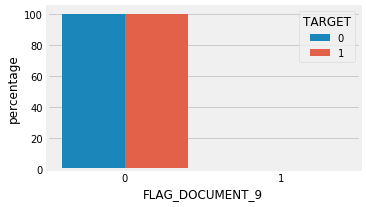

Group summary
    TARGET  FLAG_DOCUMENT_9  percentage
0       0                0   99.602386
2       1                0   99.701913
1       0                1    0.397614
3       1                1    0.298087

Statistical summary
        FLAG_DOCUMENT_9_TARGET_0  FLAG_DOCUMENT_9_TARGET_1
count             282686.000000              24825.000000
mean                   0.003976                  0.002981
std                    0.062931                  0.054517
min                    0.000000                  0.000000
25%                    0.000000                  0.000000
50%                    0.000000                  0.000000
75%                    0.000000                  0.000000
max                    1.000000                  1.000000


In [205]:
var_int_cnt = var_int.drop(columns = ['CNT_CHILDREN', 'HOUR_APPR_PROCESS_START', 'DAYS_EMPLOYED', 
                                      'DAYS_BIRTH', 'SK_ID_CURR', 'DAYS_ID_PUBLISH'])
var_names = var_int_cnt.columns
var_n = var_names[22]
print('Integer variable name:', var_n)
# % missing value
print('% missing value', train[var_n].isnull().sum()/len(train[var_n])* 100)
# distribution of variable:
# This is how we have to present the bar plot: using the percentage, not count
var = (var_int_cnt.groupby([var_names[0]])[var_names[22]].value_counts(normalize=True).rename('percentage').
       mul(100).reset_index().sort_values(var_names[22]))
sns.barplot(x="FLAG_DOCUMENT_9", y='percentage', hue='TARGET', data=var)
plt.show()
# Statistical summary
target_0_des = train.loc[train['TARGET'] == 0, var_n].describe().rename('FLAG_DOCUMENT_9_TARGET_0')
target_1_des = train.loc[train['TARGET'] == 1, var_n].describe().rename('FLAG_DOCUMENT_9_TARGET_1')
#print('Target 1:', target_1_des)
print('Group summary\n', var)
print('\nStatistical summary\n', pd.concat([target_0_des, target_1_des], axis=1))

In [206]:
#dropping the column
train = train.drop(columns=['FLAG_DOCUMENT_9'])

Integer variable name: FLAG_DOCUMENT_10
% missing value 0.0


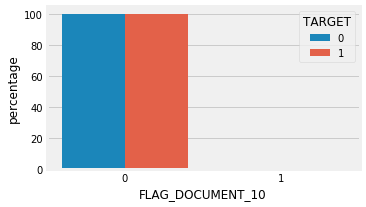

Group summary
    TARGET  FLAG_DOCUMENT_10  percentage
0       0                 0   99.997524
2       1                 0  100.000000
1       0                 1    0.002476

Statistical summary
        FLAG_DOCUMENT_10_TARGET_0  FLAG_DOCUMENT_10_TARGET_1
count              282686.000000                    24825.0
mean                    0.000025                        0.0
std                     0.004976                        0.0
min                     0.000000                        0.0
25%                     0.000000                        0.0
50%                     0.000000                        0.0
75%                     0.000000                        0.0
max                     1.000000                        0.0


In [207]:
var_int_cnt = var_int.drop(columns = ['CNT_CHILDREN', 'HOUR_APPR_PROCESS_START', 'DAYS_EMPLOYED', 
                                      'DAYS_BIRTH', 'SK_ID_CURR', 'DAYS_ID_PUBLISH'])
var_names = var_int_cnt.columns
var_n = var_names[23]
print('Integer variable name:', var_n)
# % missing value
print('% missing value', train[var_n].isnull().sum()/len(train[var_n])* 100)
# distribution of variable:
# This is how we have to present the bar plot: using the percentage, not count
var = (var_int_cnt.groupby([var_names[0]])[var_names[23]].value_counts(normalize=True).rename('percentage').
       mul(100).reset_index().sort_values(var_names[23]))
sns.barplot(x="FLAG_DOCUMENT_10", y='percentage', hue='TARGET', data=var)
plt.show()
# Statistical summary
target_0_des = train.loc[train['TARGET'] == 0, var_n].describe().rename('FLAG_DOCUMENT_10_TARGET_0')
target_1_des = train.loc[train['TARGET'] == 1, var_n].describe().rename('FLAG_DOCUMENT_10_TARGET_1')
#print('Target 1:', target_1_des)
print('Group summary\n', var)
print('\nStatistical summary\n', pd.concat([target_0_des, target_1_des], axis=1))

In [208]:
#dropping the column
train = train.drop(columns=['FLAG_DOCUMENT_10'])

Integer variable name: FLAG_DOCUMENT_11
% missing value 0.0


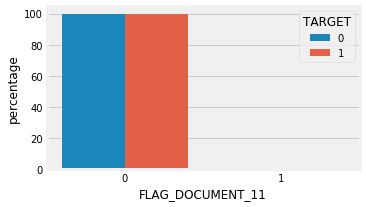

Group summary
    TARGET  FLAG_DOCUMENT_11  percentage
0       0                 0   99.600971
2       1                 0   99.697885
1       0                 1    0.399029
3       1                 1    0.302115

Statistical summary
        FLAG_DOCUMENT_11_TARGET_0  FLAG_DOCUMENT_11_TARGET_1
count              282686.000000               24825.000000
mean                    0.003990                   0.003021
std                     0.063043                   0.054883
min                     0.000000                   0.000000
25%                     0.000000                   0.000000
50%                     0.000000                   0.000000
75%                     0.000000                   0.000000
max                     1.000000                   1.000000


In [209]:
var_int_cnt = var_int.drop(columns = ['CNT_CHILDREN', 'HOUR_APPR_PROCESS_START', 'DAYS_EMPLOYED', 
                                      'DAYS_BIRTH', 'SK_ID_CURR', 'DAYS_ID_PUBLISH'])
var_names = var_int_cnt.columns
var_n = var_names[24]
print('Integer variable name:', var_n)
# % missing value
print('% missing value', train[var_n].isnull().sum()/len(train[var_n])* 100)
# distribution of variable:
# This is how we have to present the bar plot: using the percentage, not count
var = (var_int_cnt.groupby([var_names[0]])[var_names[24]].value_counts(normalize=True).rename('percentage').
       mul(100).reset_index().sort_values(var_names[24]))
sns.barplot(x="FLAG_DOCUMENT_11", y='percentage', hue='TARGET', data=var)
plt.show()
# Statistical summary
target_0_des = train.loc[train['TARGET'] == 0, var_n].describe().rename('FLAG_DOCUMENT_11_TARGET_0')
target_1_des = train.loc[train['TARGET'] == 1, var_n].describe().rename('FLAG_DOCUMENT_11_TARGET_1')
#print('Target 1:', target_1_des)
print('Group summary\n', var)
print('\nStatistical summary\n', pd.concat([target_0_des, target_1_des], axis=1))

In [210]:
#dropping the column
train = train.drop(columns=['FLAG_DOCUMENT_11'])

Integer variable name: FLAG_DOCUMENT_12
% missing value 0.0


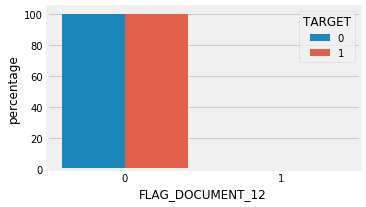

Group summary
    TARGET  FLAG_DOCUMENT_12  percentage
0       0                 0   99.999293
2       1                 0  100.000000
1       0                 1    0.000707

Statistical summary
        FLAG_DOCUMENT_12_TARGET_0  FLAG_DOCUMENT_12_TARGET_1
count              282686.000000                    24825.0
mean                    0.000007                        0.0
std                     0.002660                        0.0
min                     0.000000                        0.0
25%                     0.000000                        0.0
50%                     0.000000                        0.0
75%                     0.000000                        0.0
max                     1.000000                        0.0


In [211]:
var_int_cnt = var_int.drop(columns = ['CNT_CHILDREN', 'HOUR_APPR_PROCESS_START', 'DAYS_EMPLOYED', 
                                      'DAYS_BIRTH', 'SK_ID_CURR', 'DAYS_ID_PUBLISH'])
var_names = var_int_cnt.columns
var_n = var_names[25]
print('Integer variable name:', var_n)
# % missing value
print('% missing value', train[var_n].isnull().sum()/len(train[var_n])* 100)
# distribution of variable:
# This is how we have to present the bar plot: using the percentage, not count
var = (var_int_cnt.groupby([var_names[0]])[var_names[25]].value_counts(normalize=True).rename('percentage').
       mul(100).reset_index().sort_values(var_names[25]))
sns.barplot(x="FLAG_DOCUMENT_12", y='percentage', hue='TARGET', data=var)
plt.show()
# Statistical summary
target_0_des = train.loc[train['TARGET'] == 0, var_n].describe().rename('FLAG_DOCUMENT_12_TARGET_0')
target_1_des = train.loc[train['TARGET'] == 1, var_n].describe().rename('FLAG_DOCUMENT_12_TARGET_1')
#print('Target 1:', target_1_des)
print('Group summary\n', var)
print('\nStatistical summary\n', pd.concat([target_0_des, target_1_des], axis=1))

In [212]:
#dropping the column
train = train.drop(columns=['FLAG_DOCUMENT_12'])


Integer variable name: FLAG_DOCUMENT_13
% missing value 0.0


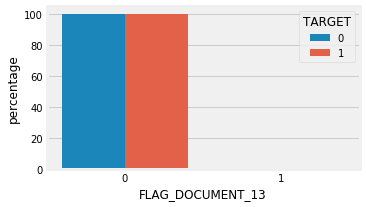

Group summary
    TARGET  FLAG_DOCUMENT_13  percentage
0       0                 0   99.627148
2       1                 0   99.879154
1       0                 1    0.372852
3       1                 1    0.120846

Statistical summary
        FLAG_DOCUMENT_13_TARGET_0  FLAG_DOCUMENT_13_TARGET_1
count              282686.000000               24825.000000
mean                    0.003729                   0.001208
std                     0.060948                   0.034743
min                     0.000000                   0.000000
25%                     0.000000                   0.000000
50%                     0.000000                   0.000000
75%                     0.000000                   0.000000
max                     1.000000                   1.000000


In [213]:
var_int_cnt = var_int.drop(columns = ['CNT_CHILDREN', 'HOUR_APPR_PROCESS_START', 'DAYS_EMPLOYED', 
                                      'DAYS_BIRTH', 'SK_ID_CURR', 'DAYS_ID_PUBLISH'])
var_names = var_int_cnt.columns
var_n = var_names[26]
print('Integer variable name:', var_n)
# % missing value
print('% missing value', train[var_n].isnull().sum()/len(train[var_n])* 100)
# distribution of variable:
# This is how we have to present the bar plot: using the percentage, not count
var = (var_int_cnt.groupby([var_names[0]])[var_names[26]].value_counts(normalize=True).rename('percentage').
       mul(100).reset_index().sort_values(var_names[26]))
sns.barplot(x="FLAG_DOCUMENT_13", y='percentage', hue='TARGET', data=var)
plt.show()
# Statistical summary
target_0_des = train.loc[train['TARGET'] == 0, var_n].describe().rename('FLAG_DOCUMENT_13_TARGET_0')
target_1_des = train.loc[train['TARGET'] == 1, var_n].describe().rename('FLAG_DOCUMENT_13_TARGET_1')
#print('Target 1:', target_1_des)
print('Group summary\n', var)
print('\nStatistical summary\n', pd.concat([target_0_des, target_1_des], axis=1))

In [214]:
#dropping the column
train = train.drop(columns=['FLAG_DOCUMENT_13'])


Integer variable name: FLAG_DOCUMENT_14
% missing value 0.0


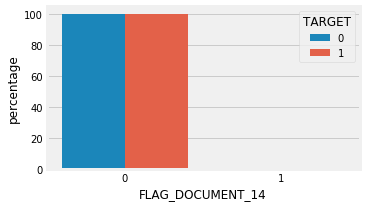

Group summary
    TARGET  FLAG_DOCUMENT_14  percentage
0       0                 0   99.691177
2       1                 0   99.879154
1       0                 1    0.308823
3       1                 1    0.120846

Statistical summary
        FLAG_DOCUMENT_14_TARGET_0  FLAG_DOCUMENT_14_TARGET_1
count              282686.000000               24825.000000
mean                    0.003088                   0.001208
std                     0.055486                   0.034743
min                     0.000000                   0.000000
25%                     0.000000                   0.000000
50%                     0.000000                   0.000000
75%                     0.000000                   0.000000
max                     1.000000                   1.000000


In [215]:
var_int_cnt = var_int.drop(columns = ['CNT_CHILDREN', 'HOUR_APPR_PROCESS_START', 'DAYS_EMPLOYED', 
                                      'DAYS_BIRTH', 'SK_ID_CURR', 'DAYS_ID_PUBLISH'])
var_names = var_int_cnt.columns
var_n = var_names[27]
print('Integer variable name:', var_n)
# % missing value
print('% missing value', train[var_n].isnull().sum()/len(train[var_n])* 100)
# distribution of variable:
# This is how we have to present the bar plot: using the percentage, not count
var = (var_int_cnt.groupby([var_names[0]])[var_names[27]].value_counts(normalize=True).rename('percentage').
       mul(100).reset_index().sort_values(var_names[27]))
sns.barplot(x="FLAG_DOCUMENT_14", y='percentage', hue='TARGET', data=var)
plt.show()
# Statistical summary
target_0_des = train.loc[train['TARGET'] == 0, var_n].describe().rename('FLAG_DOCUMENT_14_TARGET_0')
target_1_des = train.loc[train['TARGET'] == 1, var_n].describe().rename('FLAG_DOCUMENT_14_TARGET_1')
#print('Target 1:', target_1_des)
print('Group summary\n', var)
print('\nStatistical summary\n', pd.concat([target_0_des, target_1_des], axis=1))

In [216]:
#dropping the column
train = train.drop(columns=['FLAG_DOCUMENT_14'])


Integer variable name: FLAG_DOCUMENT_15
% missing value 0.0


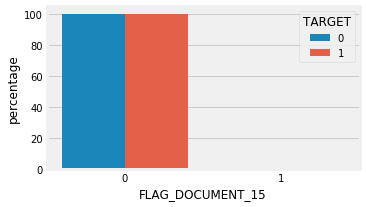

Group summary
    TARGET  FLAG_DOCUMENT_15  percentage
0       0                 0   99.872296
2       1                 0   99.955690
1       0                 1    0.127704
3       1                 1    0.044310

Statistical summary
        FLAG_DOCUMENT_15_TARGET_0  FLAG_DOCUMENT_15_TARGET_1
count              282686.000000               24825.000000
mean                    0.001277                   0.000443
std                     0.035713                   0.021046
min                     0.000000                   0.000000
25%                     0.000000                   0.000000
50%                     0.000000                   0.000000
75%                     0.000000                   0.000000
max                     1.000000                   1.000000


In [217]:
var_int_cnt = var_int.drop(columns = ['CNT_CHILDREN', 'HOUR_APPR_PROCESS_START', 'DAYS_EMPLOYED', 
                                      'DAYS_BIRTH', 'SK_ID_CURR', 'DAYS_ID_PUBLISH'])
var_names = var_int_cnt.columns
var_n = var_names[28]
print('Integer variable name:', var_n)
# % missing value
print('% missing value', train[var_n].isnull().sum()/len(train[var_n])* 100)
# distribution of variable:
# This is how we have to present the bar plot: using the percentage, not count
var = (var_int_cnt.groupby([var_names[0]])[var_names[28]].value_counts(normalize=True).rename('percentage').
       mul(100).reset_index().sort_values(var_names[28]))
sns.barplot(x="FLAG_DOCUMENT_15", y='percentage', hue='TARGET', data=var)
plt.show()
# Statistical summary
target_0_des = train.loc[train['TARGET'] == 0, var_n].describe().rename('FLAG_DOCUMENT_15_TARGET_0')
target_1_des = train.loc[train['TARGET'] == 1, var_n].describe().rename('FLAG_DOCUMENT_15_TARGET_1')
#print('Target 1:', target_1_des)
print('Group summary\n', var)
print('\nStatistical summary\n', pd.concat([target_0_des, target_1_des], axis=1))

In [218]:
#dropping the column
train = train.drop(columns=['FLAG_DOCUMENT_15'])


Integer variable name: FLAG_DOCUMENT_16
% missing value 0.0


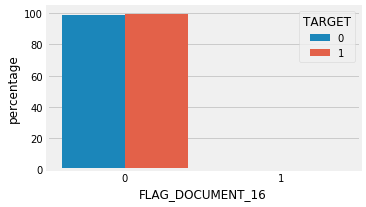

Group summary
    TARGET  FLAG_DOCUMENT_16  percentage
0       0                 0   98.973066
2       1                 0   99.395770
1       0                 1    1.026934
3       1                 1    0.604230

Statistical summary
        FLAG_DOCUMENT_16_TARGET_0  FLAG_DOCUMENT_16_TARGET_1
count              282686.000000               24825.000000
mean                    0.010269                   0.006042
std                     0.100816                   0.077499
min                     0.000000                   0.000000
25%                     0.000000                   0.000000
50%                     0.000000                   0.000000
75%                     0.000000                   0.000000
max                     1.000000                   1.000000


In [219]:
var_int_cnt = var_int.drop(columns = ['CNT_CHILDREN', 'HOUR_APPR_PROCESS_START', 'DAYS_EMPLOYED', 
                                      'DAYS_BIRTH', 'SK_ID_CURR', 'DAYS_ID_PUBLISH'])
var_names = var_int_cnt.columns
var_n = var_names[29]
print('Integer variable name:', var_n)
# % missing value
print('% missing value', train[var_n].isnull().sum()/len(train[var_n])* 100)
# distribution of variable:
# This is how we have to present the bar plot: using the percentage, not count
var = (var_int_cnt.groupby([var_names[0]])[var_names[29]].value_counts(normalize=True).rename('percentage').
       mul(100).reset_index().sort_values(var_names[29]))
sns.barplot(x="FLAG_DOCUMENT_16", y='percentage', hue='TARGET', data=var)
plt.show()
# Statistical summary
target_0_des = train.loc[train['TARGET'] == 0, var_n].describe().rename('FLAG_DOCUMENT_16_TARGET_0')
target_1_des = train.loc[train['TARGET'] == 1, var_n].describe().rename('FLAG_DOCUMENT_16_TARGET_1')
#print('Target 1:', target_1_des)
print('Group summary\n', var)
print('\nStatistical summary\n', pd.concat([target_0_des, target_1_des], axis=1))

In [220]:
#dropping the column
train = train.drop(columns=['FLAG_DOCUMENT_16'])


Integer variable name: FLAG_DOCUMENT_17
% missing value 0.0


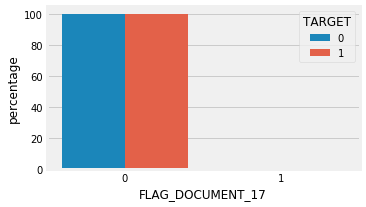

Group summary
    TARGET  FLAG_DOCUMENT_17  percentage
0       0                 0   99.971700
2       1                 0   99.991944
1       0                 1    0.028300
3       1                 1    0.008056

Statistical summary
        FLAG_DOCUMENT_17_TARGET_0  FLAG_DOCUMENT_17_TARGET_1
count              282686.000000               24825.000000
mean                    0.000283                   0.000081
std                     0.016820                   0.008976
min                     0.000000                   0.000000
25%                     0.000000                   0.000000
50%                     0.000000                   0.000000
75%                     0.000000                   0.000000
max                     1.000000                   1.000000


In [221]:
var_int_cnt = var_int.drop(columns = ['CNT_CHILDREN', 'HOUR_APPR_PROCESS_START', 'DAYS_EMPLOYED', 
                                      'DAYS_BIRTH', 'SK_ID_CURR', 'DAYS_ID_PUBLISH'])
var_names = var_int_cnt.columns
var_n = var_names[30]
print('Integer variable name:', var_n)
# % missing value
print('% missing value', train[var_n].isnull().sum()/len(train[var_n])* 100)
# distribution of variable:
# This is how we have to present the bar plot: using the percentage, not count
var = (var_int_cnt.groupby([var_names[0]])[var_names[30]].value_counts(normalize=True).rename('percentage').
       mul(100).reset_index().sort_values(var_names[30]))
sns.barplot(x="FLAG_DOCUMENT_17", y='percentage', hue='TARGET', data=var)
plt.show()
# Statistical summary
target_0_des = train.loc[train['TARGET'] == 0, var_n].describe().rename('FLAG_DOCUMENT_17_TARGET_0')
target_1_des = train.loc[train['TARGET'] == 1, var_n].describe().rename('FLAG_DOCUMENT_17_TARGET_1')
#print('Target 1:', target_1_des)
print('Group summary\n', var)
print('\nStatistical summary\n', pd.concat([target_0_des, target_1_des], axis=1))

In [222]:
#dropping the column
train = train.drop(columns=['FLAG_DOCUMENT_17'])

Integer variable name: FLAG_DOCUMENT_18
% missing value 0.0


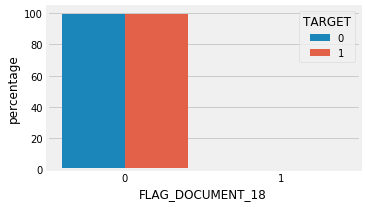

Group summary
    TARGET  FLAG_DOCUMENT_18  percentage
0       0                 0   99.165859
2       1                 0   99.427996
1       0                 1    0.834141
3       1                 1    0.572004

Statistical summary
        FLAG_DOCUMENT_18_TARGET_0  FLAG_DOCUMENT_18_TARGET_1
count              282686.000000               24825.000000
mean                    0.008341                   0.005720
std                     0.090950                   0.075416
min                     0.000000                   0.000000
25%                     0.000000                   0.000000
50%                     0.000000                   0.000000
75%                     0.000000                   0.000000
max                     1.000000                   1.000000


In [223]:
var_names = var_int_cnt.columns
var_n = var_names[31]
print('Integer variable name:', var_n)
# % missing value
print('% missing value', train[var_n].isnull().sum()/len(train[var_n])* 100)
# distribution of variable:
# This is how we have to present the bar plot: using the percentage, not count
var = (var_int_cnt.groupby([var_names[0]])[var_names[31]].value_counts(normalize=True).rename('percentage').
       mul(100).reset_index().sort_values(var_names[31]))
sns.barplot(x="FLAG_DOCUMENT_18", y='percentage', hue='TARGET', data=var)
plt.show()
# Statistical summary
target_0_des = train.loc[train['TARGET'] == 0, var_n].describe().rename('FLAG_DOCUMENT_18_TARGET_0')
target_1_des = train.loc[train['TARGET'] == 1, var_n].describe().rename('FLAG_DOCUMENT_18_TARGET_1')
#print('Target 1:', target_1_des)
print('Group summary\n', var)
print('\nStatistical summary\n', pd.concat([target_0_des, target_1_des], axis=1))

In [224]:
#dropping the column
train = train.drop(columns=['FLAG_DOCUMENT_18'])


Integer variable name: FLAG_DOCUMENT_19
% missing value 0.0


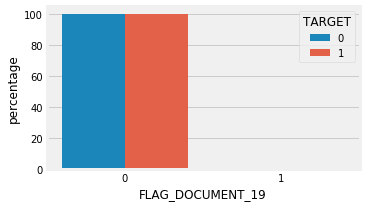

Group summary
    TARGET  FLAG_DOCUMENT_19  percentage
0       0                 0   99.939509
2       1                 0   99.951662
1       0                 1    0.060491
3       1                 1    0.048338

Statistical summary
        FLAG_DOCUMENT_19_TARGET_0  FLAG_DOCUMENT_19_TARGET_1
count              282686.000000               24825.000000
mean                    0.000605                   0.000483
std                     0.024588                   0.021981
min                     0.000000                   0.000000
25%                     0.000000                   0.000000
50%                     0.000000                   0.000000
75%                     0.000000                   0.000000
max                     1.000000                   1.000000


In [225]:
var_names = var_int_cnt.columns
var_n = var_names[32]
print('Integer variable name:', var_n)
# % missing value
print('% missing value', train[var_n].isnull().sum()/len(train[var_n])* 100)
# distribution of variable:
# This is how we have to present the bar plot: using the percentage, not count
var = (var_int_cnt.groupby([var_names[0]])[var_names[32]].value_counts(normalize=True).rename('percentage').
       mul(100).reset_index().sort_values(var_names[32]))
sns.barplot(x="FLAG_DOCUMENT_19", y='percentage', hue='TARGET', data=var)
plt.show()
# Statistical summary
target_0_des = train.loc[train['TARGET'] == 0, var_n].describe().rename('FLAG_DOCUMENT_19_TARGET_0')
target_1_des = train.loc[train['TARGET'] == 1, var_n].describe().rename('FLAG_DOCUMENT_19_TARGET_1')
#print('Target 1:', target_1_des)
print('Group summary\n', var)
print('\nStatistical summary\n', pd.concat([target_0_des, target_1_des], axis=1))

In [226]:
#dropping the column
train = train.drop(columns=['FLAG_DOCUMENT_19'])

Integer variable name: FLAG_DOCUMENT_20
% missing value 0.0


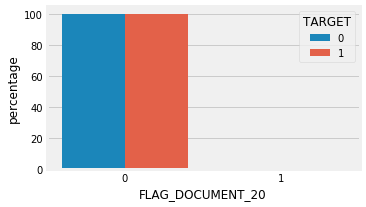

Group summary
    TARGET  FLAG_DOCUMENT_20  percentage
0       0                 0   99.949414
2       1                 0   99.947633
1       0                 1    0.050586
3       1                 1    0.052367

Statistical summary
        FLAG_DOCUMENT_20_TARGET_0  FLAG_DOCUMENT_20_TARGET_1
count              282686.000000               24825.000000
mean                    0.000506                   0.000524
std                     0.022486                   0.022878
min                     0.000000                   0.000000
25%                     0.000000                   0.000000
50%                     0.000000                   0.000000
75%                     0.000000                   0.000000
max                     1.000000                   1.000000


In [227]:
var_names = var_int_cnt.columns
var_n = var_names[33]
print('Integer variable name:', var_n)
# % missing value
print('% missing value', train[var_n].isnull().sum()/len(train[var_n])* 100)
# distribution of variable:
# This is how we have to present the bar plot: using the percentage, not count
var = (var_int_cnt.groupby([var_names[0]])[var_names[33]].value_counts(normalize=True).rename('percentage').
       mul(100).reset_index().sort_values(var_names[33]))
sns.barplot(x="FLAG_DOCUMENT_20", y='percentage', hue='TARGET', data=var)
plt.show()
# Statistical summary
target_0_des = train.loc[train['TARGET'] == 0, var_n].describe().rename('FLAG_DOCUMENT_20_TARGET_0')
target_1_des = train.loc[train['TARGET'] == 1, var_n].describe().rename('FLAG_DOCUMENT_20_TARGET_1')
#print('Target 1:', target_1_des)
print('Group summary\n', var)
print('\nStatistical summary\n', pd.concat([target_0_des, target_1_des], axis=1))

In [228]:
#dropping the column
train = train.drop(columns=['FLAG_DOCUMENT_20'])


Integer variable name: FLAG_DOCUMENT_21
% missing value 0.0


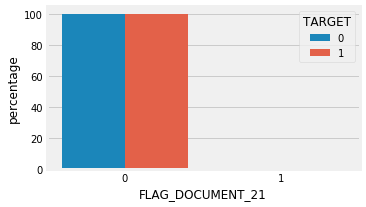

Group summary
    TARGET  FLAG_DOCUMENT_21  percentage
0       0                 0   99.968516
2       1                 0   99.943605
1       0                 1    0.031484
3       1                 1    0.056395

Statistical summary
        FLAG_DOCUMENT_21_TARGET_0  FLAG_DOCUMENT_21_TARGET_1
count              282686.000000               24825.000000
mean                    0.000315                   0.000564
std                     0.017741                   0.023741
min                     0.000000                   0.000000
25%                     0.000000                   0.000000
50%                     0.000000                   0.000000
75%                     0.000000                   0.000000
max                     1.000000                   1.000000


In [229]:
var_names = var_int_cnt.columns
var_n = var_names[34]
print('Integer variable name:', var_n)
# % missing value
print('% missing value', train[var_n].isnull().sum()/len(train[var_n])* 100)
# distribution of variable:
# This is how we have to present the bar plot: using the percentage, not count
var = (var_int_cnt.groupby([var_names[0]])[var_names[34]].value_counts(normalize=True).rename('percentage').
       mul(100).reset_index().sort_values(var_names[34]))
sns.barplot(x="FLAG_DOCUMENT_21", y='percentage', hue='TARGET', data=var)
plt.show()
# Statistical summary
target_0_des = train.loc[train['TARGET'] == 0, var_n].describe().rename('FLAG_DOCUMENT_21_TARGET_0')
target_1_des = train.loc[train['TARGET'] == 1, var_n].describe().rename('FLAG_DOCUMENT_21_TARGET_1')
#print('Target 1:', target_1_des)
print('Group summary\n', var)
print('\nStatistical summary\n', pd.concat([target_0_des, target_1_des], axis=1))

In [230]:
#dropping the column
train = train.drop(columns=['FLAG_DOCUMENT_21'])


Integer variable name: DAYS_BIRTH
% missing value 0.0


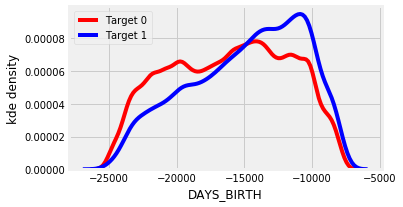


Statistical summary
        DAYS_BIRTH_TARGET_0  DAYS_BIRTH_TARGET_1
count        282686.000000         24825.000000
mean         -16138.176397        -14884.828077
std            4364.200856          4192.844583
min          -25229.000000        -25168.000000
25%          -19793.750000        -18037.000000
50%          -15877.000000        -14282.000000
75%          -12536.000000        -11396.000000
max           -7489.000000         -7678.000000


In [231]:
var_int_dist = pd.concat([train.DAYS_BIRTH, train.DAYS_EMPLOYED, train.DAYS_ID_PUBLISH, 
                          train.DAYS_LAST_PHONE_CHANGE, train.CNT_CHILDREN, train.HOUR_APPR_PROCESS_START], axis=1)

var_names = var_int_dist.columns
var = var_names[0]
print('Integer variable name:', var)
# % missing value
print('% missing value', train[var].isnull().sum()/len(train[var])* 100)

#sns.kdeplot(train[var], label = 'all', color='black')
sns.kdeplot(train.loc[train['TARGET'] == 0, var], label = 'Target 0', color='red')
sns.kdeplot(train.loc[train['TARGET'] == 1, var], label = 'Target 1', color='blue')
plt.xlabel(var)
plt.ylabel('kde density')
plt.grid(True)
plt.rcParams['figure.figsize'] = 4,3
plt.show()

# Statistical summary
target_0_des = train.loc[train['TARGET'] == 0, var].describe().rename('DAYS_BIRTH_TARGET_0')
target_1_des = train.loc[train['TARGET'] == 1, var].describe().rename('DAYS_BIRTH_TARGET_1')
#print('Target 1:', target_1_des)
print('\nStatistical summary\n', pd.concat([target_0_des, target_1_des], axis=1))

Integer variable name: DAYS_EMPLOYED
% missing value 0.0


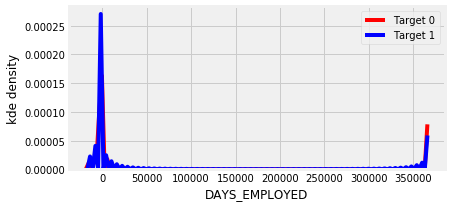


Statistical summary
        DAYS_EMPLOYED_TARGET_0  DAYS_EMPLOYED_TARGET_1
count           282686.000000            24825.000000
mean             65696.146123            42394.675448
std             142877.810161           119484.634253
min             -17912.000000           -16069.000000
25%              -2813.000000            -2156.000000
50%              -1235.000000            -1034.000000
75%               -278.000000             -379.000000
max             365243.000000           365243.000000
% anomaly in train.DAYS_EMPLOYED: 18.01
% anomaly in test.DAYS_EMPLOYED: 19.03


In [234]:
var_int_dist = pd.concat([train.DAYS_BIRTH, train.DAYS_EMPLOYED, train.DAYS_ID_PUBLISH, 
                          train.DAYS_LAST_PHONE_CHANGE, train.CNT_CHILDREN, train.HOUR_APPR_PROCESS_START], axis=1)

var_names = var_int_dist.columns
var = var_names[1]
print('Integer variable name:', var)
# % missing value
print('% missing value', train[var].isnull().sum()/len(train[var])* 100)

#sns.kdeplot(train[var], label = 'all', color='black')
sns.kdeplot(train.loc[train['TARGET'] == 0, var], label = 'Target 0', color='red')
sns.kdeplot(train.loc[train['TARGET'] == 1, var], label = 'Target 1', color='blue')
plt.xlabel(var)
plt.ylabel('kde density')
#plt.xscale('log')
plt.grid(True)
plt.rcParams['figure.figsize'] = 6,3
plt.show()

# Statistical summary
target_0_des = train.loc[train['TARGET'] == 0, var].describe().rename('DAYS_EMPLOYED_TARGET_0')
target_1_des = train.loc[train['TARGET'] == 1, var].describe().rename('DAYS_EMPLOYED_TARGET_1')
#print('Target 1:', target_1_des)
print('\nStatistical summary\n', pd.concat([target_0_des, target_1_des], axis=1))
# Anomalies in data
print('% anomaly in train.DAYS_EMPLOYED: {:05.2f}'.format(len(train[train['DAYS_EMPLOYED']> 0]['DAYS_EMPLOYED'])
                                   /len(train['DAYS_EMPLOYED'])*100))
print('% anomaly in test.DAYS_EMPLOYED: {:05.2f}'.format(len(test[test['DAYS_EMPLOYED']> 0]['DAYS_EMPLOYED'])
                                   /len(test['DAYS_EMPLOYED'])*100))


There are 18% anomalies in DAYS_EMPLOYED train dataset. It seemed to defaultvalue for employment days set as 365243.000000. We will replace the anomalies with 0.

In [242]:
#df.replace(0, 5)
train['DAYS_EMPLOYED'] = train['DAYS_EMPLOYED'].replace(365243, 0)

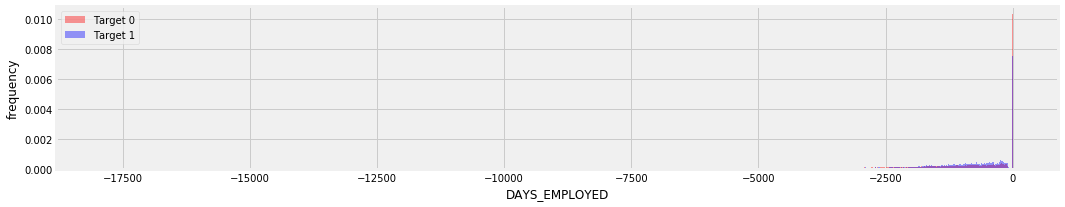

In [238]:
sns.distplot(train.loc[train['TARGET'] == 0, var], label = 'Target 0', color='red', kde=False, bins=1000, norm_hist=True)
sns.distplot(train.loc[train['TARGET'] == 1, var], label = 'Target 1', color='blue', kde=False, bins=1000, norm_hist=True)
plt.xlabel(var)
plt.legend()
plt.ylabel('frequency')
#plt.xscale('log')
plt.xlim(-14000, 0) # The max value should be 0 as the count is backward from the day of application
plt.grid(True)
plt.rcParams['figure.figsize'] = 16,3
plt.show()


The problem is a high number is concentrating on '0'. What should we do with it?

Integer variable name: DAYS_ID_PUBLISH
% missing value 0.0


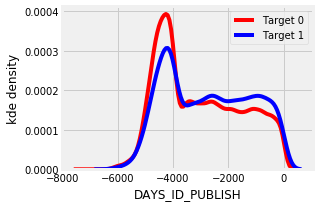


Statistical summary
        DAYS_ID_PUBLISH_TARGET_0  DAYS_ID_PUBLISH_TARGET_1
count             282686.000000              24825.000000
mean               -3017.219788              -2732.099617
std                 1506.614090               1516.975313
min                -7197.000000              -6207.000000
25%                -4313.000000              -4119.000000
50%                -3295.000000              -2797.000000
75%                -1755.000000              -1392.000000
max                    0.000000                  0.000000


In [244]:
var_int_dist = pd.concat([train.DAYS_BIRTH, train.DAYS_EMPLOYED, train.DAYS_ID_PUBLISH, 
                          train.DAYS_LAST_PHONE_CHANGE, train.CNT_CHILDREN, train.HOUR_APPR_PROCESS_START], axis=1)

var_names = var_int_dist.columns
var = var_names[2]
print('Integer variable name:', var)
# % missing value
print('% missing value', train[var].isnull().sum()/len(train[var])* 100)

#sns.kdeplot(train[var], label = 'all', color='black')
sns.kdeplot(train.loc[train['TARGET'] == 0, var], label = 'Target 0', color='red')
sns.kdeplot(train.loc[train['TARGET'] == 1, var], label = 'Target 1', color='blue')
plt.xlabel(var)
plt.ylabel('kde density')
plt.grid(True)
plt.rcParams['figure.figsize'] = 4,3
plt.show()

# Statistical summary
target_0_des = train.loc[train['TARGET'] == 0, var].describe().rename('DAYS_ID_PUBLISH_TARGET_0')
target_1_des = train.loc[train['TARGET'] == 1, var].describe().rename('DAYS_ID_PUBLISH_TARGET_1')
#print('Target 1:', target_1_des)
print('\nStatistical summary\n', pd.concat([target_0_des, target_1_des], axis=1))

Integer variable name: DAYS_LAST_PHONE_CHANGE
% missing value 0.0


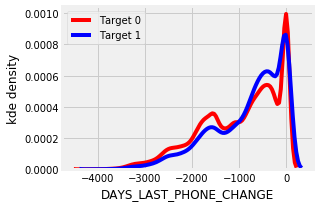


Statistical summary
        DAYS_LAST_PHONE_CHANGE_TARGET_0  DAYS_LAST_PHONE_CHANGE_TARGET_1
count                    282686.000000                     24825.000000
mean                       -976.332458                      -808.799927
std                         831.066711                       758.102539
min                       -4292.000000                     -4070.000000
25%                       -1586.000000                     -1301.000000
50%                        -776.000000                      -594.000000
75%                        -281.000000                      -194.000000
max                           0.000000                         0.000000


In [245]:
ar_int_dist = pd.concat([train.DAYS_BIRTH, train.DAYS_EMPLOYED, train.DAYS_ID_PUBLISH, 
                          train.DAYS_LAST_PHONE_CHANGE, train.CNT_CHILDREN, train.HOUR_APPR_PROCESS_START], axis=1)

var_names = var_int_dist.columns
var = var_names[3]
print('Integer variable name:', var)
# % missing value
print('% missing value', train[var].isnull().sum()/len(train[var])* 100)

#sns.kdeplot(train[var], label = 'all', color='black')
sns.kdeplot(train.loc[train['TARGET'] == 0, var], label = 'Target 0', color='red')
sns.kdeplot(train.loc[train['TARGET'] == 1, var], label = 'Target 1', color='blue')
plt.xlabel(var)
plt.ylabel('kde density')
plt.grid(True)
plt.rcParams['figure.figsize'] = 4,3
plt.show()

# Statistical summary
target_0_des = train.loc[train['TARGET'] == 0, var].describe().rename('DAYS_LAST_PHONE_CHANGE_TARGET_0')
target_1_des = train.loc[train['TARGET'] == 1, var].describe().rename('DAYS_LAST_PHONE_CHANGE_TARGET_1')
#print('Target 1:', target_1_des)
print('\nStatistical summary\n', pd.concat([target_0_des, target_1_des], axis=1))

Integer variable name: CNT_CHILDREN
% missing value 0.0


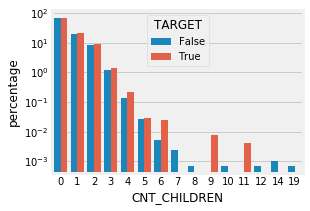

Group summary
     TARGET  CNT_CHILDREN  percentage
0    False             0   70.311936
13    True             0   66.904330
1    False             1   19.691460
14    True             1   21.969789
2    False             2    8.637145
15    True             2    9.397784
16    True             3    1.442095
3    False             3    1.188244
17    True             4    0.221551
4    False             4    0.132302
5    False             5    0.027239
18    True             5    0.028197
6    False             6    0.005306
19    True             6    0.024169
7    False             7    0.002476
9    False             8    0.000707
20    True             9    0.008056
10   False            10    0.000707
21    True            11    0.004028
11   False            12    0.000707
8    False            14    0.001061
12   False            19    0.000707

Statistical summary
        CNT_CHILDREN_TARGET_0  CNT_CHILDREN_TARGET_1
count          282686.000000           24825.000000
mean    

In [246]:
var_int_dist = pd.concat([train.TARGET, train.DAYS_BIRTH, train.DAYS_EMPLOYED, train.DAYS_ID_PUBLISH, 
                          train.DAYS_LAST_PHONE_CHANGE, train.CNT_CHILDREN, train.HOUR_APPR_PROCESS_START], axis=1)

var_names = var_int_dist.columns
var_n = var_names[5]
print('Integer variable name:', var_n)
# % missing value
print('% missing value', train[var_n].isnull().sum()/len(train[var_n])* 100)
# distribution of variable:
# This is how we have to present the bar plot: using the percentage, not count
var = (var_int_dist.groupby([var_names[0]])[var_names[5]].value_counts(normalize=True).rename('percentage').
       mul(100).reset_index().sort_values(var_names[5]))
sns.barplot(x="CNT_CHILDREN", y='percentage', hue='TARGET', data=var)
plt.yscale('log')
plt.show()
# Statistical summary
target_0_des = train.loc[train['TARGET'] == 0, var_n].describe().rename('CNT_CHILDREN_TARGET_0')
target_1_des = train.loc[train['TARGET'] == 1, var_n].describe().rename('CNT_CHILDREN_TARGET_1')
#print('Target 1:', target_1_des)
print('Group summary\n', var)
print('\nStatistical summary\n', pd.concat([target_0_des, target_1_des], axis=1))

Integer variable name: HOUR_APPR_PROCESS_START
% missing value 0.0


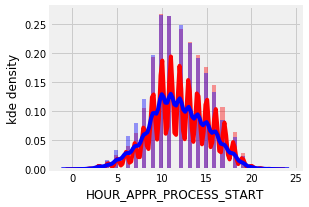


Statistical summary
        HOUR_APPR_PROCESS_START_TARGET_0  HOUR_APPR_PROCESS_START_TARGET_1
count                     282686.000000                      24825.000000
mean                          12.086807                         11.797100
std                            3.263173                          3.284299
min                            0.000000                          0.000000
25%                           10.000000                         10.000000
50%                           12.000000                         12.000000
75%                           14.000000                         14.000000
max                           23.000000                         23.000000


In [247]:
var_int_dist = pd.concat([train.DAYS_BIRTH, train.DAYS_EMPLOYED, train.DAYS_ID_PUBLISH, 
                          train.DAYS_LAST_PHONE_CHANGE, train.CNT_CHILDREN, train.HOUR_APPR_PROCESS_START], axis=1)

var_names = var_int_dist.columns
var = var_names[5]
print('Integer variable name:', var)
# % missing value
print('% missing value', train[var].isnull().sum()/len(train[var])* 100)

#sns.kdeplot(train[var], label = 'all', color='black')
sns.distplot(train.loc[train['TARGET'] == 0, var], label = 'Target 0', color='red')
sns.distplot(train.loc[train['TARGET'] == 1, var], label = 'Target 1', color='blue')
plt.xlabel(var)
plt.ylabel('kde density')
plt.grid(True)
plt.rcParams['figure.figsize'] = 4,3
plt.show()

# Statistical summary
target_0_des = train.loc[train['TARGET'] == 0, var].describe().rename('HOUR_APPR_PROCESS_START_TARGET_0')
target_1_des = train.loc[train['TARGET'] == 1, var].describe().rename('HOUR_APPR_PROCESS_START_TARGET_1')
#print('Target 1:', target_1_des)
print('\nStatistical summary\n', pd.concat([target_0_des, target_1_des], axis=1))

## variable type: categorical

Categorical variable name: NAME_CONTRACT_TYPE
% missing value 0.0


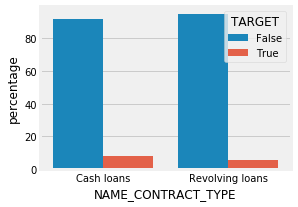

Group summary
   NAME_CONTRACT_TYPE  TARGET  percentage
0         Cash loans   False   91.654087
1         Cash loans    True    8.345913
2    Revolving loans   False   94.521671
3    Revolving loans    True    5.478329


In [248]:
var_obj = obj.columns
var_n = var_obj[0]
print('Categorical variable name:', var_n)
# % missing value
print('% missing value', train[var_n].isnull().sum()/len(train[var_n])* 100)
# distribution/frequency
df = pd.concat([train[var_n], train.TARGET], axis=1)
var= df.groupby([var_n])['TARGET'].value_counts(normalize=True).rename('percentage').mul(100).reset_index().sort_values([var_n])
sns.barplot(x=var_n, y='percentage', hue='TARGET', data=var)
plt.show()

print('Group summary\n', var)

Categorical variable name: CODE_GENDER
% missing value 0.0


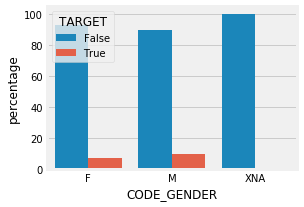

Group summary
   CODE_GENDER  TARGET  percentage
0           F   False   93.000672
1           F    True    6.999328
2           M   False   89.858080
3           M    True   10.141920
4         XNA   False  100.000000


In [249]:
var_obj = obj.columns
var_n = var_obj[1]
print('Categorical variable name:', var_n)
# % missing value
print('% missing value', train[var_n].isnull().sum()/len(train[var_n])* 100)
# distribution/frequency
df = pd.concat([train[var_n], train.TARGET], axis=1)
var= df.groupby([var_n])['TARGET'].value_counts(normalize=True).rename('percentage').mul(100).reset_index().sort_values([var_n])
sns.barplot(x=var_n, y='percentage', hue='TARGET', data=var)
plt.rcParams['figure.figsize'] = 6,3
plt.show()
print('Group summary\n', var)

Categorical variable name: FLAG_OWN_CAR
% missing value 0.0


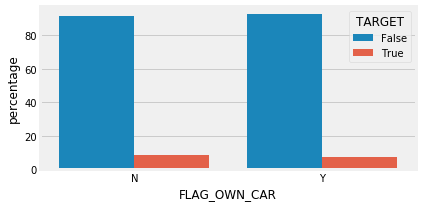

Group summary
   FLAG_OWN_CAR  TARGET  percentage
0            N   False   91.499773
1            N    True    8.500227
2            Y   False   92.756270
3            Y    True    7.243730


In [250]:
var_obj = obj.columns
var_n = var_obj[2]
print('Categorical variable name:', var_n)
# % missing value
print('% missing value', train[var_n].isnull().sum()/len(train[var_n])* 100)
# distribution/frequency
df = pd.concat([train[var_n], train.TARGET], axis=1)
var= df.groupby([var_n])['TARGET'].value_counts(normalize=True).rename('percentage').mul(100).reset_index().sort_values([var_n])
sns.barplot(x=var_n, y='percentage', hue='TARGET', data=var)
plt.rcParams['figure.figsize'] = 4,3
plt.show()
print('Group summary\n', var)

Categorical variable name: FLAG_OWN_REALTY
% missing value 0.0


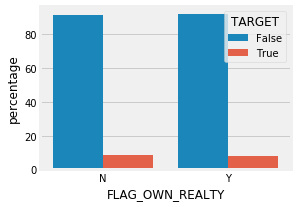

Group summary
   FLAG_OWN_REALTY  TARGET  percentage
0               N   False   91.675071
1               N    True    8.324929
2               Y   False   92.038423
3               Y    True    7.961577


In [251]:
var_obj = obj.columns
var_n = var_obj[3]
print('Categorical variable name:', var_n)
# % missing value
print('% missing value', train[var_n].isnull().sum()/len(train[var_n])* 100)
# distribution/frequency
df = pd.concat([train[var_n], train.TARGET], axis=1)
var= df.groupby([var_n])['TARGET'].value_counts(normalize=True).rename('percentage').mul(100).reset_index().sort_values([var_n])
sns.barplot(x=var_n, y='percentage', hue='TARGET', data=var)
plt.rcParams['figure.figsize'] = 4,3
plt.show()
print('Group summary\n', var)

Categorical variable name: NAME_TYPE_SUITE
% missing value 0.42014757195677555


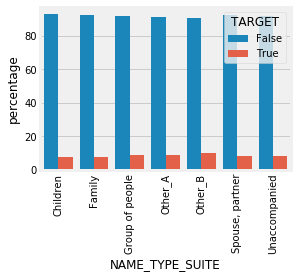

Group summary
     NAME_TYPE_SUITE  TARGET  percentage
0          Children   False   92.623202
1          Children    True    7.376798
2            Family   False   92.505417
3            Family    True    7.494583
4   Group of people   False   91.512915
5   Group of people    True    8.487085
6           Other_A   False   91.224018
7           Other_A    True    8.775982
8           Other_B   False   90.169492
9           Other_B    True    9.830508
10  Spouse, partner   False   92.128408
11  Spouse, partner    True    7.871592
12    Unaccompanied   False   91.816953
13    Unaccompanied    True    8.183047


In [252]:
var_obj = obj.columns
var_n = var_obj[4]
print('Categorical variable name:', var_n)
# % missing value
print('% missing value', train[var_n].isnull().sum()/len(train[var_n])* 100)
# distribution/frequency
df = pd.concat([train[var_n], train.TARGET], axis=1)
var= df.groupby([var_n])['TARGET'].value_counts(normalize=True).rename('percentage').mul(100).reset_index().sort_values([var_n])
sns.barplot(x=var_n, y='percentage', hue='TARGET', data=var)
plt.rcParams['figure.figsize'] = 6,3
plt.xticks(rotation='vertical')
plt.show()
print('Group summary\n', var)

Categorical variable name: NAME_INCOME_TYPE
% missing value 0.0


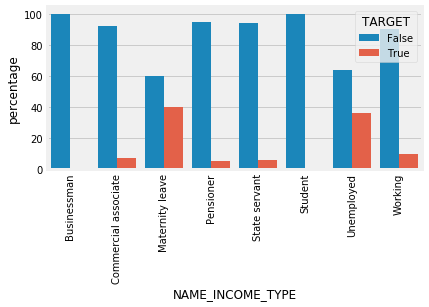

Group summary
         NAME_INCOME_TYPE  TARGET  percentage
0            Businessman   False  100.000000
1   Commercial associate   False   92.515743
2   Commercial associate    True    7.484257
3        Maternity leave   False   60.000000
4        Maternity leave    True   40.000000
5              Pensioner   False   94.613634
6              Pensioner    True    5.386366
7          State servant   False   94.245035
8          State servant    True    5.754965
9                Student   False  100.000000
10            Unemployed   False   63.636364
11            Unemployed    True   36.363636
12               Working   False   90.411528
13               Working    True    9.588472


In [253]:
var_obj = obj.columns
var_n = var_obj[5]
print('Categorical variable name:', var_n)
# % missing value
print('% missing value', train[var_n].isnull().sum()/len(train[var_n])* 100)
# distribution/frequency
df = pd.concat([train[var_n], train.TARGET], axis=1)
var= df.groupby([var_n])['TARGET'].value_counts(normalize=True).rename('percentage').mul(100).reset_index().sort_values([var_n])
sns.barplot(x=var_n, y='percentage', hue='TARGET', data=var)
plt.rcParams['figure.figsize'] = 6,3
plt.xticks(rotation='vertical')
plt.show()
print('Group summary\n', var)

100% of businessmen and students repaid the loan in time. Unemployed and women in maternity leave had maximum difficulties in repaying loans 

Categorical variable name: NAME_EDUCATION_TYPE
% missing value 0.0


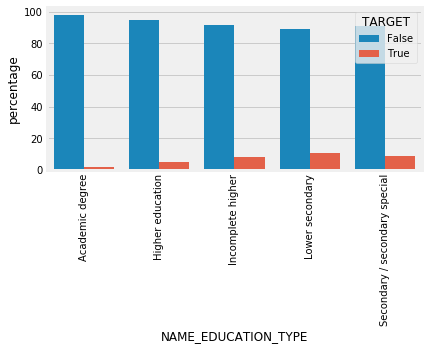

Group summary
              NAME_EDUCATION_TYPE  TARGET  percentage
0                Academic degree   False   98.170732
1                Academic degree    True    1.829268
2               Higher education   False   94.644885
3               Higher education    True    5.355115
4              Incomplete higher   False   91.515034
5              Incomplete higher    True    8.484966
6                Lower secondary   False   89.072327
7                Lower secondary    True   10.927673
8  Secondary / secondary special   False   91.060071
9  Secondary / secondary special    True    8.939929


In [254]:
var_obj = obj.columns
var_n = var_obj[6]
print('Categorical variable name:', var_n)
# % missing value
print('% missing value', train[var_n].isnull().sum()/len(train[var_n])* 100)
# distribution/frequency
df = pd.concat([train[var_n], train.TARGET], axis=1)
var= df.groupby([var_n])['TARGET'].value_counts(normalize=True).rename('percentage').mul(100).reset_index().sort_values([var_n])
sns.barplot(x=var_n, y='percentage', hue='TARGET', data=var)
plt.rcParams['figure.figsize'] = 6,3
plt.xticks(rotation='vertical')
plt.show()
print('Group summary\n', var)

People with lower secondary education has more difficulty in repaying loan.

Categorical variable name: NAME_FAMILY_STATUS
% missing value 0.0


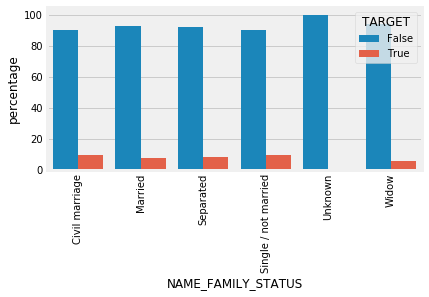

Group summary
       NAME_FAMILY_STATUS  TARGET  percentage
0         Civil marriage   False   90.055416
1         Civil marriage    True    9.944584
2                Married   False   92.440132
3                Married    True    7.559868
4              Separated   False   91.805766
5              Separated    True    8.194234
6   Single / not married   False   90.192325
7   Single / not married    True    9.807675
8                Unknown   False  100.000000
9                  Widow   False   94.175783
10                 Widow    True    5.824217


In [255]:
var_obj = obj.columns
var_n = var_obj[7]
print('Categorical variable name:', var_n)
# % missing value
print('% missing value', train[var_n].isnull().sum()/len(train[var_n])* 100)
# distribution/frequency
df = pd.concat([train[var_n], train.TARGET], axis=1)
var= df.groupby([var_n])['TARGET'].value_counts(normalize=True).rename('percentage').mul(100).reset_index().sort_values([var_n])
sns.barplot(x=var_n, y='percentage', hue='TARGET', data=var)
plt.rcParams['figure.figsize'] = 6,3
plt.xticks(rotation='vertical')
plt.show()
print('Group summary\n', var)

People under unknown category had 100% repaid loan in time. The type of category suggests it was not recorded properly and should not be used as an important feature.

Categorical variable name: NAME_HOUSING_TYPE
% missing value 0.0


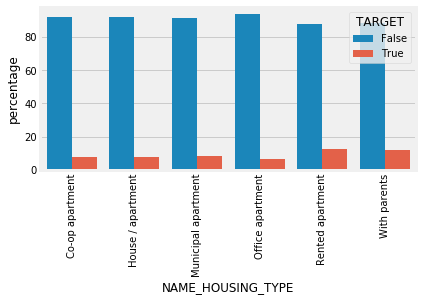

Group summary
       NAME_HOUSING_TYPE  TARGET  percentage
0       Co-op apartment   False   92.067736
1       Co-op apartment    True    7.932264
2     House / apartment   False   92.204289
3     House / apartment    True    7.795711
4   Municipal apartment   False   91.460252
5   Municipal apartment    True    8.539748
6      Office apartment   False   93.427589
7      Office apartment    True    6.572411
8      Rented apartment   False   87.686949
9      Rented apartment    True   12.313051
10         With parents   False   88.301887
11         With parents    True   11.698113


In [256]:
var_obj = obj.columns
var_n = var_obj[8]
print('Categorical variable name:', var_n)
# % missing value
print('% missing value', train[var_n].isnull().sum()/len(train[var_n])* 100)
# distribution/frequency
df = pd.concat([train[var_n], train.TARGET], axis=1)
var= df.groupby([var_n])['TARGET'].value_counts(normalize=True).rename('percentage').mul(100).reset_index().sort_values([var_n])
sns.barplot(x=var_n, y='percentage', hue='TARGET', data=var)
plt.rcParams['figure.figsize'] = 6,3
plt.xticks(rotation='vertical')
plt.show()
print('Group summary\n', var)

Among all people with rented apartments and people living with parents had more difficulties to repay the loan but not at significant scale

Categorical variable name: OCCUPATION_TYPE
% missing value 31.345545362604916


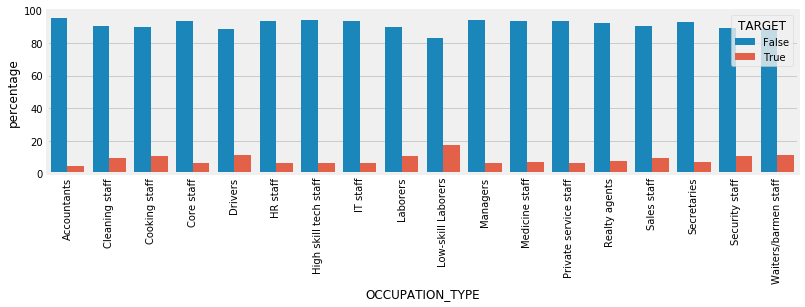

Group summary
           OCCUPATION_TYPE  TARGET  percentage
0             Accountants   False   95.169673
1             Accountants    True    4.830327
2          Cleaning staff   False   90.393295
3          Cleaning staff    True    9.606705
4           Cooking staff   False   89.556004
5           Cooking staff    True   10.443996
6              Core staff   False   93.696046
7              Core staff    True    6.303954
8                 Drivers   False   88.673870
9                 Drivers    True   11.326130
10               HR staff   False   93.605684
11               HR staff    True    6.394316
12  High skill tech staff   False   93.840070
13  High skill tech staff    True    6.159930
14               IT staff   False   93.536122
15               IT staff    True    6.463878
17               Laborers    True   10.578770
16               Laborers   False   89.421230
18     Low-skill Laborers   False   82.847587
19     Low-skill Laborers    True   17.152413
20               Ma

In [258]:
var_obj = obj.columns
var_n = var_obj[9]
print('Categorical variable name:', var_n)
# % missing value
print('% missing value', train[var_n].isnull().sum()/len(train[var_n])* 100)
# distribution/frequency
df = pd.concat([train[var_n], train.TARGET], axis=1)
var= df.groupby([var_n])['TARGET'].value_counts(normalize=True).rename('percentage').mul(100).reset_index().sort_values([var_n])
sns.barplot(x=var_n, y='percentage', hue='TARGET', data=var)
plt.rcParams['figure.figsize'] = 12,3
plt.xticks(rotation='vertical')
plt.show()
print('Group summary\n', var)

Occupation type which had difficulties in repaying loans more than 10% times are Low-skill Laborers, Laborers, Drivers, cooking staff, and Waiters/barmen staff reflecting low income group, but again not to great extent.

How can we fill occupation type for missing values

Categorical variable name: WEEKDAY_APPR_PROCESS_START
% missing value 0.0


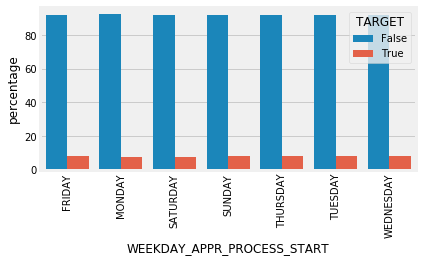

Group summary
    WEEKDAY_APPR_PROCESS_START  TARGET  percentage
0                      FRIDAY   False   91.853073
1                      FRIDAY    True    8.146927
2                      MONDAY   False   92.242773
3                      MONDAY    True    7.757227
4                    SATURDAY   False   92.112726
5                    SATURDAY    True    7.887274
6                      SUNDAY   False   92.070947
7                      SUNDAY    True    7.929053
8                    THURSDAY   False   91.899745
9                    THURSDAY    True    8.100255
10                    TUESDAY   False   91.649506
11                    TUESDAY    True    8.350494
12                  WEDNESDAY   False   91.839643
13                  WEDNESDAY    True    8.160357


In [260]:
var_obj = obj.columns
var_n = var_obj[10]
print('Categorical variable name:', var_n)
# % missing value
print('% missing value', train[var_n].isnull().sum()/len(train[var_n])* 100)
# distribution/frequency
df = pd.concat([train[var_n], train.TARGET], axis=1)
var= df.groupby([var_n])['TARGET'].value_counts(normalize=True).rename('percentage').mul(100).reset_index().sort_values([var_n])
sns.barplot(x=var_n, y='percentage', hue='TARGET', data=var)
plt.rcParams['figure.figsize'] = 6,3
plt.xticks(rotation='vertical')
plt.show()
print('Group summary\n', var)

It should not matter which day of the week the processing starts. We should get rid of it.

In [261]:
#dropping the column
train = train.drop(columns=['WEEKDAY_APPR_PROCESS_START'])

Categorical variable name: ORGANIZATION_TYPE
% missing value 0.0


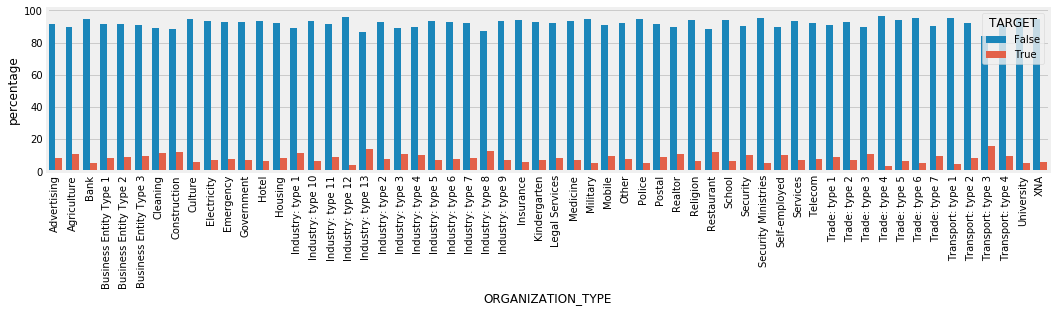

Group summary
           ORGANIZATION_TYPE  TARGET  percentage
115                     XNA    True    5.399646
61                 Medicine    True    6.584472
99            Trade: type 5    True    6.122449
33        Industry: type 11    True    8.653846
67                    Other    True    7.642510
35        Industry: type 12    True    3.794038
97            Trade: type 4    True    3.125000
37        Industry: type 13    True   13.432836
77               Restaurant    True   11.706240
39         Industry: type 2    True    7.205240
41         Industry: type 3    True   10.616229
95            Trade: type 3    True   10.337915
83      Security Ministries    True    4.863222
43         Industry: type 4    True   10.148233
93            Trade: type 2    True    7.000000
45         Industry: type 5    True    6.844741
65                   Mobile    True    9.148265
47         Industry: type 6    True    7.142857
91            Trade: type 1    True    8.908046
49         Industry: type

In [263]:
var_obj = obj.columns
var_n = var_obj[11]
print('Categorical variable name:', var_n)
# % missing value
print('% missing value', train[var_n].isnull().sum()/len(train[var_n])* 100)
# distribution/frequency
df = pd.concat([train[var_n], train.TARGET], axis=1)
var= df.groupby([var_n])['TARGET'].value_counts(normalize=True).rename('percentage').mul(100).reset_index().sort_values([var_n])
plt.rcParams['figure.figsize'] = 16,3
sns.barplot(x=var_n, y='percentage', hue='TARGET', data=var)
plt.xticks(rotation='vertical')
plt.show()
print('Group summary\n', var.sort_values(by='TARGET', ascending=False))

People with several organization type had difficulties in repaying loan

Categorical variable name: FONDKAPREMONT_MODE
% missing value 68.38617155158677


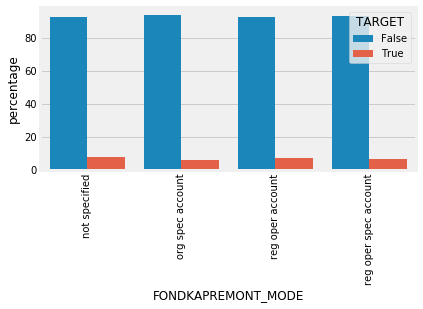

Group summary
       FONDKAPREMONT_MODE  TARGET  percentage
0          not specified   False   92.456480
1          not specified    True    7.543520
2       org spec account   False   94.180459
3       org spec account    True    5.819541
4       reg oper account   False   93.021807
5       reg oper account    True    6.978193
6  reg oper spec account   False   93.443709
7  reg oper spec account    True    6.556291


In [264]:
var_obj = obj.columns
var_n = var_obj[12]
print('Categorical variable name:', var_n)
# % missing value
print('% missing value', train[var_n].isnull().sum()/len(train[var_n])* 100)
# distribution/frequency
df = pd.concat([train[var_n], train.TARGET], axis=1)
var= df.groupby([var_n])['TARGET'].value_counts(normalize=True).rename('percentage').mul(100).reset_index().sort_values([var_n])
plt.rcParams['figure.figsize'] = 6,3
sns.barplot(x=var_n, y='percentage', hue='TARGET', data=var)
plt.xticks(rotation='vertical')
plt.show()
print('Group summary\n', var)

This is also information of the living area of the client. What to do with this variable for missing values.. May be simply delete.

Categorical variable name: HOUSETYPE_MODE
% missing value 50.176091261776


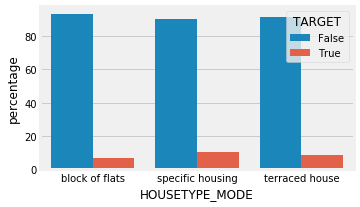

Group summary
      HOUSETYPE_MODE  TARGET  percentage
0    block of flats   False   93.056617
1    block of flats    True    6.943383
2  specific housing   False   89.859907
3  specific housing    True   10.140093
4    terraced house   False   91.501650
5    terraced house    True    8.498350


In [265]:
var_obj = obj.columns
var_n = var_obj[13]
print('Categorical variable name:', var_n)
# % missing value
print('% missing value', train[var_n].isnull().sum()/len(train[var_n])* 100)
# distribution/frequency
df = pd.concat([train[var_n], train.TARGET], axis=1)
var= df.groupby([var_n])['TARGET'].value_counts(normalize=True).rename('percentage').mul(100).reset_index().sort_values([var_n])
plt.rcParams['figure.figsize'] = 5,3
sns.barplot(x=var_n, y='percentage', hue='TARGET', data=var)
#plt.xticks(rotation='vertical')
plt.show()
print('Group summary\n', var)

Categorical variable name: WALLSMATERIAL_MODE
% missing value 50.8407829313423


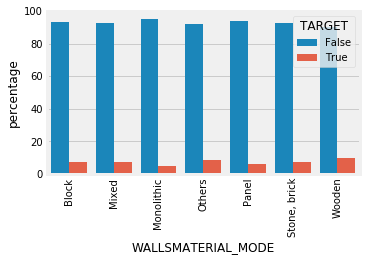

Group summary
    WALLSMATERIAL_MODE  TARGET  percentage
0               Block   False   92.975251
1               Block    True    7.024749
2               Mixed   False   92.465157
3               Mixed    True    7.534843
4          Monolithic   False   95.278246
5          Monolithic    True    4.721754
6              Others   False   91.692308
7              Others    True    8.307692
8               Panel   False   93.652332
9               Panel    True    6.347668
10       Stone, brick   False   92.594307
11       Stone, brick    True    7.405693
12             Wooden   False   90.302126
13             Wooden    True    9.697874


In [266]:
var_obj = obj.columns
var_n = var_obj[14]
print('Categorical variable name:', var_n)
# % missing value
print('% missing value', train[var_n].isnull().sum()/len(train[var_n])* 100)
# distribution/frequency
df = pd.concat([train[var_n], train.TARGET], axis=1)
var= df.groupby([var_n])['TARGET'].value_counts(normalize=True).rename('percentage').mul(100).reset_index().sort_values([var_n])
plt.rcParams['figure.figsize'] = 5,3
sns.barplot(x=var_n, y='percentage', hue='TARGET', data=var)
plt.xticks(rotation='vertical')
plt.show()
print('Group summary\n', var)

Categorical variable name: EMERGENCYSTATE_MODE
% missing value 47.39830445089769


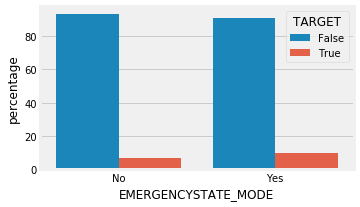

Group summary
   EMERGENCYSTATE_MODE  TARGET  percentage
0                  No   False   93.035100
1                  No    True    6.964900
2                 Yes   False   90.420962
3                 Yes    True    9.579038


In [267]:
# EMERGENCYSTATE_MODE: normalized information of the living area
var_obj = obj.columns
var_n = var_obj[15]
print('Categorical variable name:', var_n)
# % missing value
print('% missing value', train[var_n].isnull().sum()/len(train[var_n])* 100)
# distribution/frequency
df = pd.concat([train[var_n], train.TARGET], axis=1)
var= df.groupby([var_n])['TARGET'].value_counts(normalize=True).rename('percentage').mul(100).reset_index().sort_values([var_n])
plt.rcParams['figure.figsize'] = 5,3
sns.barplot(x=var_n, y='percentage', hue='TARGET', data=var)
#plt.xticks(rotation='vertical')
plt.show()
print('Group summary\n', var)

Among all these variables EXT_SOURCE_1, EXT_SOURCE_2, EXT_SOURCE_3, DAYS_BIRTH, DAYS_EMPLOYED, DAYS_ID_PUBLISH, NAME_INCOME_TYPE, NAME_EDUCATION_TYPE, NAME_HOUSING_TYPE, OCCUPATION_TYPE, ORGANIZATION_TYPE have visible influence on the TARGET. So, these variables are important in predicting the target.

### Correlation with target

In [77]:
# find correlation of the features with target
correlations =  train.corr()['TARGET'].sort_values()
print('Most negative correlations:\n', correlations.head(10), '\n\nMost positive correlations\n', correlations.tail(10))

Most negative correlations:
 EXT_SOURCE_3                           -0.178919
EXT_SOURCE_2                           -0.160472
EXT_SOURCE_1                           -0.155317
NAME_EDUCATION_TYPE_Higher education   -0.056593
CODE_GENDER_F                          -0.054704
NAME_INCOME_TYPE_Pensioner             -0.046209
ORGANIZATION_TYPE_XNA                  -0.045987
DAYS_EMPLOYED                          -0.044932
FLOORSMAX_AVG                          -0.044003
FLOORSMAX_MEDI                         -0.043768
Name: TARGET, dtype: float64 

Most positive correlations
 NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
REG_CITY_NOT_WORK_CITY                               0.050994
DAYS_ID_PUBLISH                                      0.051457
CODE_GENDER_M                                        0.054713
DAYS_LAST_PHONE_CHANGE                               0.055218
NAME_INCOME_TYPE_Working                             0.057481
REGION_RATING_CLIENT                              

The correlation of any individual variable with the target is not strong. DAYS_BIRTH has strongest positive relation and EXIT_SOURCE_3 has maximum negative correlation. However, if we apply feature engineering the correlation canbe improved.

## Table: Bureau

In [449]:
bureau = pd.read_csv(path + files[2])
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [270]:
print('Variable types are:\n', bureau.dtypes.value_counts())

Variable types are:
 float64    8
int64      6
object     3
dtype: int64


In [458]:
# missing values
print('Total number of variables:', bureau.shape[1])
miss_val = bureau.isnull().sum() # number of missing value in each col
miss_val = miss_val.sort_values(ascending=False) # sorting from max to min
miss_list = list(miss_val)
ind = miss_list.index(0)
miss_var = miss_val[0:ind] # only variables with missing values
print('Out of', bureau.shape[1], ', number of variables with missing values:', ind)

percent_miss = miss_var/len(bureau) * 100 # percent missing value for each variable
print('\n% data missing\n', percent_miss)    

Total number of variables: 17
Out of 17 , number of variables with missing values: 7

% data missing
 AMT_ANNUITY               71.473490
AMT_CREDIT_MAX_OVERDUE    65.513264
DAYS_ENDDATE_FACT         36.916958
AMT_CREDIT_SUM_LIMIT      34.477415
AMT_CREDIT_SUM_DEBT       15.011932
DAYS_CREDIT_ENDDATE        6.149573
AMT_CREDIT_SUM             0.000757
dtype: float64


In [278]:
obj = bureau.select_dtypes('object') # selcting only categorical variable
obj_uni = obj.apply(pd.Series.nunique, axis=0) # unique values in category
print('\nUnique values in categorical variables are:\n', obj_uni.sort_values())


Unique values in categorical variables are:
 Series([], dtype: float64)


In [279]:
var_float = bureau.select_dtypes('float64')
print('\nVariables with float outcome:\n', var_float.columns)
var_int = bureau.select_dtypes('int64')
print('\nVariables with integer outcome:\n', var_int.columns)
var_int_uni = var_int.apply(pd.Series.nunique, axis=0)
print('\nUnique values in integer variables:', var_int_uni.sort_values())



Variables with float outcome:
 Index([], dtype='object')

Variables with integer outcome:
 Index(['DAYS_CREDIT', 'CREDIT_DAY_OVERDUE', 'CNT_CREDIT_PROLONG',
       'DAYS_CREDIT_UPDATE'],
      dtype='object')

Unique values in integer variables: CNT_CREDIT_PROLONG      10
CREDIT_DAY_OVERDUE     942
DAYS_CREDIT           2923
DAYS_CREDIT_UPDATE    2982
dtype: int64


In [280]:
convert_types(bureau, print_info=True)

Original Memory Usage: 0.13 gb.
New Memory Usage: 0.13 gb.


,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,9.132300e+04,0.000000e+00,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,2.250000e+05,1.713420e+05,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,4.643235e+05,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,9.000000e+04,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.500000,0,2.700000e+06,NaN,NaN,0.0,Consumer credit,-21,NaN
5,215354,5714467,Active,currency 1,-273,0,27460.0,NaN,0.000000,0,1.800000e+05,7.101738e+04,108982.617188,0.0,Credit card,-31,NaN
6,215354,5714468,Active,currency 1,-43,0,79.0,NaN,0.000000,0,4.210380e+04,4.210380e+04,0.000000,0.0,Consumer credit,-22,NaN
7,162297,5714469,Closed,currency 1,-1896,0,-1684.0,-1710.0,14985.000000,0,7.687845e+04,0.000000e+00,0.000000,0.0,Consumer credit,-1710,NaN
8,162297,5714470,Closed,currency 1,-1146,0,-811.0,-840.0,0.000000,0,1.030077e+05,0.000000e+00,0.000000,0.0,Consumer credit,-840,NaN
9,162297,5714471,Active,currency 1,-1146,0,-484.0,NaN,0.000000,0,4.500000e+03,0.000000e+00,0.000000,0.0,Credit card,-690,NaN


For a single SK_ID_CURR there are multiple entries suggesting people had multiple loans agaist their name. The unique ID is SK_ID_BUREAU. So first we need to groupby SK_ID_CURR.

In [281]:
#groupby SK_ID_CURR, count the number of previous loans as a new variable
prev_loan_counts = bureau.groupby('SK_ID_CURR', as_index=False)['SK_ID_BUREAU'].count().rename(columns = {'SK_ID_BUREAU': 'previous_loan_counts'})
prev_loan_counts.head()

,SK_ID_CURR,previous_loan_counts
0,100001,7
1,100002,8
2,100003,4
3,100004,2
4,100005,3


In [282]:
# Join prev_loan_counts to the training dataframe
train = train.merge(prev_loan_counts, on = 'SK_ID_CURR', how = 'left')
# Fill the missing values in previous laon counts with 0 
train['previous_loan_counts'] = train['previous_loan_counts'].fillna(0)
train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_3,FLAG_DOCUMENT_6,FLAG_DOCUMENT_8,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,previous_loan_counts
0,100002,True,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,True,0,0,0.0,0.0,0.0,0.0,0.0,1.0,8.0
1,100003,False,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,True,0,0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
2,100004,False,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,False,0,0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,100006,False,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,True,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,100007,False,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,False,0,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0


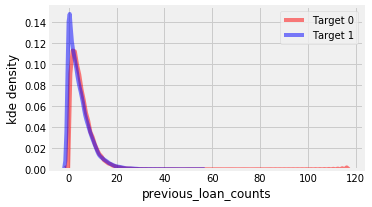

       AMT_CREDIT_TARGET_0  AMT_CREDIT_TARGET_1
count        282686.000000         24825.000000
mean              4.778464             4.613092
std               4.474586             4.732792
min               0.000000             0.000000
25%               1.000000             1.000000
50%               4.000000             3.000000
75%               7.000000             7.000000
max             116.000000            55.000000


In [283]:
var = 'previous_loan_counts'
sns.kdeplot(train.loc[train['TARGET'] == 0, var], label = 'Target 0', color='red', alpha=0.5)
sns.kdeplot(train.loc[train['TARGET'] == 1, var], label = 'Target 1', color='blue', alpha=0.5)
plt.xlabel(var)
plt.ylabel('kde density')
#plt.yscale('log')
plt.grid(True)
plt.rcParams['figure.figsize'] = 4,4
plt.show()

# Statistical summary
# with target '0'
target_0_des = train.loc[train['TARGET'] == 0, var].describe().rename('AMT_CREDIT_TARGET_0')
#print('Target 0:', target_0_des)
# with target '1'
target_1_des = train.loc[train['TARGET'] == 1, var].describe().rename('AMT_CREDIT_TARGET_1')
#print('Target 1:', target_1_des)
print(pd.concat([target_0_des, target_1_des], axis=1))


The number of previous loans does to matter much whether someone would default in repaying loan it seems. We can use the aggregate function in creating new variables.

### variable type: numeric

In [288]:
# Group by the client id, and calculate aggregation statistics
bureau = bureau.drop(columns = ['SK_ID_BUREAU']) # dropping 'SK_ID_BUREAU' column
bureau_num = bureau.select_dtypes(exclude='category') # excluding category type columns for aggregation purpose
bureau_agg = bureau_num.groupby('SK_ID_CURR', as_index = False).agg(['count', 'mean', 'max', 'min', 'sum']).reset_index()
bureau_agg.head()

SK_ID_CURR DAYS_CREDIT                               CREDIT_DAY_OVERDUE  \
                   count         mean  max   min   sum              count   
0     100001           7  -735.000000  -49 -1572 -5145                  7   
1     100002           8  -874.000000 -103 -1437 -6992                  8   
2     100003           4 -1400.750000 -606 -2586 -5603                  4   
3     100004           2  -867.000000 -408 -1326 -1734                  2   
4     100005           3  -190.666667  -62  -373  -572                  3   

                 ...    DAYS_CREDIT_UPDATE                               \
  mean max min   ...                 count        mean  max   min   sum   
0  0.0   0   0   ...                     7  -93.142857   -6  -155  -652   
1  0.0   0   0   ...                     8 -499.875000   -7 -1185 -3999   
2  0.0   0   0   ...                     4 -816.000000  -43 -2131 -3264   
3  0.0   0   0   ...                     2 -532.000000 -382  -682 -1064   
4  0.0   0   0   ...                     3  -54.333333  -11  -121  -163   

  AMT_ANNUITY                                      
        count         mean      max  min      sum  
0           7  3545.357178  10822.5  0.0  24817.5  
1           7     0.000000      0.0  0.0      0.0  
2           0          NaN      NaN  NaN      0.0  
3           0          NaN      NaN  NaN      0.0  
4           3  1420.500000   4261.5  0.0   4261.5  

[5 rows x 61 columns]

We have aggregated variables in 2 levels, which we need to collapse in single level column name.

In [289]:
columns = ['SK_ID_CURR']
variables = bureau_agg.columns.levels[0] # ['DAYS_CREDIT', 'CREDIT_DAY_OVERDUE', 'DAYS_CREDIT_ENDDATE', etc.
add_stat = bureau_agg.columns.levels[1] # ['count', 'mean', 'max', 'min', 'sum']
for var in variables:
    if var != 'SK_ID_CURR':
        #print(var)
        for stat in add_stat[:-1]:
            columns.append('bureau_%s_%s' % (var, stat)) # column name added with table name and aggregation funciton
            #print(columns)
print(len(columns))
bureau_agg.columns = columns
bureau_agg.head()

61


,SK_ID_CURR,bureau_DAYS_CREDIT_count,bureau_DAYS_CREDIT_mean,bureau_DAYS_CREDIT_max,bureau_DAYS_CREDIT_min,bureau_DAYS_CREDIT_sum,bureau_CREDIT_DAY_OVERDUE_count,bureau_CREDIT_DAY_OVERDUE_mean,bureau_CREDIT_DAY_OVERDUE_max,bureau_CREDIT_DAY_OVERDUE_min,...,bureau_DAYS_CREDIT_UPDATE_count,bureau_DAYS_CREDIT_UPDATE_mean,bureau_DAYS_CREDIT_UPDATE_max,bureau_DAYS_CREDIT_UPDATE_min,bureau_DAYS_CREDIT_UPDATE_sum,bureau_AMT_ANNUITY_count,bureau_AMT_ANNUITY_mean,bureau_AMT_ANNUITY_max,bureau_AMT_ANNUITY_min,bureau_AMT_ANNUITY_sum
0,100001,7,-735.000000,-49,-1572,-5145,7,0.0,0,0,...,7,-93.142857,-6,-155,-652,7,3545.357178,10822.5,0.0,24817.5
1,100002,8,-874.000000,-103,-1437,-6992,8,0.0,0,0,...,8,-499.875000,-7,-1185,-3999,7,0.000000,0.0,0.0,0.0
2,100003,4,-1400.750000,-606,-2586,-5603,4,0.0,0,0,...,4,-816.000000,-43,-2131,-3264,0,NaN,NaN,NaN,0.0
3,100004,2,-867.000000,-408,-1326,-1734,2,0.0,0,0,...,2,-532.000000,-382,-682,-1064,0,NaN,NaN,NaN,0.0
4,100005,3,-190.666667,-62,-373,-572,3,0.0,0,0,...,3,-54.333333,-11,-121,-163,3,1420.500000,4261.5,0.0,4261.5


We have 60 new variables which we will add to train 

In [306]:
bureau_agg_h = bureau_agg.head(20)
filepath1 = "C:/Users/manas/Desktop/Springboard/Capstone ideas/Home credit default risk/bureau_columns.csv"
bureau_agg_h.to_csv(filepath1, header='variable', index=True, index_label='#')

In [290]:
print('bureau table shape:', bureau_agg.shape)
# Merge with the training data
train = train.merge(bureau_agg, on = 'SK_ID_CURR', how = 'left')
#train = train.loc[:,~train.columns.duplicated()]
print('Training data shape:', train.shape)
train.head()

bureau table shape: (305811, 61)
Training data shape: (307511, 159)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,bureau_DAYS_CREDIT_UPDATE_count,bureau_DAYS_CREDIT_UPDATE_mean,bureau_DAYS_CREDIT_UPDATE_max,bureau_DAYS_CREDIT_UPDATE_min,bureau_DAYS_CREDIT_UPDATE_sum,bureau_AMT_ANNUITY_count,bureau_AMT_ANNUITY_mean,bureau_AMT_ANNUITY_max,bureau_AMT_ANNUITY_min,bureau_AMT_ANNUITY_sum
0,100002,True,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,8.0,-499.875,-7.0,-1185.0,-3999.0,7.0,0.0,0.0,0.0,0.0
1,100003,False,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,4.0,-816.000,-43.0,-2131.0,-3264.0,0.0,NaN,NaN,NaN,0.0
2,100004,False,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,2.0,-532.000,-382.0,-682.0,-1064.0,0.0,NaN,NaN,NaN,0.0
3,100006,False,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,False,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,1.0,-783.000,-783.0,-783.0,-783.0,0.0,NaN,NaN,NaN,0.0


In [315]:
# List of new correlations
new_corrs = []

for col in columns:
    # Calculate correlation with the target
    corr = train['TARGET'].corr(train[col])
    new_corrs.append((col, corr))
new_corrs = sorted(new_corrs, key = lambda x: abs(x[1]), reverse = True)
new_corrs[:15]

[('bureau_DAYS_CREDIT_mean', 0.08972896721998122),
 ('bureau_DAYS_CREDIT_min', 0.0752482510301036),
 ('bureau_DAYS_CREDIT_UPDATE_mean', 0.06892735266968668),
 ('bureau_DAYS_ENDDATE_FACT_min', 0.05588737984392113),
 ('bureau_DAYS_CREDIT_ENDDATE_sum', 0.05373489560102051),
 ('bureau_DAYS_ENDDATE_FACT_mean', 0.05319962580092974),
 ('bureau_DAYS_CREDIT_max', 0.049782054639973095),
 ('bureau_DAYS_ENDDATE_FACT_sum', 0.04885350261111589),
 ('bureau_DAYS_CREDIT_ENDDATE_mean', 0.046982754367965195),
 ('bureau_DAYS_CREDIT_UPDATE_min', 0.042863922470730176),
 ('bureau_DAYS_CREDIT_sum', 0.04199982481484684),
 ('bureau_DAYS_CREDIT_UPDATE_sum', 0.04140363535306004),
 ('bureau_DAYS_CREDIT_ENDDATE_max', 0.036589634696329046),
 ('bureau_DAYS_CREDIT_ENDDATE_min', 0.03428110992161599),
 ('bureau_DAYS_ENDDATE_FACT_count', -0.030492306653325547)]

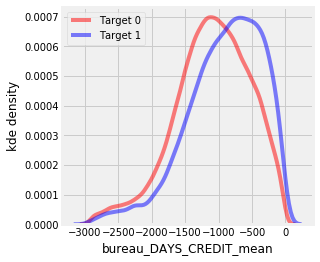

            TARGET_0      TARGET_1
count  243123.000000  20368.000000
mean    -1097.677429   -908.412036
std       561.419326    556.700978
min     -2922.000000  -2922.000000
25%     -1446.500000  -1247.281250
50%     -1067.000000   -835.333333
75%      -683.126984   -476.958333
max         0.000000     -4.000000


In [292]:
var = 'bureau_DAYS_CREDIT_mean'
sns.kdeplot(train.loc[train['TARGET'] == 0, var], label = 'Target 0', color='red', alpha=0.5)
sns.kdeplot(train.loc[train['TARGET'] == 1, var], label = 'Target 1', color='blue', alpha=0.5)
plt.xlabel(var)
plt.ylabel('kde density')
#plt.yscale('log')
plt.grid(True)
plt.rcParams['figure.figsize'] = 4,4
plt.show()

# Statistical summary
# with target '0'
target_0_des = train.loc[train['TARGET'] == 0, var].describe().rename('TARGET_0')
#print('Target 0:', target_0_des)
# with target '1'
target_1_des = train.loc[train['TARGET'] == 1, var].describe().rename('TARGET_1')
#print('Target 1:', target_1_des)
print(pd.concat([target_0_des, target_1_des], axis=1))

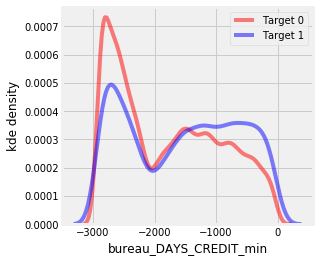

            TARGET_0      TARGET_1
count  243123.000000  20368.000000
mean    -1781.189752  -1537.790848
std       858.405931    896.550237
min     -2922.000000  -2922.000000
25%     -2591.000000  -2441.000000
50%     -1861.000000  -1469.000000
75%     -1063.000000   -748.000000
max         0.000000     -4.000000


In [299]:
# bureau_DAYS_CREDIT_min
var = 'bureau_DAYS_CREDIT_min'
sns.kdeplot(train.loc[train['TARGET'] == 0, var], label = 'Target 0', color='red', alpha=0.5)
sns.kdeplot(train.loc[train['TARGET'] == 1, var], label = 'Target 1', color='blue', alpha=0.5)
plt.xlabel(var)
plt.ylabel('kde density')
#plt.yscale('log')
plt.grid(True)
plt.rcParams['figure.figsize'] = 4,4
plt.show()

# Statistical summary
# with target '0'
target_0_des = train.loc[train['TARGET'] == 0, var].describe().rename('TARGET_0')
#print('Target 0:', target_0_des)
# with target '1'
target_1_des = train.loc[train['TARGET'] == 1, var].describe().rename('TARGET_1')
#print('Target 1:', target_1_des)
print(pd.concat([target_0_des, target_1_des], axis=1))

In [304]:
# Dealing with missing value
for column in columns:
    
    #var_n = columns[2]
    print('Float variable name:', column)
    # % missing value
    print('% missing value', train[column].isnull().sum()/len(train[column]) * 100)

Float variable name: SK_ID_CURR
% missing value 0.0
Float variable name: bureau_DAYS_CREDIT_count
% missing value 14.314935075493235
Float variable name: bureau_DAYS_CREDIT_mean
% missing value 14.314935075493235
Float variable name: bureau_DAYS_CREDIT_max
% missing value 14.314935075493235
Float variable name: bureau_DAYS_CREDIT_min
% missing value 14.314935075493235
Float variable name: bureau_DAYS_CREDIT_sum
% missing value 14.314935075493235
Float variable name: bureau_CREDIT_DAY_OVERDUE_count
% missing value 14.314935075493235
Float variable name: bureau_CREDIT_DAY_OVERDUE_mean
% missing value 14.314935075493235
Float variable name: bureau_CREDIT_DAY_OVERDUE_max
% missing value 14.314935075493235
Float variable name: bureau_CREDIT_DAY_OVERDUE_min
% missing value 14.314935075493235
Float variable name: bureau_CREDIT_DAY_OVERDUE_sum
% missing value 14.314935075493235
Float variable name: bureau_DAYS_CREDIT_ENDDATE_count
% missing value 14.314935075493235
Float variable name: bureau_

In [ ]:
obj = train.select_dtypes('object') # selcting only categorical variable
obj_uni = obj.apply(pd.Series.nunique, axis=0) # unique values in category
print('\nUnique values in categorical variables are:\n', obj_uni.sort_values())


Should we consider median for all of them?

### Variable type: Categorical 
Dealing with categorical variables.

In [313]:
bureau.select_dtypes('category').head()

,CREDIT_ACTIVE,CREDIT_CURRENCY,CREDIT_TYPE
0,Closed,currency 1,Consumer credit
1,Active,currency 1,Credit card
2,Active,currency 1,Consumer credit
3,Active,currency 1,Credit card
4,Active,currency 1,Consumer credit


In [314]:
categorical = pd.get_dummies(bureau.select_dtypes('category'))
categorical['SK_ID_CURR'] = bureau['SK_ID_CURR']
categorical.head()


,CREDIT_ACTIVE_Active,CREDIT_ACTIVE_Bad debt,CREDIT_ACTIVE_Closed,CREDIT_ACTIVE_Sold,CREDIT_CURRENCY_currency 1,CREDIT_CURRENCY_currency 2,CREDIT_CURRENCY_currency 3,CREDIT_CURRENCY_currency 4,CREDIT_TYPE_Another type of loan,CREDIT_TYPE_Car loan,...,CREDIT_TYPE_Loan for business development,CREDIT_TYPE_Loan for purchase of shares (margin lending),CREDIT_TYPE_Loan for the purchase of equipment,CREDIT_TYPE_Loan for working capital replenishment,CREDIT_TYPE_Microloan,CREDIT_TYPE_Mobile operator loan,CREDIT_TYPE_Mortgage,CREDIT_TYPE_Real estate loan,CREDIT_TYPE_Unknown type of loan,SK_ID_CURR
0,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,215354
1,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,215354
2,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,215354
3,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,215354
4,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,215354


In [316]:
categorical_grouped = categorical.groupby('SK_ID_CURR').agg(['sum', 'mean'])
categorical_grouped.head()

CREDIT_ACTIVE_Active           CREDIT_ACTIVE_Bad debt       \
                            sum      mean                    sum mean   
SK_ID_CURR                                                              
100001                        3  0.428571                      0  0.0   
100002                        2  0.250000                      0  0.0   
100003                        1  0.250000                      0  0.0   
100004                        0  0.000000                      0  0.0   
100005                        2  0.666667                      0  0.0   

           CREDIT_ACTIVE_Closed           CREDIT_ACTIVE_Sold       \
                            sum      mean                sum mean   
SK_ID_CURR                                                          
100001                        4  0.571429                  0  0.0   
100002                        6  0.750000                  0  0.0   
100003                        3  0.750000                  0  0.0   
100004                        2  1.000000                  0  0.0   
100005                        1  0.333333                  0  0.0   

           CREDIT_CURRENCY_currency 1      ...  CREDIT_TYPE_Microloan       \
                                  sum mean ...                    sum mean   
SK_ID_CURR                                 ...                               
100001                              7  1.0 ...                      0  0.0   
100002                              8  1.0 ...                      0  0.0   
100003                              4  1.0 ...                      0  0.0   
100004                              2  1.0 ...                      0  0.0   
100005                              3  1.0 ...                      0  0.0   

           CREDIT_TYPE_Mobile operator loan      CREDIT_TYPE_Mortgage       \
                                        sum mean                  sum mean   
SK_ID_CURR                                                                   
100001                                    0  0.0                    0  0.0   
100002                                    0  0.0                    0  0.0   
100003                                    0  0.0                    0  0.0   
100004                                    0  0.0                    0  0.0   
100005                                    0  0.0                    0  0.0   

           CREDIT_TYPE_Real estate loan      CREDIT_TYPE_Unknown type of loan  \
                                    sum mean                              sum   
SK_ID_CURR                                                                      
100001                                0  0.0                                0   
100002                                0  0.0                                0   
100003                                0  0.0                                0   
100004                                0  0.0                                0   
100005                                0  0.0                                0   

                 
           mean  
SK_ID_CURR       
100001      0.0  
100002      0.0  
100003      0.0  
100004      0.0  
100005      0.0  

[5 rows x 46 columns]

 Again multilevel columns are generated which we need to collapse. For categorical variables sum means count of that category, and mean is the normalized count.

In [317]:
variables = categorical_grouped.columns.levels[0] # ['DAYS_CREDIT', 'CREDIT_DAY_OVERDUE', 'DAYS_CREDIT_ENDDATE', etc.
add_stat = ['count', 'count_norm']

group_var = 'SK_ID_CURR'
columns = []

# Iterate through the variables names
for var in variables:
    # Skip the grouping variable
    if var != group_var:
        # Iterate through the stat names
        for stat in add_stat:
            # Make a new column name for the variable and stat
            columns.append('%s_%s' % (var, stat))

#  Rename the columns
categorical_grouped.columns = columns

categorical_grouped.head()

,CREDIT_ACTIVE_Active_count,CREDIT_ACTIVE_Active_count_norm,CREDIT_ACTIVE_Bad debt_count,CREDIT_ACTIVE_Bad debt_count_norm,CREDIT_ACTIVE_Closed_count,CREDIT_ACTIVE_Closed_count_norm,CREDIT_ACTIVE_Sold_count,CREDIT_ACTIVE_Sold_count_norm,CREDIT_CURRENCY_currency 1_count,CREDIT_CURRENCY_currency 1_count_norm,...,CREDIT_TYPE_Microloan_count,CREDIT_TYPE_Microloan_count_norm,CREDIT_TYPE_Mobile operator loan_count,CREDIT_TYPE_Mobile operator loan_count_norm,CREDIT_TYPE_Mortgage_count,CREDIT_TYPE_Mortgage_count_norm,CREDIT_TYPE_Real estate loan_count,CREDIT_TYPE_Real estate loan_count_norm,CREDIT_TYPE_Unknown type of loan_count,CREDIT_TYPE_Unknown type of loan_count_norm
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100001,3,0.428571,0,0.0,4,0.571429,0,0.0,7,1.0,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
100002,2,0.250000,0,0.0,6,0.750000,0,0.0,8,1.0,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
100003,1,0.250000,0,0.0,3,0.750000,0,0.0,4,1.0,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
100004,0,0.000000,0,0.0,2,1.000000,0,0.0,2,1.0,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
100005,2,0.666667,0,0.0,1,0.333333,0,0.0,3,1.0,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0


In [318]:
# merge with train data
train = train.merge(categorical_grouped, left_on = 'SK_ID_CURR', right_index = True, how = 'left')
train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,CREDIT_TYPE_Microloan_count,CREDIT_TYPE_Microloan_count_norm,CREDIT_TYPE_Mobile operator loan_count,CREDIT_TYPE_Mobile operator loan_count_norm,CREDIT_TYPE_Mortgage_count,CREDIT_TYPE_Mortgage_count_norm,CREDIT_TYPE_Real estate loan_count,CREDIT_TYPE_Real estate loan_count_norm,CREDIT_TYPE_Unknown type of loan_count,CREDIT_TYPE_Unknown type of loan_count_norm
0,100002,True,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,100003,False,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,False,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,False,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,False,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [319]:
# List of new correlations
new_corrs = []

for col in columns:
    # Calculate correlation with the target
    corr = train['TARGET'].corr(train[col])
    new_corrs.append((col, corr))
new_corrs = sorted(new_corrs, key = lambda x: abs(x[1]), reverse = True)
new_corrs[:15]

[('CREDIT_ACTIVE_Closed_count_norm', -0.0793688740888962),
 ('CREDIT_ACTIVE_Active_count_norm', 0.0773557795854437),
 ('CREDIT_ACTIVE_Active_count', 0.06712815345642874),
 ('CREDIT_TYPE_Microloan_count_norm', 0.04443943809087858),
 ('CREDIT_TYPE_Credit card_count', 0.034817819905382213),
 ('CREDIT_TYPE_Credit card_count_norm', 0.03468405774232269),
 ('CREDIT_TYPE_Microloan_count', 0.034110498274215695),
 ('CREDIT_ACTIVE_Closed_count', -0.030812408184358753),
 ('CREDIT_TYPE_Consumer credit_count_norm', -0.026258496023451722),
 ('CREDIT_TYPE_Mortgage_count', -0.023306648977252636),
 ('CREDIT_TYPE_Mortgage_count_norm', -0.02086745745636145),
 ('CREDIT_TYPE_Car loan_count', -0.020816695387449097),
 ('CREDIT_TYPE_Car loan_count_norm', -0.020134386805691875),
 ('CREDIT_ACTIVE_Sold_count_norm', 0.016530032076332024),
 ('CREDIT_ACTIVE_Sold_count', 0.012057565591670006)]

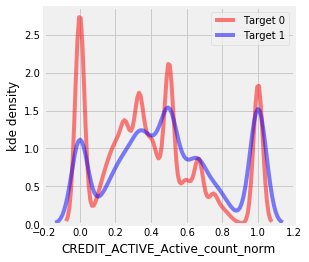

            TARGET_0      TARGET_1
count  243123.000000  20368.000000
mean        0.406067      0.495395
std         0.306644      0.317295
min         0.000000      0.000000
25%         0.181818      0.266667
50%         0.363636      0.500000
75%         0.571429      0.700000
max         1.000000      1.000000


In [321]:
# bureau_DAYS_CREDIT_min
var = 'CREDIT_ACTIVE_Active_count_norm'
sns.kdeplot(train.loc[train['TARGET'] == 0, var], label = 'Target 0', color='red', alpha=0.5)
sns.kdeplot(train.loc[train['TARGET'] == 1, var], label = 'Target 1', color='blue', alpha=0.5)
plt.xlabel(var)
plt.ylabel('kde density')
#plt.yscale('log')
plt.grid(True)
plt.rcParams['figure.figsize'] = 4,4
plt.show()

# Statistical summary
# with target '0'
target_0_des = train.loc[train['TARGET'] == 0, var].describe().rename('TARGET_0')
#print('Target 0:', target_0_des)
# with target '1'
target_1_des = train.loc[train['TARGET'] == 1, var].describe().rename('TARGET_1')
#print('Target 1:', target_1_des)
print(pd.concat([target_0_des, target_1_des], axis=1))

In [323]:
categorical_grouped_h = categorical_grouped.head(20)
filepath1 = "C:/Users/manas/Desktop/Springboard/Capstone ideas/Home credit default risk/bureau_cat_columns.csv"
categorical_grouped_h.to_csv(filepath1, header='variable', index=True, index_label='#')

These correlations with categorical variables are really weak.

In [327]:
# Dealing with missing value
for column in columns:
    
    #var_n = columns[2]
    print('categorical variable name:', column)
    # % missing value
    print('% missing value', train[column].isnull().sum()/len(train[column]) * 100)
    #print(train[column].apply(pd.Series.nunique))

categorical variable name: CREDIT_ACTIVE_Active_count
% missing value 14.314935075493235
categorical variable name: CREDIT_ACTIVE_Active_count_norm
% missing value 14.314935075493235
categorical variable name: CREDIT_ACTIVE_Bad debt_count
% missing value 14.314935075493235
categorical variable name: CREDIT_ACTIVE_Bad debt_count_norm
% missing value 14.314935075493235
categorical variable name: CREDIT_ACTIVE_Closed_count
% missing value 14.314935075493235
categorical variable name: CREDIT_ACTIVE_Closed_count_norm
% missing value 14.314935075493235
categorical variable name: CREDIT_ACTIVE_Sold_count
% missing value 14.314935075493235
categorical variable name: CREDIT_ACTIVE_Sold_count_norm
% missing value 14.314935075493235
categorical variable name: CREDIT_CURRENCY_currency 1_count
% missing value 14.314935075493235
categorical variable name: CREDIT_CURRENCY_currency 1_count_norm
% missing value 14.314935075493235
categorical variable name: CREDIT_CURRENCY_currency 2_count
% missing val

The missing value is same for all. What should we fill it with?

## Table: bureau Balance
from default risk_ bureau

In [459]:
bureau_bal = pd.read_csv(path + files[3])
bureau_bal.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [389]:
print('Variable types are:\n', bureau_bal.dtypes.value_counts()) # variable type: integer, float, categorical

Variable types are:
 int64     2
object    1
dtype: int64


In [461]:
# missing values
df = bureau_bal
print('Total number of variables:', df.shape[1])
miss_val = df.isnull().sum() # number of missing value in each col
miss_val = miss_val.sort_values(ascending=False) # sorting from max to min
miss_list = list(miss_val)
ind = miss_list.index(0)
miss_var = miss_val[0:ind] # only variables with missing values
print('Out of', df.shape[1], ', number of variables with missing values:', ind)

percent_miss = miss_var/len(df) * 100 # percent missing value for each variable
print('\n% data missing\n', percent_miss)    

Total number of variables: 3
Out of 3 , number of variables with missing values: 0

% data missing
 Series([], dtype: float64)


In [460]:
convert_types(bureau_bal, print_info=True)

Original Memory Usage: 0.66 gb.
New Memory Usage: 0.35 gb.


,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C
5,5715448,-5,C
6,5715448,-6,C
7,5715448,-7,C
8,5715448,-8,C
9,5715448,-9,0


For each SK_ID_BUREAU there are multiple records and corresponding status. We first group by SK_ID_BUREAU (each loan) and then for each client (SK_ID_CURR).

In [383]:
#missing values
for col in columns:
    print('Float variable name:', col)
    # % missing value
    print('% missing value', train[col].isnull().sum()/len(train[col]) * 100)


Float variable name: SK_ID_CURR
% missing value 0.0
Float variable name: bureau_MONTHS_BALANCE_count
% missing value 70.0072517731073
Float variable name: bureau_MONTHS_BALANCE_mean
% missing value 70.0072517731073
Float variable name: bureau_MONTHS_BALANCE_max
% missing value 70.0072517731073
Float variable name: bureau_MONTHS_BALANCE_min
% missing value 70.0072517731073
Float variable name: bureau_MONTHS_BALANCE_sum
% missing value 70.0072517731073


In [391]:
def count_categorical(df, group_var, df_name):
    # Select the categorical columns
    categorical = pd.get_dummies(df.select_dtypes('category'))

    # Make sure to put the identifying id on the column
    categorical[group_var] = df[group_var]

    # Groupby the group var and calculate the sum and mean
    categorical = categorical.groupby(group_var).agg(['sum', 'mean'])
    
    column_names = []
    
    # Iterate through the columns in level 0
    for var in categorical.columns.levels[0]:
        # Iterate through the stats in level 1
        for stat in ['count', 'count_norm']:
            # Make a new column name
            column_names.append('%s_%s_%s' % (df_name, var, stat))
    
    categorical.columns = column_names
    
    return categorical

In [394]:
# for categorical variable: STATUS
# Counts of each type of status for each previous loan
bureau_balance_counts = count_categorical(bureau_bal, group_var = 'SK_ID_BUREAU', df_name = 'bureau_balance')
#bureau_balance_counts = bureau_balance_counts.reset_index(inplace=True)
bureau_balance_counts.head()

,bureau_balance_STATUS_0_count,bureau_balance_STATUS_0_count_norm,bureau_balance_STATUS_1_count,bureau_balance_STATUS_1_count_norm,bureau_balance_STATUS_2_count,bureau_balance_STATUS_2_count_norm,bureau_balance_STATUS_3_count,bureau_balance_STATUS_3_count_norm,bureau_balance_STATUS_4_count,bureau_balance_STATUS_4_count_norm,bureau_balance_STATUS_5_count,bureau_balance_STATUS_5_count_norm,bureau_balance_STATUS_C_count,bureau_balance_STATUS_C_count_norm,bureau_balance_STATUS_X_count,bureau_balance_STATUS_X_count_norm
SK_ID_BUREAU,,,,,,,,,,,,,,,,
5001709,0,0.000000,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,86,0.886598,11,0.113402
5001710,5,0.060241,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,48,0.578313,30,0.361446
5001711,3,0.750000,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.000000,1,0.250000
5001712,10,0.526316,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,9,0.473684,0,0.000000
5001713,0,0.000000,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.000000,22,1.000000


In [395]:
bureau_balance_counts.reset_index(inplace=True)

In [396]:
bureau_balance_counts.head()

,SK_ID_BUREAU,bureau_balance_STATUS_0_count,bureau_balance_STATUS_0_count_norm,bureau_balance_STATUS_1_count,bureau_balance_STATUS_1_count_norm,bureau_balance_STATUS_2_count,bureau_balance_STATUS_2_count_norm,bureau_balance_STATUS_3_count,bureau_balance_STATUS_3_count_norm,bureau_balance_STATUS_4_count,bureau_balance_STATUS_4_count_norm,bureau_balance_STATUS_5_count,bureau_balance_STATUS_5_count_norm,bureau_balance_STATUS_C_count,bureau_balance_STATUS_C_count_norm,bureau_balance_STATUS_X_count,bureau_balance_STATUS_X_count_norm
0,5001709,0,0.000000,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,86,0.886598,11,0.113402
1,5001710,5,0.060241,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,48,0.578313,30,0.361446
2,5001711,3,0.750000,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.000000,1,0.250000
3,5001712,10,0.526316,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,9,0.473684,0,0.000000
4,5001713,0,0.000000,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.000000,22,1.000000


In [397]:
# for numeric variables
def agg_numeric(df, group_var, df_name):
   
    # Remove id variables other than grouping variable
    for col in df:
        if col != group_var and 'SK_ID' in col:
            df = df.drop(columns = col)
            
    group_ids = df[group_var]
    numeric_df = df.select_dtypes('number')
    numeric_df[group_var] = group_ids

    # Group by the specified variable and calculate the statistics
    agg = numeric_df.groupby(group_var).agg(['count', 'mean', 'max', 'min', 'sum']).reset_index()

    # Need to create new column names
    columns = [group_var]

    # Iterate through the variables names
    for var in agg.columns.levels[0]:
        # Skip the grouping variable
        if var != group_var:
            # Iterate through the stat names
            for stat in agg.columns.levels[1][:-1]:
                # Make a new column name for the variable and stat
                columns.append('%s_%s_%s' % (df_name, var, stat))

    agg.columns = columns
    return agg

In [398]:
## numeric column MONTH_BALANCE
# Calculate value count statistics for each `SK_ID_CURR` 
bureau_balance_agg = agg_numeric(bureau_bal, group_var = 'SK_ID_BUREAU', df_name = 'bureau_balance')
bureau_balance_agg.head()

,SK_ID_BUREAU,bureau_balance_MONTHS_BALANCE_count,bureau_balance_MONTHS_BALANCE_mean,bureau_balance_MONTHS_BALANCE_max,bureau_balance_MONTHS_BALANCE_min,bureau_balance_MONTHS_BALANCE_sum
0,5001709,97,-48.0,0,-96,-4656
1,5001710,83,-41.0,0,-82,-3403
2,5001711,4,-1.5,0,-3,-6
3,5001712,19,-9.0,0,-18,-171
4,5001713,22,-10.5,0,-21,-231


In [399]:
# merging bureau_balance_agg and bureau_balance_count
bureau_by_loan_ = bureau_balance_agg.merge(bureau_balance_counts, on = 'SK_ID_BUREAU', how = 'outer')


In [400]:
bureau_by_loan_.head()

,SK_ID_BUREAU,bureau_balance_MONTHS_BALANCE_count,bureau_balance_MONTHS_BALANCE_mean,bureau_balance_MONTHS_BALANCE_max,bureau_balance_MONTHS_BALANCE_min,bureau_balance_MONTHS_BALANCE_sum,bureau_balance_STATUS_0_count,bureau_balance_STATUS_0_count_norm,bureau_balance_STATUS_1_count,bureau_balance_STATUS_1_count_norm,...,bureau_balance_STATUS_3_count,bureau_balance_STATUS_3_count_norm,bureau_balance_STATUS_4_count,bureau_balance_STATUS_4_count_norm,bureau_balance_STATUS_5_count,bureau_balance_STATUS_5_count_norm,bureau_balance_STATUS_C_count,bureau_balance_STATUS_C_count_norm,bureau_balance_STATUS_X_count,bureau_balance_STATUS_X_count_norm
0,5001709,97,-48.0,0,-96,-4656,0,0.000000,0,0.0,...,0,0.0,0,0.0,0,0.0,86,0.886598,11,0.113402
1,5001710,83,-41.0,0,-82,-3403,5,0.060241,0,0.0,...,0,0.0,0,0.0,0,0.0,48,0.578313,30,0.361446
2,5001711,4,-1.5,0,-3,-6,3,0.750000,0,0.0,...,0,0.0,0,0.0,0,0.0,0,0.000000,1,0.250000
3,5001712,19,-9.0,0,-18,-171,10,0.526316,0,0.0,...,0,0.0,0,0.0,0,0.0,9,0.473684,0,0.000000
4,5001713,22,-10.5,0,-21,-231,0,0.000000,0,0.0,...,0,0.0,0,0.0,0,0.0,0,0.000000,22,1.000000


Now we need to include SK_ID_BUREAU and SK_ID_CURR from bureau to merge with train using SK_ID_CURR.

In [401]:
bureau_by_loan = bureau_by_loan_.merge(bureau[['SK_ID_BUREAU', 'SK_ID_CURR']], on = 'SK_ID_BUREAU', how = 'left')
bureau_by_loan.head()

,SK_ID_BUREAU,bureau_balance_MONTHS_BALANCE_count,bureau_balance_MONTHS_BALANCE_mean,bureau_balance_MONTHS_BALANCE_max,bureau_balance_MONTHS_BALANCE_min,bureau_balance_MONTHS_BALANCE_sum,bureau_balance_STATUS_0_count,bureau_balance_STATUS_0_count_norm,bureau_balance_STATUS_1_count,bureau_balance_STATUS_1_count_norm,...,bureau_balance_STATUS_3_count_norm,bureau_balance_STATUS_4_count,bureau_balance_STATUS_4_count_norm,bureau_balance_STATUS_5_count,bureau_balance_STATUS_5_count_norm,bureau_balance_STATUS_C_count,bureau_balance_STATUS_C_count_norm,bureau_balance_STATUS_X_count,bureau_balance_STATUS_X_count_norm,SK_ID_CURR
0,5001709,97,-48.0,0,-96,-4656,0,0.000000,0,0.0,...,0.0,0,0.0,0,0.0,86,0.886598,11,0.113402,NaN
1,5001710,83,-41.0,0,-82,-3403,5,0.060241,0,0.0,...,0.0,0,0.0,0,0.0,48,0.578313,30,0.361446,162368.0
2,5001711,4,-1.5,0,-3,-6,3,0.750000,0,0.0,...,0.0,0,0.0,0,0.0,0,0.000000,1,0.250000,162368.0
3,5001712,19,-9.0,0,-18,-171,10,0.526316,0,0.0,...,0.0,0,0.0,0,0.0,9,0.473684,0,0.000000,162368.0
4,5001713,22,-10.5,0,-21,-231,0,0.000000,0,0.0,...,0.0,0,0.0,0,0.0,0,0.000000,22,1.000000,150635.0


In [402]:
bureau_balance_by_client = agg_numeric(bureau_by_loan.drop(columns = ['SK_ID_BUREAU']), group_var = 'SK_ID_CURR', df_name = 'client')
bureau_balance_by_client.head()

,SK_ID_CURR,client_bureau_balance_MONTHS_BALANCE_count_count,client_bureau_balance_MONTHS_BALANCE_count_mean,client_bureau_balance_MONTHS_BALANCE_count_max,client_bureau_balance_MONTHS_BALANCE_count_min,client_bureau_balance_MONTHS_BALANCE_count_sum,client_bureau_balance_MONTHS_BALANCE_mean_count,client_bureau_balance_MONTHS_BALANCE_mean_mean,client_bureau_balance_MONTHS_BALANCE_mean_max,client_bureau_balance_MONTHS_BALANCE_mean_min,...,client_bureau_balance_STATUS_X_count_count,client_bureau_balance_STATUS_X_count_mean,client_bureau_balance_STATUS_X_count_max,client_bureau_balance_STATUS_X_count_min,client_bureau_balance_STATUS_X_count_sum,client_bureau_balance_STATUS_X_count_norm_count,client_bureau_balance_STATUS_X_count_norm_mean,client_bureau_balance_STATUS_X_count_norm_max,client_bureau_balance_STATUS_X_count_norm_min,client_bureau_balance_STATUS_X_count_norm_sum
0,100001.0,7,24.571429,52,2,172,7,-11.785714,-0.5,-25.5,...,7,4.285714,9,0,30.0,7,0.214590,0.500000,0.0,1.502129
1,100002.0,8,13.750000,22,4,110,8,-21.875000,-1.5,-39.5,...,8,1.875000,3,0,15.0,8,0.161932,0.500000,0.0,1.295455
2,100005.0,3,7.000000,13,3,21,3,-3.000000,-1.0,-6.0,...,3,0.666667,1,0,2.0,3,0.136752,0.333333,0.0,0.410256
3,100010.0,2,36.000000,36,36,72,2,-46.000000,-19.5,-72.5,...,2,0.000000,0,0,0.0,2,0.000000,0.000000,0.0,0.000000
4,100013.0,4,57.500000,69,40,230,4,-28.250000,-19.5,-34.0,...,4,10.250000,40,0,41.0,4,0.254545,1.000000,0.0,1.018182


In [403]:
train = train.merge(bureau_balance_by_client, on = 'SK_ID_CURR', how = 'left')
print('Training data shape:', train.shape)
train.head()

Training data shape: (307511, 331)


,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,client_bureau_balance_STATUS_X_count_count,client_bureau_balance_STATUS_X_count_mean,client_bureau_balance_STATUS_X_count_max,client_bureau_balance_STATUS_X_count_min,client_bureau_balance_STATUS_X_count_sum,client_bureau_balance_STATUS_X_count_norm_count,client_bureau_balance_STATUS_X_count_norm_mean,client_bureau_balance_STATUS_X_count_norm_max,client_bureau_balance_STATUS_X_count_norm_min,client_bureau_balance_STATUS_X_count_norm_sum
0,True,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,8.0,1.875,3.0,0.0,15.0,8.0,0.161932,0.5,0.0,1.295455
1,False,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,False,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,False,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,False,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [404]:
columns = bureau_balance_by_client.columns
columns

Index(['SK_ID_CURR', 'client_bureau_balance_MONTHS_BALANCE_count_count',
       'client_bureau_balance_MONTHS_BALANCE_count_mean',
       'client_bureau_balance_MONTHS_BALANCE_count_max',
       'client_bureau_balance_MONTHS_BALANCE_count_min',
       'client_bureau_balance_MONTHS_BALANCE_count_sum',
       'client_bureau_balance_MONTHS_BALANCE_mean_count',
       'client_bureau_balance_MONTHS_BALANCE_mean_mean',
       'client_bureau_balance_MONTHS_BALANCE_mean_max',
       'client_bureau_balance_MONTHS_BALANCE_mean_min',
       ...
       'client_bureau_balance_STATUS_X_count_count',
       'client_bureau_balance_STATUS_X_count_mean',
       'client_bureau_balance_STATUS_X_count_max',
       'client_bureau_balance_STATUS_X_count_min',
       'client_bureau_balance_STATUS_X_count_sum',
       'client_bureau_balance_STATUS_X_count_norm_count',
       'client_bureau_balance_STATUS_X_count_norm_mean',
       'client_bureau_balance_STATUS_X_count_norm_max',
       'client_bureau_balance_S

In [413]:
# List of new correlations
new_corrs = []
columns = columns[1:]
for col in columns:
    # Calculate correlation with the target
    print(col)
    print(train['TARGET'].corr(train[col]))

client_bureau_balance_MONTHS_BALANCE_count_mean
-0.08019279487546796
client_bureau_balance_MONTHS_BALANCE_count_max
-0.06879166105216326
client_bureau_balance_MONTHS_BALANCE_count_min
-0.048224298542968204
client_bureau_balance_MONTHS_BALANCE_count_sum
-0.04403305771539233
client_bureau_balance_MONTHS_BALANCE_mean_count
0.006052938936887098
client_bureau_balance_MONTHS_BALANCE_mean_mean
0.0764244907670593
client_bureau_balance_MONTHS_BALANCE_mean_max
0.04395577022854323
client_bureau_balance_MONTHS_BALANCE_mean_min
0.0538160732037784
client_bureau_balance_MONTHS_BALANCE_mean_sum
0.03569760518433606
client_bureau_balance_MONTHS_BALANCE_max_count
0.006052938936887098
client_bureau_balance_MONTHS_BALANCE_max_mean
0.022709812671648608
client_bureau_balance_MONTHS_BALANCE_max_max
0.005119414108034925
client_bureau_balance_MONTHS_BALANCE_max_min
0.020335568911815993
client_bureau_balance_MONTHS_BALANCE_max_sum
0.012718985022823447
client_bureau_balance_MONTHS_BALANCE_min_count
0.006052938936

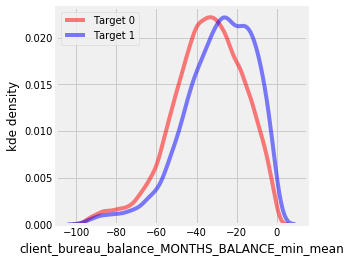

           TARGET_0     TARGET_1
count  84721.000000  7510.000000
mean     -34.695690   -28.895740
std       17.764441    17.519027
min      -96.000000   -95.000000
25%      -45.666667   -39.500000
50%      -33.666667   -27.000000
75%      -21.714286   -15.333333
max        0.000000     0.000000


In [414]:
# bureau_DAYS_CREDIT_min
var = 'client_bureau_balance_MONTHS_BALANCE_min_mean'
sns.kdeplot(train.loc[train['TARGET'] == 0, var], label = 'Target 0', color='red', alpha=0.5)
sns.kdeplot(train.loc[train['TARGET'] == 1, var], label = 'Target 1', color='blue', alpha=0.5)
plt.xlabel(var)
plt.ylabel('kde density')
#plt.yscale('log')
plt.grid(True)
plt.rcParams['figure.figsize'] = 4,4
plt.show()

# Statistical summary
# with target '0'
target_0_des = train.loc[train['TARGET'] == 0, var].describe().rename('TARGET_0')
#print('Target 0:', target_0_des)
# with target '1'
target_1_des = train.loc[train['TARGET'] == 1, var].describe().rename('TARGET_1')
#print('Target 1:', target_1_des)
print(pd.concat([target_0_des, target_1_des], axis=1))

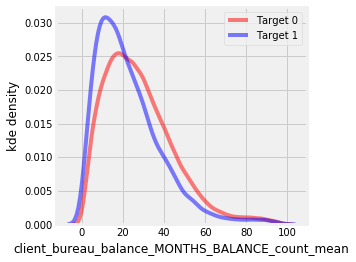

           TARGET_0     TARGET_1
count  84721.000000  7510.000000
mean      27.879011    22.944792
std       16.847241    15.918697
min        1.000000     1.000000
25%       15.166667    11.000000
50%       25.142857    19.333333
75%       37.375000    31.000000
max       97.000000    96.000000


In [415]:
# bureau_DAYS_CREDIT_min
var = 'client_bureau_balance_MONTHS_BALANCE_count_mean'
sns.kdeplot(train.loc[train['TARGET'] == 0, var], label = 'Target 0', color='red', alpha=0.5)
sns.kdeplot(train.loc[train['TARGET'] == 1, var], label = 'Target 1', color='blue', alpha=0.5)
plt.xlabel(var)
plt.ylabel('kde density')
#plt.yscale('log')
plt.grid(True)
plt.rcParams['figure.figsize'] = 4,4
plt.show()

# Statistical summary
# with target '0'
target_0_des = train.loc[train['TARGET'] == 0, var].describe().rename('TARGET_0')
#print('Target 0:', target_0_des)
# with target '1'
target_1_des = train.loc[train['TARGET'] == 1, var].describe().rename('TARGET_1')
#print('Target 1:', target_1_des)
print(pd.concat([target_0_des, target_1_des], axis=1))

As we are going to in similar way with other tables as well. We will create functions for repeated use.

In [422]:
import sys
def return_size(df):
    """Return size of dataframe in gigabytes"""
    return round(sys.getsizeof(df) / 1e9, 2)

def convert_types(df, print_info = False):
    
    original_memory = df.memory_usage().sum()
    
    # Iterate through each column
    for c in df:
        
        # Convert ids and booleans to integers
        if ('SK_ID' in c):
            df[c] = df[c].fillna(0).astype(np.int32)
            
        # Convert objects to category
        elif (df[c].dtype == 'object') and (df[c].nunique() < df.shape[0]):
            df[c] = df[c].astype('category')
        
        # Booleans mapped to integers
        elif list(df[c].unique()) == [1, 0]:
            df[c] = df[c].astype(bool)
        
        # Float64 to float32
        elif df[c].dtype == float:
            df[c] = df[c].astype(np.float32)
            
        # Int64 to int32
        elif df[c].dtype == int:
            df[c] = df[c].astype(np.int32)
        
    new_memory = df.memory_usage().sum()
    
    if print_info:
        print(f'Original Memory Usage: {round(original_memory / 1e9, 2)} gb.')
        print(f'New Memory Usage: {round(new_memory / 1e9, 2)} gb.')
        
    return df


In [462]:
previous = pd.read_csv(path + files[8])
previous = convert_types(previous, print_info=True)
previous.head()

Original Memory Usage: 0.49 gb.
New Memory Usage: 0.18 gb.


,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430054,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615234,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735352,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335938,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.394531,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [463]:
# missing values
df = previous
print('Total number of variables:', df.shape[1])
miss_val = df.isnull().sum() # number of missing value in each col
miss_val = miss_val.sort_values(ascending=False) # sorting from max to min
miss_list = list(miss_val)
ind = miss_list.index(0)
miss_var = miss_val[0:ind] # only variables with missing values
print('Out of', df.shape[1], ', number of variables with missing values:', ind)

percent_miss = miss_var/len(df) * 100 # percent missing value for each variable
print('\n% data missing\n', percent_miss)    

Total number of variables: 37
Out of 37 , number of variables with missing values: 16

% data missing
 RATE_INTEREST_PRIVILEGED     99.643698
RATE_INTEREST_PRIMARY        99.643698
RATE_DOWN_PAYMENT            53.636480
AMT_DOWN_PAYMENT             53.636480
NAME_TYPE_SUITE              49.119754
DAYS_TERMINATION             40.298129
NFLAG_INSURED_ON_APPROVAL    40.298129
DAYS_FIRST_DRAWING           40.298129
DAYS_FIRST_DUE               40.298129
DAYS_LAST_DUE_1ST_VERSION    40.298129
DAYS_LAST_DUE                40.298129
AMT_GOODS_PRICE              23.081773
AMT_ANNUITY                  22.286665
CNT_PAYMENT                  22.286366
PRODUCT_COMBINATION           0.020716
AMT_CREDIT                    0.000060
dtype: float64


In [424]:
# Calculate aggregate statistics for each numeric column
previous_agg = agg_numeric(previous, 'SK_ID_CURR', 'previous')
print('Previous aggregation shape: ', previous_agg.shape)
previous_agg.head()

Previous aggregation shape:  (338857, 91)


,SK_ID_CURR,previous_AMT_ANNUITY_count,previous_AMT_ANNUITY_mean,previous_AMT_ANNUITY_max,previous_AMT_ANNUITY_min,previous_AMT_ANNUITY_sum,previous_AMT_APPLICATION_count,previous_AMT_APPLICATION_mean,previous_AMT_APPLICATION_max,previous_AMT_APPLICATION_min,...,previous_DAYS_TERMINATION_count,previous_DAYS_TERMINATION_mean,previous_DAYS_TERMINATION_max,previous_DAYS_TERMINATION_min,previous_DAYS_TERMINATION_sum,previous_NFLAG_INSURED_ON_APPROVAL_count,previous_NFLAG_INSURED_ON_APPROVAL_mean,previous_NFLAG_INSURED_ON_APPROVAL_max,previous_NFLAG_INSURED_ON_APPROVAL_min,previous_NFLAG_INSURED_ON_APPROVAL_sum
0,100001,1,3951.000000,3951.000000,3951.000000,3951.000000,1,24835.50,24835.5,24835.5,...,1,-1612.000000,-1612.0,-1612.0,-1612.0,1,0.000000,0.0,0.0,0.0
1,100002,1,9251.775391,9251.775391,9251.775391,9251.775391,1,179055.00,179055.0,179055.0,...,1,-17.000000,-17.0,-17.0,-17.0,1,0.000000,0.0,0.0,0.0
2,100003,3,56553.988281,98356.992188,6737.310059,169661.968750,3,435436.50,900000.0,68809.5,...,3,-1047.333374,-527.0,-1976.0,-3142.0,3,0.666667,1.0,0.0,2.0
3,100004,1,5357.250000,5357.250000,5357.250000,5357.250000,1,24282.00,24282.0,24282.0,...,1,-714.000000,-714.0,-714.0,-714.0,1,0.000000,0.0,0.0,0.0
4,100005,1,4813.200195,4813.200195,4813.200195,4813.200195,2,22308.75,44617.5,0.0,...,1,-460.000000,-460.0,-460.0,-460.0,1,0.000000,0.0,0.0,0.0


In [425]:
def agg_categorical(df, parent_var, df_name):
       
    # Select the categorical columns
    categorical = pd.get_dummies(df.select_dtypes('category'))

    # Make sure to put the identifying id on the column
    categorical[parent_var] = df[parent_var]

    # Groupby the group var and calculate the sum and mean
    categorical = categorical.groupby(parent_var).agg(['sum', 'count', 'mean'])
    
    column_names = []
    
    # Iterate through the columns in level 0
    for var in categorical.columns.levels[0]:
        # Iterate through the stats in level 1
        for stat in ['sum', 'count', 'mean']:
            # Make a new column name
            column_names.append('%s_%s_%s' % (df_name, var, stat))
    
    categorical.columns = column_names
    
    # Remove duplicate columns by values
    _, idx = np.unique(categorical, axis = 1, return_index = True)
    categorical = categorical.iloc[:, idx]
    
    return categorical

In [426]:
# Calculate value counts for each categorical column
previous_counts = agg_categorical(previous, 'SK_ID_CURR', 'previous')
print('Previous counts shape: ', previous_counts.shape)
previous_counts.head()

Previous counts shape:  (338857, 285)


,previous_NAME_GOODS_CATEGORY_Animals_mean,previous_NAME_GOODS_CATEGORY_Animals_sum,previous_NAME_GOODS_CATEGORY_House Construction_mean,previous_NAME_GOODS_CATEGORY_House Construction_sum,previous_NAME_CASH_LOAN_PURPOSE_Refusal to name the goal_mean,previous_NAME_CASH_LOAN_PURPOSE_Refusal to name the goal_sum,previous_NAME_CASH_LOAN_PURPOSE_Money for a third person_mean,previous_NAME_CASH_LOAN_PURPOSE_Money for a third person_sum,previous_NAME_CASH_LOAN_PURPOSE_Hobby_mean,previous_NAME_CASH_LOAN_PURPOSE_Hobby_sum,...,previous_CODE_REJECT_REASON_XAP_mean,previous_FLAG_LAST_APPL_PER_CONTRACT_Y_mean,previous_NAME_PORTFOLIO_POS_sum,previous_NAME_CONTRACT_TYPE_Consumer loans_sum,previous_NAME_CASH_LOAN_PURPOSE_XAP_sum,previous_NAME_PRODUCT_TYPE_XNA_sum,previous_NAME_CONTRACT_STATUS_Approved_sum,previous_CODE_REJECT_REASON_XAP_sum,previous_FLAG_LAST_APPL_PER_CONTRACT_Y_sum,previous_NAME_CONTRACT_TYPE_Cash loans_count
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100001,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,...,1.0,1.0,1,1,1,1,1,1,1,1
100002,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,...,1.0,1.0,1,1,1,1,1,1,1,1
100003,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,...,1.0,1.0,2,2,2,2,3,3,3,3
100004,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,...,1.0,1.0,1,1,1,1,1,1,1,1
100005,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,...,1.0,1.0,1,1,1,2,1,2,2,2


In [421]:
#train  = pd.read_csv(path + files[1])
#train = convert_types(train)
test = pd.read_csv(path + files[0])
test = convert_types(test)

In [427]:
previous_counts.reset_index(inplace=True)

#previous_agg.reset_index(inplace=True)
previous_agg.head()

,SK_ID_CURR,previous_AMT_ANNUITY_count,previous_AMT_ANNUITY_mean,previous_AMT_ANNUITY_max,previous_AMT_ANNUITY_min,previous_AMT_ANNUITY_sum,previous_AMT_APPLICATION_count,previous_AMT_APPLICATION_mean,previous_AMT_APPLICATION_max,previous_AMT_APPLICATION_min,...,previous_DAYS_TERMINATION_count,previous_DAYS_TERMINATION_mean,previous_DAYS_TERMINATION_max,previous_DAYS_TERMINATION_min,previous_DAYS_TERMINATION_sum,previous_NFLAG_INSURED_ON_APPROVAL_count,previous_NFLAG_INSURED_ON_APPROVAL_mean,previous_NFLAG_INSURED_ON_APPROVAL_max,previous_NFLAG_INSURED_ON_APPROVAL_min,previous_NFLAG_INSURED_ON_APPROVAL_sum
0,100001,1,3951.000000,3951.000000,3951.000000,3951.000000,1,24835.50,24835.5,24835.5,...,1,-1612.000000,-1612.0,-1612.0,-1612.0,1,0.000000,0.0,0.0,0.0
1,100002,1,9251.775391,9251.775391,9251.775391,9251.775391,1,179055.00,179055.0,179055.0,...,1,-17.000000,-17.0,-17.0,-17.0,1,0.000000,0.0,0.0,0.0
2,100003,3,56553.988281,98356.992188,6737.310059,169661.968750,3,435436.50,900000.0,68809.5,...,3,-1047.333374,-527.0,-1976.0,-3142.0,3,0.666667,1.0,0.0,2.0
3,100004,1,5357.250000,5357.250000,5357.250000,5357.250000,1,24282.00,24282.0,24282.0,...,1,-714.000000,-714.0,-714.0,-714.0,1,0.000000,0.0,0.0,0.0
4,100005,1,4813.200195,4813.200195,4813.200195,4813.200195,2,22308.75,44617.5,0.0,...,1,-460.000000,-460.0,-460.0,-460.0,1,0.000000,0.0,0.0,0.0


In [138]:
#previous_agg = previous_agg.drop(columns='index')

In [428]:
previous_agg.head()

,SK_ID_CURR,previous_AMT_ANNUITY_count,previous_AMT_ANNUITY_mean,previous_AMT_ANNUITY_max,previous_AMT_ANNUITY_min,previous_AMT_ANNUITY_sum,previous_AMT_APPLICATION_count,previous_AMT_APPLICATION_mean,previous_AMT_APPLICATION_max,previous_AMT_APPLICATION_min,...,previous_DAYS_TERMINATION_count,previous_DAYS_TERMINATION_mean,previous_DAYS_TERMINATION_max,previous_DAYS_TERMINATION_min,previous_DAYS_TERMINATION_sum,previous_NFLAG_INSURED_ON_APPROVAL_count,previous_NFLAG_INSURED_ON_APPROVAL_mean,previous_NFLAG_INSURED_ON_APPROVAL_max,previous_NFLAG_INSURED_ON_APPROVAL_min,previous_NFLAG_INSURED_ON_APPROVAL_sum
0,100001,1,3951.000000,3951.000000,3951.000000,3951.000000,1,24835.50,24835.5,24835.5,...,1,-1612.000000,-1612.0,-1612.0,-1612.0,1,0.000000,0.0,0.0,0.0
1,100002,1,9251.775391,9251.775391,9251.775391,9251.775391,1,179055.00,179055.0,179055.0,...,1,-17.000000,-17.0,-17.0,-17.0,1,0.000000,0.0,0.0,0.0
2,100003,3,56553.988281,98356.992188,6737.310059,169661.968750,3,435436.50,900000.0,68809.5,...,3,-1047.333374,-527.0,-1976.0,-3142.0,3,0.666667,1.0,0.0,2.0
3,100004,1,5357.250000,5357.250000,5357.250000,5357.250000,1,24282.00,24282.0,24282.0,...,1,-714.000000,-714.0,-714.0,-714.0,1,0.000000,0.0,0.0,0.0
4,100005,1,4813.200195,4813.200195,4813.200195,4813.200195,2,22308.75,44617.5,0.0,...,1,-460.000000,-460.0,-460.0,-460.0,1,0.000000,0.0,0.0,0.0


In [429]:
# Merge in the previous information
train = train.merge(previous_counts, on ='SK_ID_CURR', how = 'left')
train = train.merge(previous_agg, on = 'SK_ID_CURR', how = 'left')

test = test.merge(previous_counts, on ='SK_ID_CURR', how = 'left')
test = test.merge(previous_agg, on = 'SK_ID_CURR', how = 'left')

# Remove variables to free memory
gc.enable()
del previous, previous_agg, previous_counts
gc.collect()


2557

In [464]:
cash = pd.read_csv(path + files[7])
cash = convert_types(cash, print_info=True)
cash.head()

Original Memory Usage: 0.64 gb.
New Memory Usage: 0.41 gb.


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


In [466]:
# missing values
df = cash
print('Total number of variables:', df.shape[1])
miss_val = df.isnull().sum() # number of missing value in each col
miss_val = miss_val.sort_values(ascending=False) # sorting from max to min
miss_list = list(miss_val)
ind = miss_list.index(0)
miss_var = miss_val[0:ind] # only variables with missing values
print('Out of', df.shape[1], ', number of variables with missing values:', ind)

percent_miss = miss_var/len(df) * 100 # percent missing value for each variable
print('\n% data missing\n', percent_miss)    

Total number of variables: 8
Out of 8 , number of variables with missing values: 2

% data missing
 CNT_INSTALMENT_FUTURE    0.260835
CNT_INSTALMENT           0.260675
dtype: float64


In [465]:
def agg_numeric(df, parent_var, df_name):
    """
    Groups and aggregates the numeric values in a child dataframe
    by the parent variable.
    
    Parameters
    --------
        df (dataframe): 
            the child dataframe to calculate the statistics on
        parent_var (string): 
            the parent variable used for grouping and aggregating
        df_name (string): 
            the variable used to rename the columns
        
    Return
    --------
        agg (dataframe): 
            a dataframe with the statistics aggregated by the `parent_var` for 
            all numeric columns. Each observation of the parent variable will have 
            one row in the dataframe with the parent variable as the index. 
            The columns are also renamed using the `df_name`. Columns with all duplicate
            values are removed. 
    
    """
    # Remove id variables other than grouping variable
    for col in df:
        if col != parent_var and 'SK_ID' in col:
            df = df.drop(columns = col)
            
    # Only want the numeric variables
    parent_ids = df[parent_var].copy()
    numeric_df = df.select_dtypes('number').copy()
    numeric_df[parent_var] = parent_ids
    # Group by the specified variable and calculate the statistics
    agg = numeric_df.groupby(parent_var).agg(['count', 'mean', 'max', 'min', 'sum'])

    # Need to create new column names
    columns = []

    # Iterate through the variables names
    for var in agg.columns.levels[0]:
        if var != parent_var:
            # Iterate through the stat names
            for stat in agg.columns.levels[1]:
                # Make a new column name for the variable and stat
                columns.append('%s_%s_%s' % (df_name, var, stat))
    
    agg.columns = columns
    
    # Remove the columns with all redundant values
    _, idx = np.unique(agg, axis = 1, return_index=True)
    agg = agg.iloc[:, idx]
    
    return agg


In [432]:
def aggregate_client(df, group_vars, df_names):
    # Aggregate the numeric columns
    df_agg = agg_numeric(df, parent_var = group_vars[0], df_name = df_names[0])
    df_agg.reset_index(inplace=True)
    
    # If there are categorical variables
    if any(df.dtypes == 'category'):
    
        # Count the categorical columns
        df_counts = agg_categorical(df, parent_var = group_vars[0], df_name = df_names[0])
        df_counts.reset_index(inplace=True)

        # Merge the numeric and categorical
        df_by_loan = df_counts.merge(df_agg, on = group_vars[0], how = 'outer')

        gc.enable()
        del df_agg, df_counts
        gc.collect()

        # Merge to get the client id in dataframe
        df_by_loan = df_by_loan.merge(df[[group_vars[0], group_vars[1]]], on = group_vars[0], how = 'left')

        # Remove the loan id
        df_by_loan = df_by_loan.drop(columns = [group_vars[0]])

        # Aggregate numeric stats by column
        df_by_client = agg_numeric(df_by_loan, parent_var = group_vars[1], df_name = df_names[1])

        
    # No categorical variables
    else:
        # Merge to get the client id in dataframe
        df_by_loan = df_agg.merge(df[[group_vars[0], group_vars[1]]], on = group_vars[0], how = 'left')
        
        gc.enable()
        del df_agg
        gc.collect()
        
        # Remove the loan id
        df_by_loan = df_by_loan.drop(columns = [group_vars[0]])
        
        # Aggregate numeric stats by column
        df_by_client = agg_numeric(df_by_loan, parent_var = group_vars[1], df_name = df_names[1])
        
    # Memory management
    gc.enable()
    del df, df_by_loan
    gc.collect()

    return df_by_client

In [433]:
cash_by_client = aggregate_client(cash, group_vars = ['SK_ID_PREV', 'SK_ID_CURR'], df_names = ['cash', 'client'])
cash_by_client.head()
#cash_by_client.reset_index(inplace=True)

,client_cash_MONTHS_BALANCE_sum_sum,client_cash_MONTHS_BALANCE_min_sum,client_cash_MONTHS_BALANCE_mean_sum,client_cash_MONTHS_BALANCE_max_sum,client_cash_MONTHS_BALANCE_sum_min,client_cash_MONTHS_BALANCE_sum_mean,client_cash_MONTHS_BALANCE_sum_max,client_cash_MONTHS_BALANCE_min_min,client_cash_MONTHS_BALANCE_mean_min,client_cash_MONTHS_BALANCE_max_min,...,client_cash_CNT_INSTALMENT_FUTURE_max_sum,client_cash_NAME_CONTRACT_STATUS_Active_sum_sum,client_cash_CNT_INSTALMENT_min_sum,client_cash_CNT_INSTALMENT_mean_sum,client_cash_CNT_INSTALMENT_max_sum,client_cash_CNT_INSTALMENT_count_sum,client_cash_CNT_INSTALMENT_FUTURE_count_sum,client_cash_NAME_CONTRACT_STATUS_Active_count_sum,client_cash_CNT_INSTALMENT_FUTURE_sum_sum,client_cash_CNT_INSTALMENT_sum_sum
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100001,-2887,-669,-653.0,-637,-378,-320.777778,-275,-96,-94.5,-93,...,28.0,32.0,36.0,36.000000,36.0,41,41,41,62.0,164.0
100002,-3610,-361,-190.0,-19,-190,-190.000000,-190,-19,-10.0,-1,...,456.0,361.0,456.0,456.000000,456.0,361,361,361,5415.0,8664.0
100003,-13240,-1348,-1226.0,-1104,-858,-472.857143,-172,-77,-71.5,-66,...,288.0,256.0,248.0,283.000000,288.0,272,272,272,1608.0,2840.0
100004,-408,-108,-102.0,-96,-102,-102.000000,-102,-27,-25.5,-24,...,16.0,12.0,12.0,15.000000,16.0,16,16,16,36.0,60.0
100005,-2420,-275,-220.0,-165,-220,-220.000000,-220,-25,-20.0,-15,...,132.0,99.0,99.0,128.699997,132.0,110,110,121,792.0,1287.0


In [434]:
cash_by_client.reset_index(inplace=True)

In [435]:
cash_by_client.head()

,SK_ID_CURR,client_cash_MONTHS_BALANCE_sum_sum,client_cash_MONTHS_BALANCE_min_sum,client_cash_MONTHS_BALANCE_mean_sum,client_cash_MONTHS_BALANCE_max_sum,client_cash_MONTHS_BALANCE_sum_min,client_cash_MONTHS_BALANCE_sum_mean,client_cash_MONTHS_BALANCE_sum_max,client_cash_MONTHS_BALANCE_min_min,client_cash_MONTHS_BALANCE_mean_min,...,client_cash_CNT_INSTALMENT_FUTURE_max_sum,client_cash_NAME_CONTRACT_STATUS_Active_sum_sum,client_cash_CNT_INSTALMENT_min_sum,client_cash_CNT_INSTALMENT_mean_sum,client_cash_CNT_INSTALMENT_max_sum,client_cash_CNT_INSTALMENT_count_sum,client_cash_CNT_INSTALMENT_FUTURE_count_sum,client_cash_NAME_CONTRACT_STATUS_Active_count_sum,client_cash_CNT_INSTALMENT_FUTURE_sum_sum,client_cash_CNT_INSTALMENT_sum_sum
0,100001,-2887,-669,-653.0,-637,-378,-320.777778,-275,-96,-94.5,...,28.0,32.0,36.0,36.000000,36.0,41,41,41,62.0,164.0
1,100002,-3610,-361,-190.0,-19,-190,-190.000000,-190,-19,-10.0,...,456.0,361.0,456.0,456.000000,456.0,361,361,361,5415.0,8664.0
2,100003,-13240,-1348,-1226.0,-1104,-858,-472.857143,-172,-77,-71.5,...,288.0,256.0,248.0,283.000000,288.0,272,272,272,1608.0,2840.0
3,100004,-408,-108,-102.0,-96,-102,-102.000000,-102,-27,-25.5,...,16.0,12.0,12.0,15.000000,16.0,16,16,16,36.0,60.0
4,100005,-2420,-275,-220.0,-165,-220,-220.000000,-220,-25,-20.0,...,132.0,99.0,99.0,128.699997,132.0,110,110,121,792.0,1287.0


In [436]:
print('Cash by Client Shape: ', cash_by_client.shape)
train = train.merge(cash_by_client, on = 'SK_ID_CURR', how = 'left')
test = test.merge(cash_by_client, on = 'SK_ID_CURR', how = 'left')

gc.enable()
del cash, cash_by_client
gc.collect()

Cash by Client Shape:  (337252, 166)


96

In [467]:
credit = pd.read_csv(path + files[4])
credit = convert_types(credit, print_info = True)
credit.head()

Original Memory Usage: 0.71 gb.
New Memory Usage: 0.42 gb.


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970001,135000,0.0,877.5,0.0,877.5,1700.324951,...,0.000000,0.000000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.554688,45000,2250.0,2250.0,0.0,0.0,2250.000000,...,64875.554688,64875.554688,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.224609,450000,0.0,0.0,0.0,0.0,2250.000000,...,31460.085938,31460.085938,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.109375,225000,2250.0,2250.0,0.0,0.0,11795.759766,...,233048.968750,233048.968750,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.468750,450000,0.0,11547.0,0.0,11547.0,22924.890625,...,453919.468750,453919.468750,0.0,1,0.0,1.0,101.0,Active,0,0


In [468]:
# missing values
df = credit
print('Total number of variables:', df.shape[1])
miss_val = df.isnull().sum() # number of missing value in each col
miss_val = miss_val.sort_values(ascending=False) # sorting from max to min
miss_list = list(miss_val)
ind = miss_list.index(0)
miss_var = miss_val[0:ind] # only variables with missing values
print('Out of', df.shape[1], ', number of variables with missing values:', ind)

percent_miss = miss_var/len(df) * 100 # percent missing value for each variable
print('\n% data missing\n', percent_miss)    


Total number of variables: 23
Out of 23 , number of variables with missing values: 9

% data missing
 AMT_PAYMENT_CURRENT           19.998063
AMT_DRAWINGS_OTHER_CURRENT    19.524872
CNT_DRAWINGS_POS_CURRENT      19.524872
CNT_DRAWINGS_OTHER_CURRENT    19.524872
CNT_DRAWINGS_ATM_CURRENT      19.524872
AMT_DRAWINGS_ATM_CURRENT      19.524872
AMT_DRAWINGS_POS_CURRENT      19.524872
CNT_INSTALMENT_MATURE_CUM      7.948208
AMT_INST_MIN_REGULARITY        7.948208
dtype: float64


In [438]:
credit_by_client = aggregate_client(credit, group_vars = ['SK_ID_PREV', 'SK_ID_CURR'], df_names = ['credit', 'client'])
credit_by_client.head()

,client_credit_MONTHS_BALANCE_sum_sum,client_credit_MONTHS_BALANCE_min_sum,client_credit_MONTHS_BALANCE_mean_sum,client_credit_MONTHS_BALANCE_sum_min,client_credit_MONTHS_BALANCE_sum_mean,client_credit_MONTHS_BALANCE_sum_max,client_credit_MONTHS_BALANCE_max_sum,client_credit_MONTHS_BALANCE_min_min,client_credit_MONTHS_BALANCE_min_mean,client_credit_MONTHS_BALANCE_min_max,...,client_credit_AMT_DRAWINGS_ATM_CURRENT_mean_max,client_credit_AMT_PAYMENT_CURRENT_mean_min,client_credit_AMT_PAYMENT_CURRENT_mean_mean,client_credit_AMT_PAYMENT_CURRENT_mean_max,client_credit_AMT_PAYMENT_CURRENT_max_min,client_credit_AMT_PAYMENT_CURRENT_max_mean,client_credit_AMT_PAYMENT_CURRENT_max_max,client_credit_AMT_DRAWINGS_ATM_CURRENT_max_min,client_credit_AMT_DRAWINGS_ATM_CURRENT_max_mean,client_credit_AMT_DRAWINGS_ATM_CURRENT_max_max
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100006,-126,-36,-21.0,-21,-21.0,-21,-6,-6,-6.0,-6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100011,-210826,-5550,-2849.0,-2849,-2849.0,-2849,-148,-75,-75.0,-75,...,2432.432373,4843.063965,4843.063965,4843.063965,55485.0,55485.0,55485.0,180000.0,180000.0,180000.0
100013,-446976,-9216,-4656.0,-4656,-4656.0,-4656,-96,-96,-96.0,-96,...,6350.000000,7168.346191,7168.346191,7168.346191,153675.0,153675.0,153675.0,157500.0,157500.0,157500.0
100021,-2890,-306,-170.0,-170,-170.0,-170,-34,-18,-18.0,-18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100023,-480,-88,-60.0,-60,-60.0,-60,-32,-11,-11.0,-11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [439]:
credit_by_client.reset_index(inplace=True)

In [440]:
credit_by_client.head()

,SK_ID_CURR,client_credit_MONTHS_BALANCE_sum_sum,client_credit_MONTHS_BALANCE_min_sum,client_credit_MONTHS_BALANCE_mean_sum,client_credit_MONTHS_BALANCE_sum_min,client_credit_MONTHS_BALANCE_sum_mean,client_credit_MONTHS_BALANCE_sum_max,client_credit_MONTHS_BALANCE_max_sum,client_credit_MONTHS_BALANCE_min_min,client_credit_MONTHS_BALANCE_min_mean,...,client_credit_AMT_DRAWINGS_ATM_CURRENT_mean_max,client_credit_AMT_PAYMENT_CURRENT_mean_min,client_credit_AMT_PAYMENT_CURRENT_mean_mean,client_credit_AMT_PAYMENT_CURRENT_mean_max,client_credit_AMT_PAYMENT_CURRENT_max_min,client_credit_AMT_PAYMENT_CURRENT_max_mean,client_credit_AMT_PAYMENT_CURRENT_max_max,client_credit_AMT_DRAWINGS_ATM_CURRENT_max_min,client_credit_AMT_DRAWINGS_ATM_CURRENT_max_mean,client_credit_AMT_DRAWINGS_ATM_CURRENT_max_max
0,100006,-126,-36,-21.0,-21,-21.0,-21,-6,-6,-6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100011,-210826,-5550,-2849.0,-2849,-2849.0,-2849,-148,-75,-75.0,...,2432.432373,4843.063965,4843.063965,4843.063965,55485.0,55485.0,55485.0,180000.0,180000.0,180000.0
2,100013,-446976,-9216,-4656.0,-4656,-4656.0,-4656,-96,-96,-96.0,...,6350.000000,7168.346191,7168.346191,7168.346191,153675.0,153675.0,153675.0,157500.0,157500.0,157500.0
3,100021,-2890,-306,-170.0,-170,-170.0,-170,-34,-18,-18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100023,-480,-88,-60.0,-60,-60.0,-60,-32,-11,-11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [441]:
print('Credit by client shape: ', credit_by_client.shape)

train = train.merge(credit_by_client, on = 'SK_ID_CURR', how = 'left')
test = test.merge(credit_by_client, on = 'SK_ID_CURR', how = 'left')

gc.enable()
del credit, credit_by_client
gc.collect()

Credit by client shape:  (103558, 382)


95

## Installment Payments


In [469]:
installments = pd.read_csv(path + files[6])
installments = convert_types(installments, print_info = True)
installments.head()

Original Memory Usage: 0.87 gb.
New Memory Usage: 0.49 gb.


,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.359863,6948.359863
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525024,1716.525024
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000000,25425.000000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130859,24350.130859
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040039,2160.584961


In [470]:
# missing values
df = installments
print('Total number of variables:', df.shape[1])
miss_val = df.isnull().sum() # number of missing value in each col
miss_val = miss_val.sort_values(ascending=False) # sorting from max to min
miss_list = list(miss_val)
ind = miss_list.index(0)
miss_var = miss_val[0:ind] # only variables with missing values
print('Out of', df.shape[1], ', number of variables with missing values:', ind)

percent_miss = miss_var/len(df) * 100 # percent missing value for each variable
print('\n% data missing\n', percent_miss)    


Total number of variables: 8
Out of 8 , number of variables with missing values: 2

% data missing
 AMT_PAYMENT           0.021352
DAYS_ENTRY_PAYMENT    0.021352
dtype: float64


In [443]:
installments_by_client = aggregate_client(installments, group_vars = ['SK_ID_PREV', 'SK_ID_CURR'], df_names = ['installments', 'client'])
installments_by_client.head()

,client_installments_DAYS_ENTRY_PAYMENT_sum_sum,client_installments_DAYS_INSTALMENT_sum_sum,client_installments_DAYS_ENTRY_PAYMENT_min_sum,client_installments_DAYS_INSTALMENT_min_sum,client_installments_DAYS_ENTRY_PAYMENT_mean_sum,client_installments_DAYS_INSTALMENT_mean_sum,client_installments_DAYS_ENTRY_PAYMENT_max_sum,client_installments_DAYS_INSTALMENT_max_sum,client_installments_DAYS_INSTALMENT_sum_min,client_installments_DAYS_ENTRY_PAYMENT_sum_min,...,client_installments_AMT_PAYMENT_min_sum,client_installments_AMT_INSTALMENT_min_sum,client_installments_AMT_PAYMENT_sum_max,client_installments_AMT_INSTALMENT_sum_max,client_installments_AMT_PAYMENT_mean_sum,client_installments_AMT_INSTALMENT_mean_sum,client_installments_AMT_INSTALMENT_max_sum,client_installments_AMT_PAYMENT_max_sum,client_installments_AMT_PAYMENT_sum_sum,client_installments_AMT_INSTALMENT_sum_sum
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100001,-52813.0,-52598.0,-15608.0,-15584.0,-15365.0,-15314.0,-15080.0,-15044.0,-8658.0,-8647.0,...,2.774678e+04,2.774678e+04,2.925090e+04,2.925090e+04,4.119593e+04,4.119593e+04,8.153775e+04,8.153775e+04,1.528387e+05,1.528387e+05
100002,-113867.0,-106495.0,-11153.0,-10735.0,-5993.0,-5605.0,-931.0,-475.0,-5605.0,-5993.0,...,1.757837e+05,1.757837e+05,2.196257e+05,2.196257e+05,2.196257e+05,2.196257e+05,1.008781e+06,1.008781e+06,4.172888e+06,4.172888e+06
100003,-367137.0,-365546.0,-37757.0,-37514.0,-34633.0,-34454.0,-31594.0,-31394.0,-25740.0,-25821.0,...,1.154108e+06,1.154108e+06,1.150977e+06,1.150977e+06,1.618865e+06,1.618865e+06,4.394102e+06,4.394102e+06,1.134881e+07,1.134881e+07
100004,-6855.0,-6786.0,-2385.0,-2352.0,-2285.0,-2262.0,-2181.0,-2172.0,-2262.0,-2285.0,...,1.607175e+04,1.607175e+04,2.128846e+04,2.128846e+04,2.128846e+04,2.128846e+04,3.172189e+04,3.172189e+04,6.386539e+04,6.386539e+04
100005,-49374.0,-47466.0,-6624.0,-6354.0,-5486.0,-5274.0,-4230.0,-4194.0,-5274.0,-5486.0,...,4.331880e+04,4.331880e+04,5.616184e+04,5.616184e+04,5.616184e+04,5.616184e+04,1.589062e+05,1.589062e+05,5.054566e+05,5.054566e+05


In [444]:
installments_by_client.reset_index(inplace=True)

In [445]:
installments_by_client.head()

,SK_ID_CURR,client_installments_DAYS_ENTRY_PAYMENT_sum_sum,client_installments_DAYS_INSTALMENT_sum_sum,client_installments_DAYS_ENTRY_PAYMENT_min_sum,client_installments_DAYS_INSTALMENT_min_sum,client_installments_DAYS_ENTRY_PAYMENT_mean_sum,client_installments_DAYS_INSTALMENT_mean_sum,client_installments_DAYS_ENTRY_PAYMENT_max_sum,client_installments_DAYS_INSTALMENT_max_sum,client_installments_DAYS_INSTALMENT_sum_min,...,client_installments_AMT_PAYMENT_min_sum,client_installments_AMT_INSTALMENT_min_sum,client_installments_AMT_PAYMENT_sum_max,client_installments_AMT_INSTALMENT_sum_max,client_installments_AMT_PAYMENT_mean_sum,client_installments_AMT_INSTALMENT_mean_sum,client_installments_AMT_INSTALMENT_max_sum,client_installments_AMT_PAYMENT_max_sum,client_installments_AMT_PAYMENT_sum_sum,client_installments_AMT_INSTALMENT_sum_sum
0,100001,-52813.0,-52598.0,-15608.0,-15584.0,-15365.0,-15314.0,-15080.0,-15044.0,-8658.0,...,2.774678e+04,2.774678e+04,2.925090e+04,2.925090e+04,4.119593e+04,4.119593e+04,8.153775e+04,8.153775e+04,1.528387e+05,1.528387e+05
1,100002,-113867.0,-106495.0,-11153.0,-10735.0,-5993.0,-5605.0,-931.0,-475.0,-5605.0,...,1.757837e+05,1.757837e+05,2.196257e+05,2.196257e+05,2.196257e+05,2.196257e+05,1.008781e+06,1.008781e+06,4.172888e+06,4.172888e+06
2,100003,-367137.0,-365546.0,-37757.0,-37514.0,-34633.0,-34454.0,-31594.0,-31394.0,-25740.0,...,1.154108e+06,1.154108e+06,1.150977e+06,1.150977e+06,1.618865e+06,1.618865e+06,4.394102e+06,4.394102e+06,1.134881e+07,1.134881e+07
3,100004,-6855.0,-6786.0,-2385.0,-2352.0,-2285.0,-2262.0,-2181.0,-2172.0,-2262.0,...,1.607175e+04,1.607175e+04,2.128846e+04,2.128846e+04,2.128846e+04,2.128846e+04,3.172189e+04,3.172189e+04,6.386539e+04,6.386539e+04
4,100005,-49374.0,-47466.0,-6624.0,-6354.0,-5486.0,-5274.0,-4230.0,-4194.0,-5274.0,...,4.331880e+04,4.331880e+04,5.616184e+04,5.616184e+04,5.616184e+04,5.616184e+04,1.589062e+05,1.589062e+05,5.054566e+05,5.054566e+05


In [446]:
print('Installments by client shape: ', installments_by_client.shape)

train = train.merge(installments_by_client, on = 'SK_ID_CURR', how = 'left')
test = test.merge(installments_by_client, on = 'SK_ID_CURR', how = 'left')

gc.enable()
del installments, installments_by_client
gc.collect()

Installments by client shape:  (339587, 107)


72

In [448]:
print('Final Training Shape: ', train.shape)
#print('Final Testing Shape: ', test.shape)

Final Training Shape:  (307511, 1358)


## Save All Newly Calculated Features

In [ ]:
train.to_csv('train_previous_raw.csv', index = False, chunksize = 500)
test.to_csv('test_previous_raw.csv', index = False)

Label encoding and One-hot encoding
For categorical variables with unique categories = 2, we will use label encoding, and with unique categories > 2, we will use one-hot encoding. The underlying assumption is keep it the values in one column when unique values = 2. Thus the number of column is same here.

In [72]:
# # fitting and transforming with label encoder in app_train
le = LabelEncoder()
le_count = 0
for col in app_train:
    if app_train[col].dtype == 'object':
        if len(list(app_train[col].unique())) <= 2: # for unique category less/equal 2
            le.fit(app_train[col]) # fitting and transforming with label encoder
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])
            le_count += 1
print(le_count)

3


In [73]:
## One hot encoding for unique category >2 in app_train
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)
print(app_train.shape, app_test.shape)

(307511, 243) (48744, 239)


In [74]:
## geting rid of excess columns in train dataset
train_labels = app_train['TARGET']
app_train, app_test = app_train.align(app_test, join = 'inner', axis=1)
app_train['TARGET'] = train_labels
print(app_train.shape, app_test.shape)

(307511, 240) (48744, 239)


From HomeCredit_columns_description.csv it is apparent that DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH, DAYS_LAST_PHONE_CHANGE columns are populated with the number of days relative to the application, thus are negative. 

In [75]:
days_columns = pd.concat([app_train.DAYS_BIRTH, app_train.DAYS_EMPLOYED, app_train.DAYS_REGISTRATION, app_train.DAYS_ID_PUBLISH, app_train.DAYS_LAST_PHONE_CHANGE], axis=1)
(days_columns/-365).describe() # summary statistics in terms of years (not days)

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE
count,307511.000000,307511.000000,307511.000000,307511.000000,307510.000000
mean,43.936973,-174.835742,13.660604,8.203294,2.637969
std,11.956133,387.056895,9.651743,4.135481,2.265229
min,20.517808,-1000.665753,-0.000000,-0.000000,-0.000000
25%,34.008219,0.791781,5.506849,4.712329,0.750685
50%,43.150685,3.323288,12.339726,8.915068,2.073973
75%,53.923288,7.561644,20.491781,11.778082,4.301370
max,69.120548,49.073973,67.594521,19.717808,11.758904


The average age of applicant ~ 44 years, youngest ~ 21 year, oldest ~ 69 year .. sounds about right.
In employment history the minimum and mean value are -1000 years and -174 years.. not right. But registration, id publish time and last phone change looks about right. 

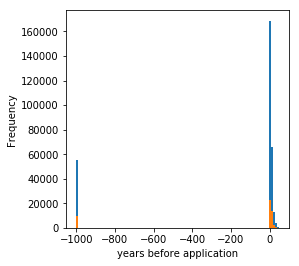

% anomaly in train.DAYS_EMPLOYED: 18.01
% anomaly in test.DAYS_EMPLOYED: 19.03


In [76]:
# distribution of 'DAYS_EMPLOYED' data
(app_train['DAYS_EMPLOYED']/-365).plot.hist(bins=100)
(app_test['DAYS_EMPLOYED']/-365).plot.hist(bins=100)
plt.xlabel('years before application')
plt.show()

print('% anomaly in train.DAYS_EMPLOYED: {:05.2f}'.format(len(app_train[app_train['DAYS_EMPLOYED']== 365243]['DAYS_EMPLOYED'])
                                   /len(app_train['DAYS_EMPLOYED'])*100))
print('% anomaly in test.DAYS_EMPLOYED: {:05.2f}'.format(len(app_test[app_test['DAYS_EMPLOYED']== 365243]['DAYS_EMPLOYED'])
                                   /len(app_test['DAYS_EMPLOYED'])*100))


A large spike can be seen at 1000 caused by anomalies. There anomaly in train and test data are ~ 18% and 19% respectively of total 'DAYS_EMPLOYED.

## Feature Engineering

In [78]:
# Feature engineering by combining several features to have higher correlation with the target
poly_features = app_train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'TARGET']]
poly_features_test = app_test[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]

# imputer for handling missing values
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy = 'median')
poly_target = poly_features['TARGET']
poly_features = poly_features.drop(columns = ['TARGET']) # seperating TARGET column from train dataset

#replacing missing values (external sources have missing values)
poly_features = imputer.fit_transform(poly_features)
poly_features_test = imputer.fit_transform(poly_features_test)

# create polynomial object
from sklearn.preprocessing import PolynomialFeatures
poly_transformer = PolynomialFeatures(degree = 3)

# train the polynomial features
poly_transformer.fit(poly_features)

# transform the features
poly_features = poly_transformer.transform(poly_features)
poly_features_test = poly_transformer.transform(poly_features_test)
print(poly_features.shape) # we started with 4 variables as poly features and ended with 35
columns = poly_transformer.get_feature_names(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH'])
print(columns[:10]) # new feature names

(307511, 35)
['1', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'EXT_SOURCE_1^2', 'EXT_SOURCE_1 EXT_SOURCE_2', 'EXT_SOURCE_1 EXT_SOURCE_3', 'EXT_SOURCE_1 DAYS_BIRTH', 'EXT_SOURCE_2^2']


We started with 4 features and after transformation we have 35 features which are all possible combination between polynomial features, such as EXT_SOURCE_1^2, EXT_SOURCE_1 EXT_SOURCE_2, EXT_SOURCE_1 EXT_SOURCE_3 etc.

In [79]:
# checking correlation with target
# creating dataframe with new features in train dataset
poly_features = pd.DataFrame(poly_features, columns = columns)
poly_features['TARGET'] = poly_target

# find correlation in train
poly_corrs = poly_features.corr()['TARGET'].sort_values()
print(poly_corrs.head(10), '\n', poly_corrs.tail(10))

EXT_SOURCE_2 EXT_SOURCE_3                -0.193939
EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3   -0.189605
EXT_SOURCE_2^2 EXT_SOURCE_3              -0.176428
EXT_SOURCE_2 EXT_SOURCE_3^2              -0.172282
EXT_SOURCE_1 EXT_SOURCE_2                -0.166625
EXT_SOURCE_1 EXT_SOURCE_3                -0.164065
EXT_SOURCE_2                             -0.160295
EXT_SOURCE_1 EXT_SOURCE_2^2              -0.156867
EXT_SOURCE_3                             -0.155892
EXT_SOURCE_1 EXT_SOURCE_3^2              -0.150822
Name: TARGET, dtype: float64 
 EXT_SOURCE_1 DAYS_BIRTH                 0.104882
EXT_SOURCE_3^2 DAYS_BIRTH               0.141777
EXT_SOURCE_2^2 DAYS_BIRTH               0.149313
EXT_SOURCE_3 DAYS_BIRTH                 0.150109
EXT_SOURCE_1 EXT_SOURCE_3 DAYS_BIRTH    0.151816
EXT_SOURCE_1 EXT_SOURCE_2 DAYS_BIRTH    0.155891
EXT_SOURCE_2 DAYS_BIRTH                 0.156873
EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH    0.181283
TARGET                                  1.000000
1                 

The correlations have improved than earlier. There are several features which are important to understand the financial capacity of a cliet, such as the percentage of the credit amount relative to a client's income (CREDIT_INCOME_PERCENT), the percentage of the loan annuity relative to a client's income (ANNUITY_INCOME_PERCENT), the length of the payment in months (since the annuity is the monthly amount due (CREDIT_TERM), the percentage of the days employed relative to the client's age (DAYS_EMPLOYED_PERCENT) etc. 

In [85]:
app_train_domain = app_train.copy()
app_train_domain['CREDIT_INCOME_PERCENT'] = app_train_domain['AMT_CREDIT'] / app_train_domain['AMT_INCOME_TOTAL']
app_train_domain['ANNUITY_INCOME_PERCENT'] = app_train_domain['AMT_ANNUITY'] / app_train_domain['AMT_INCOME_TOTAL']
app_train_domain['CREDIT_TERM'] = app_train_domain['AMT_ANNUITY'] / app_train_domain['AMT_CREDIT']
app_train_domain['DAYS_EMPLOYED_PERCENT'] = app_train_domain['DAYS_EMPLOYED'] / app_train_domain['DAYS_BIRTH']
domain = pd.concat([app_train_domain['CREDIT_INCOME_PERCENT'], app_train_domain['ANNUITY_INCOME_PERCENT'], app_train_domain['CREDIT_TERM'], app_train_domain['DAYS_EMPLOYED_PERCENT'], app_train_domain['TARGET']], axis=1)
app_test_domain = app_test.copy()
app_test_domain['CREDIT_INCOME_PERCENT'] = app_test_domain['AMT_CREDIT'] / app_test_domain['AMT_INCOME_TOTAL']
app_test_domain['ANNUITY_INCOME_PERCENT'] = app_test_domain['AMT_ANNUITY'] / app_test_domain['AMT_INCOME_TOTAL']
app_test_domain['CREDIT_TERM'] = app_test_domain['AMT_ANNUITY'] / app_test_domain['AMT_CREDIT']
app_test_domain['DAYS_EMPLOYED_PERCENT'] = app_test_domain['DAYS_EMPLOYED'] / app_test_domain['DAYS_BIRTH']
domain_corrs = domain.corr()['TARGET'].sort_values()
print(domain_corrs)

CREDIT_INCOME_PERCENT    -0.007727
CREDIT_TERM               0.012704
ANNUITY_INCOME_PERCENT    0.014265
DAYS_EMPLOYED_PERCENT     0.042206
TARGET                    1.000000
Name: TARGET, dtype: float64


The correlation is not good with engineered features. 

What about other datasets!! Can we include them in train and test dataset and improve the prediction!!